In [1]:
#source('functions.R')
source('utils_preprocess.R')

MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily",
               "tidyverse",
               #"ElemStatLearn",
               #"imputation",
               "naivebayes",
               'dplyr',
               "stringr",
               "partykit",
               "C50",
               "randomForest",
               "keras",
               "kohonen",
  "cluster",
  "ggplot2",
  "formattable",
  "factoextra",
  "gridExtra",
  "igraph"
               #"h2o"
               #'ggplot2'
               #"KODAMA"
              )
#install.packages("KODAMA")
#install.packages('lattice')
#install.packages('caret')
#install.packages('e1071')
install.packages('pacman')
#install.packages('ggplot')
# library(dplyr) # for transforming to tibble object
# library(caret)
#library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)
library(dplyr) # for transforming to tibble object
library(caret)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



used    (Mb) gc trigger (Mb) max used (Mb)
Ncells  648703 34.7 1340632    71.6 1340632  71.6
Vcells 1276387  9.8 8388608    64.0 4955045  37.9

null device 
          1

## ***conda install -c r r-tidyverse***

# Data  Understanding

## Load a passenger satisfaction dataset 

### Load 2 version of a Airline passenger satisfaction dataset

In this project we will be using 2 versions of the same dataset to analyse the passenger's satisfaction to the airline.
We will first combine both versions.

 

In [2]:
dataset1<-NreadDataset('./dataset/satisfaction.csv')
dataset2<-NreadDataset('./dataset/satisfaction_2015.csv')

[1] "CSV dataset ./dataset/satisfaction.csv has been read. Records= 129880"
[1] "CSV dataset ./dataset/satisfaction_2015.csv has been read. Records= 129880"




### Check the similar field in both dataset 

Before merging both datasets together, It is necessary for both dataset to have same number of columns with the same name and attribute.


In [3]:
# remove ID field which index is at 1 (-1 will remove index at position 1 )
dataset1 = dataset1[, -which(names(dataset1) %in% c('id'))]
dataset2 = dataset2[, -which(names(dataset2) %in% c('id'))]

print(paste("Names of Similar fields : ",names(dataset1[,(names(dataset1) %in% names(dataset2))])))

 [1] "Names of Similar fields :  satisfactionv2"                
 [2] "Names of Similar fields :  Gender"                        
 [3] "Names of Similar fields :  CustomerType"                  
 [4] "Names of Similar fields :  Age"                           
 [5] "Names of Similar fields :  TypeofTravel"                  
 [6] "Names of Similar fields :  Class"                         
 [7] "Names of Similar fields :  FlightDistance"                
 [8] "Names of Similar fields :  Seatcomfort"                   
 [9] "Names of Similar fields :  DepartureArrivaltimeconvenient"
[10] "Names of Similar fields :  Foodanddrink"                  
[11] "Names of Similar fields :  Gatelocation"                  
[12] "Names of Similar fields :  Inflightwifiservice"           
[13] "Names of Similar fields :  Inflightentertainment"         
[14] "Names of Similar fields :  EaseofOnlinebooking"           
[15] "Names of Similar fields :  Onboardservice"                
[16] "Names of Similar fi

### Check different in both Dataframe



In [4]:
# Field that dataset 1 have but dataset 2 doesnt have
diff1<-names(dataset1)[-which(names(dataset1) %in% names(dataset2))]

# Field that dataset 2 have but dataset 1 doesnt have 
diff2<-names(dataset2)[-which(names(dataset2) %in% names(dataset1))]
differ <-c(diff1,diff2)
print(paste("Name of different fields : ",differ))

[1] "Name of different fields :  Onlinesupport"  
[2] "Name of different fields :  Inflightservice"


We can see that both versions of the dataset contain 22 similar fields with the same names and attributes, wheres only one field is different between the two. These are the ***('Onlinesupport')*** and ***('Inflightservice')***.


### Field a different with NA and combine both dataset
Both datasets needs to have the same number of columns to be able to be combined. So we decided to fill NA values to columns with none exiting values.

In [5]:
dataset1[setdiff(names(dataset2), names(dataset1))] <- NA
dataset2[setdiff(names(dataset1), names(dataset2))] <- NA
# combine both tables
combined<-rbind(dataset1, dataset2)
# Visualize combined dataset
print(paste("Number of columns after combined: ", ncol(combined)))
print(paste("Number of rows after combined: ",nrow(combined)))
head(combined)

[1] "Number of columns after combined:  24"
[1] "Number of rows after combined:  259760"


satisfactionv2 Gender CustomerType   Age TypeofTravel    Class   
1 satisfied      Female Loyal Customer 65  Personal Travel Eco     
2 satisfied      Male   Loyal Customer 47  Personal Travel Business
3 satisfied      Female Loyal Customer 15  Personal Travel Eco     
4 satisfied      Female Loyal Customer 60  Personal Travel Eco     
5 satisfied      Female Loyal Customer 70  Personal Travel Eco     
6 satisfied      Male   Loyal Customer 30  Personal Travel Eco     
  FlightDistance Seatcomfort DepartureArrivaltimeconvenient Foodanddrink ⋯
1  265           0           0                              0            ⋯
2 2464           0           0                              0            ⋯
3 2138           0           0                              0            ⋯
4  623           0           0                              0            ⋯
5  354           0           0                              0            ⋯
6 1894           0           0                              0            ⋯
  EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
1 3                   3              0              3              
2 3                   4              4              4              
3 2                   3              3              4              
4 1                   1              0              1              
5 2                   2              0              2              
6 2                   5              4              5              
  Checkinservice Cleanliness Onlineboarding DepartureDelayinMinutes
1 5              3           2                0                    
2 2              3           2              310                    
3 4              4           2                0                    
4 4              1           3                0                    
5 4              2           5                0                    
6 5              4           2                0                    
  ArrivalDelayinMinutes Inflightservice
1   0                   NA             
2 305                   NA             
3   0                   NA             
4   0                   NA             
5   0                   NA             
6   0                   NA

In [ ]:
The final mergred dataset contains 24 columns and 259760 rows.


# Data cleaning

Next step, we first visualize a summary of combined dataset to see the its details and statistic 

In [6]:
summary(combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4

After look in through a details of dataset we can see that three columns have a missing values, that are ***('ArrivalDelayinMinutes'), ('Onlinesupport') and ('Inflight')***. The missing values in ***('Onlinesupport')*** and ***('Inflightservice')*** are value that was filled because these two fields were a field that each dataset uniquely has. The amount of missing value in both of these field are 129880 rows which is 50 % of totak number of rows. We decide not filling a missing value by imputation process nor taking mean or meadian of each columns and remove both of these field. Since the number of missing value is 50 % of dataset the value fill might be inaccurate. But for field ***('ArrivalDelayMinutes')***, the missing value were filling by using median value in that field


In [7]:
#remove colums which field which have more that 50 % is NA value. Inflightservice and Onlinesupport

rm_combined<-combined[, -which(names(combined) %in% c('Inflightservice','Onlinesupport'))]

# Filling a Null value with median value of that field which is 0
# the reseason of choosing median over mean of the field to prevent a chance of creating new outlier
rm_combined$ArrivalDelayinMinutes[is.na(rm_combined$ArrivalDelayinMinutes)] <- 0 

In [8]:
summary(rm_combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [9]:
dataset<-rm_combined

### Display Summary of dataset
Checking a type of each fields (numeric or symbolic) and also checking for missing value

In [10]:
# displat summary of dataset 
summary(dataset)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [11]:
# Visualize a summary with different function
prettydataset<-NPREPROCESSING_prettyDataset(dataset)
prettydataset

HTML widgets cannot be represented in plain text (need html)

In [12]:
# assigning a field type to each fields in Dataset

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

# This function will differentiate between Numeric and Symbolic
field_types<-NPREPROCESSING_initialFieldType(dataset)

In [13]:
# Total number of fields
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")

###############################################################################################################

print(paste("Type of attribute in Numeric Fields"))

# Statisfaction Scale Fields
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")
# Other numeric fields that is not satisfaction scale fields
pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
time_field<-c('DepartureDelayinMinutes','ArrivalDelayinMinutes')
distance_field<-c('FlightDistance')
print(paste("others numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)

[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Type of attribute in Numeric Fields"
[1] "Satisf

### This summary show that 5 fields in a dataset are symbolic and remaining are numeric

### Symbolic fields are :-

 ***Satifactionv2 , Gender, Customer , TypeofTravel and Class***

### Numeric fields are :-

***Age, FlightDistance, Seatcomfort, DepartureArrivaltimeconvenient, Foodanddrink, Gatelocation, Inflightwifiservice, Inflightentertainment, EaseofOnlinebooking, Onboardservice, Legroomservice, Baggagehandling, Checkinservice, Cleanliness, Onlineboarding, DepartureDelayinMinutes,  and ArrivalDelayinMinutes***

Where 13 numeric fields are the columns containing satifaction level provided from a customer from a scaling 0 to 5  and other 4 numeric field are age of customer , travel distance of a flight and last two fields are time delay in minute



# Data Analysis 


## Visualizing Numeric fields

### Visualizing a correlation of numeric fields

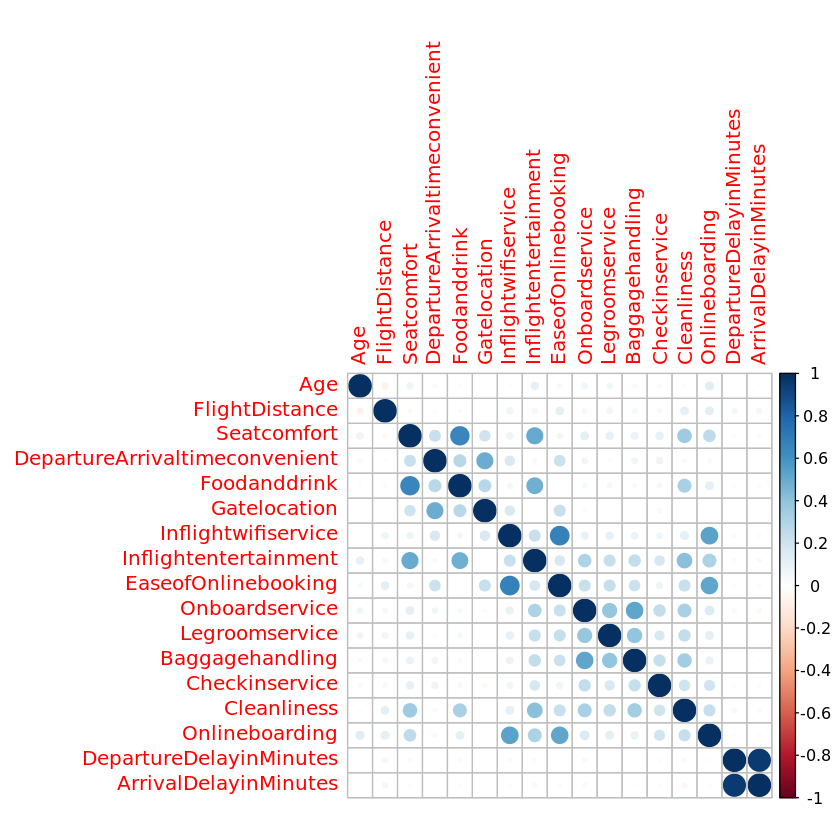

In [14]:
# Visualizing a correlation of numeric fields
library(corrplot)
correlations <- cor(dataset[,numeric_fields])
corrplot(cor(dataset[,numeric_fields]), method="circle")

### Visualzing a Box Plot of a fields containing statisfaction level

We can see that most of the fields containing statisfaction level have a good balance normal distribution but some still have a some outliers and also positive and negative skewing such in ***("Onboard service"), ("Baggehandling"), ("Checkinservice") and ("Cleanliness")***

Also, The satisfaction scale is rating between 0-5 but in Baggagehandling the range of value dataset contains in that field is 1-5

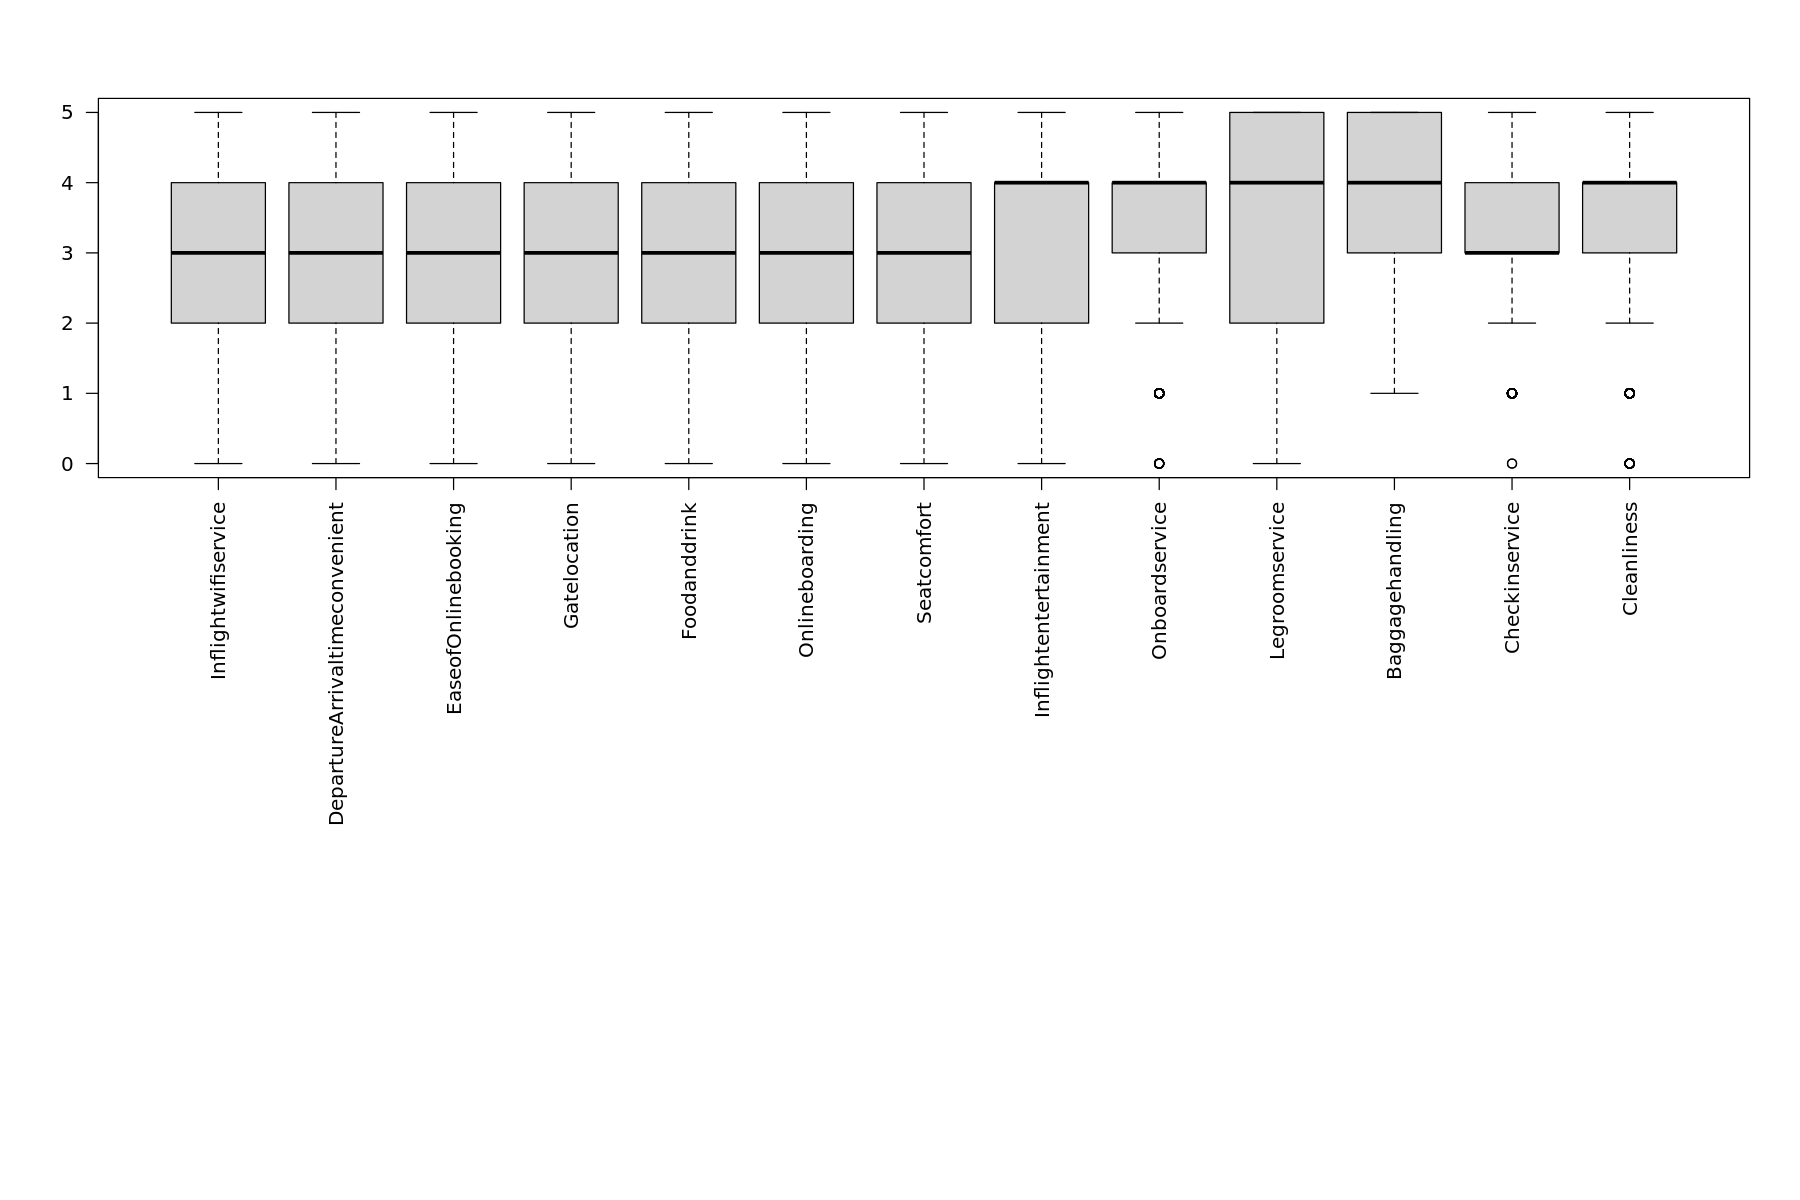

In [15]:
# Box plot
par(mfrow=c(2,1))
options(repr.plot.width = 15, repr.plot.height = 10)
# satisfaction data

satis_data<-dataset[,sat_cols]

boxplot(satis_data, las = 2)


### Visualizing a Historgram in in other numeric fields'

For visualizing other numeric fields, using Histogram are suitable for visualizing a distribution of data in those field.

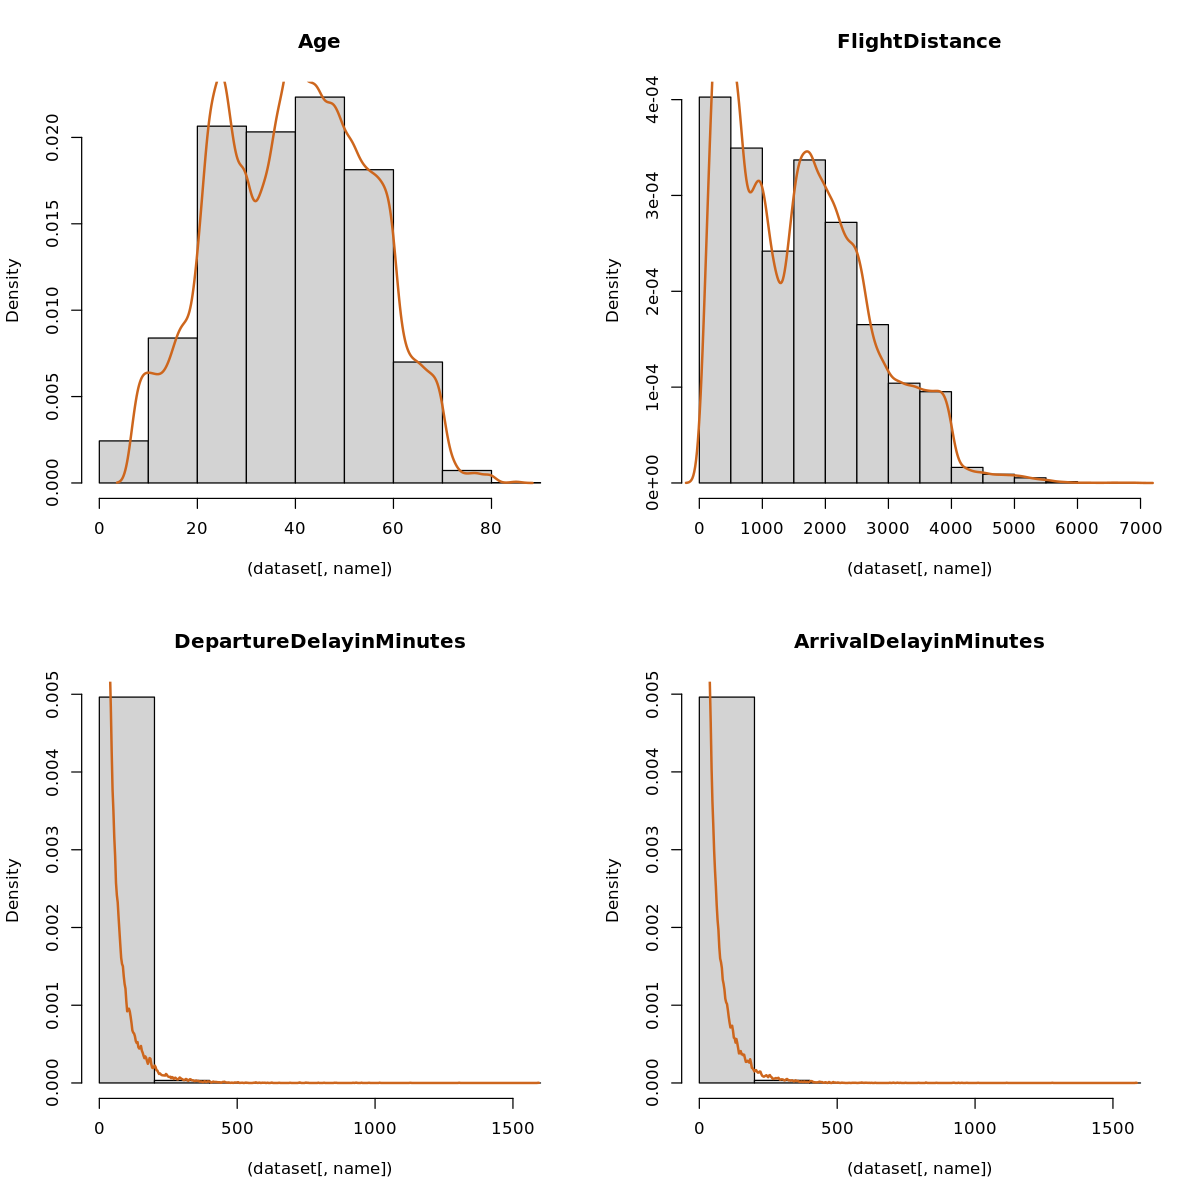

In [16]:
# Box plot
# satisfaction data

other_num<-dataset[,pure_numerical_val]

par(mfrow=c(2,2))
options(repr.plot.width = 10, repr.plot.height = 10)
for (name in pure_numerical_val){
    
    hist((dataset[,name]), main=name,breaks=10,prob=TRUE)
    lines(density(dataset[,name]),
      lwd = 2,
      col = "chocolate3")
}


Histrogram show that in columns ***('Age')*** has a perfect normal distribution where in ***('Flightdistance')*** the distribution of a data is skew to the left and have small number which means the frequency of a data  passenger short flight distance is more than longer flight distance. After looking through distibution of these columns, ***("Age")*** can be treat as ordinal value and use Linear normalization to normalize a value in a range of 0.0 to 1.0 in the processing part. 

For others 2 columns, the DepatureDelayinMinutes and ArrivalDelayinMinutes are clearly have distribution skew to the left and large value of outlier in a columns. Both of these need to be treat as a Discrete value and will be preprocess using one hot encoding.



## Visualize Symbolic Fields

### Use BarChart to display a distribution of each categories in each fields

Barchar is suitable for visualizing distribution of a symbolic fields. For example we can cleary visualize the number of a satisfy passenger and unsatisfy

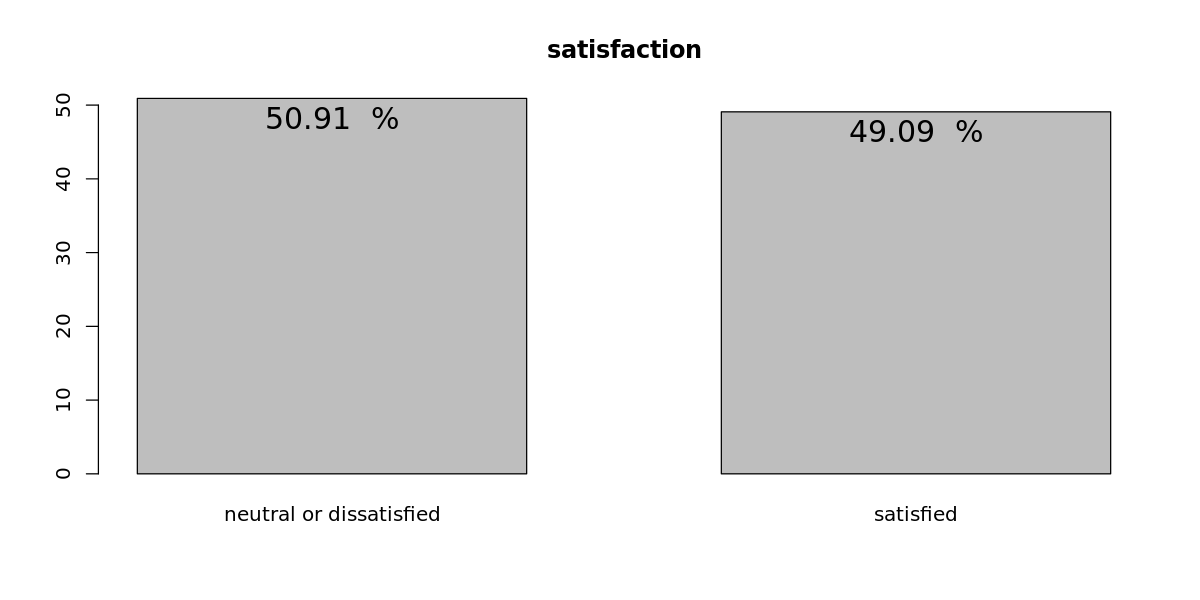

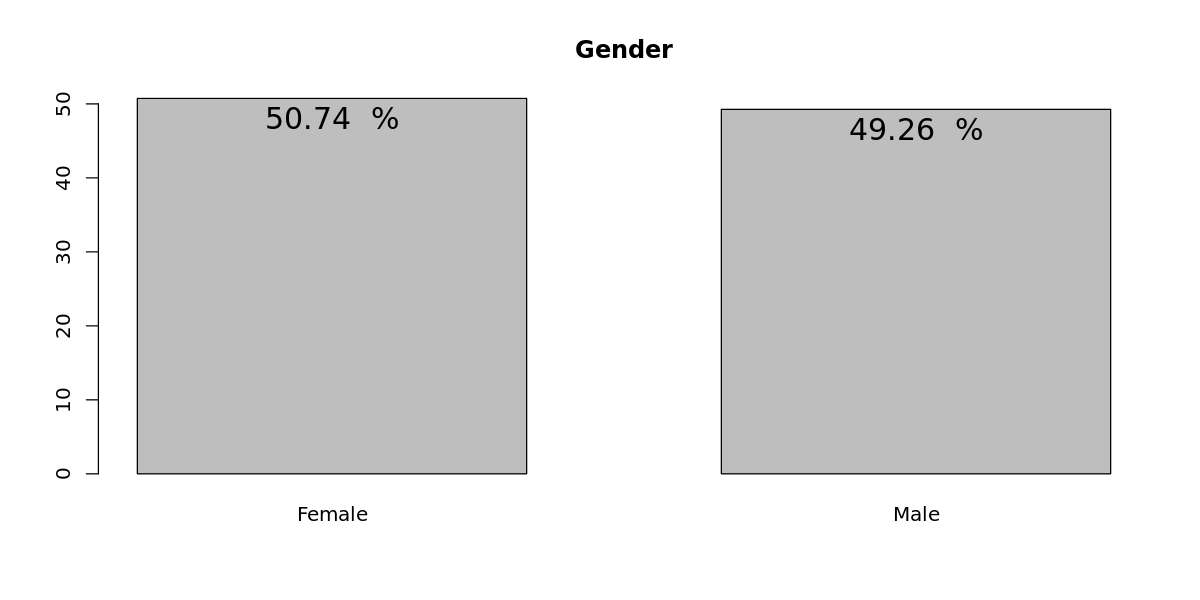

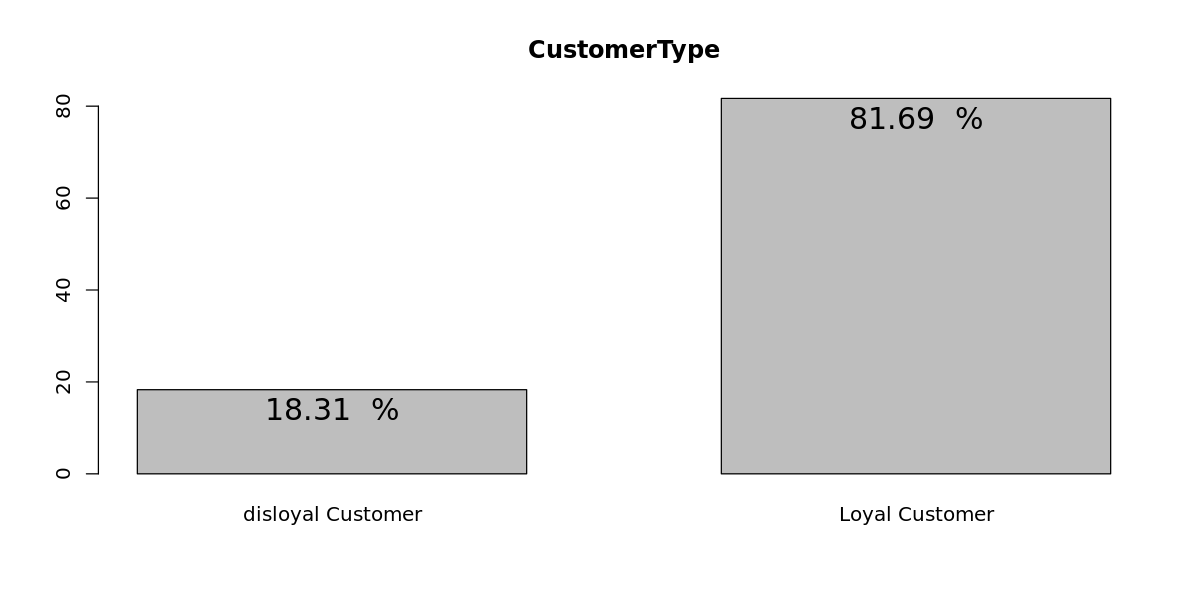

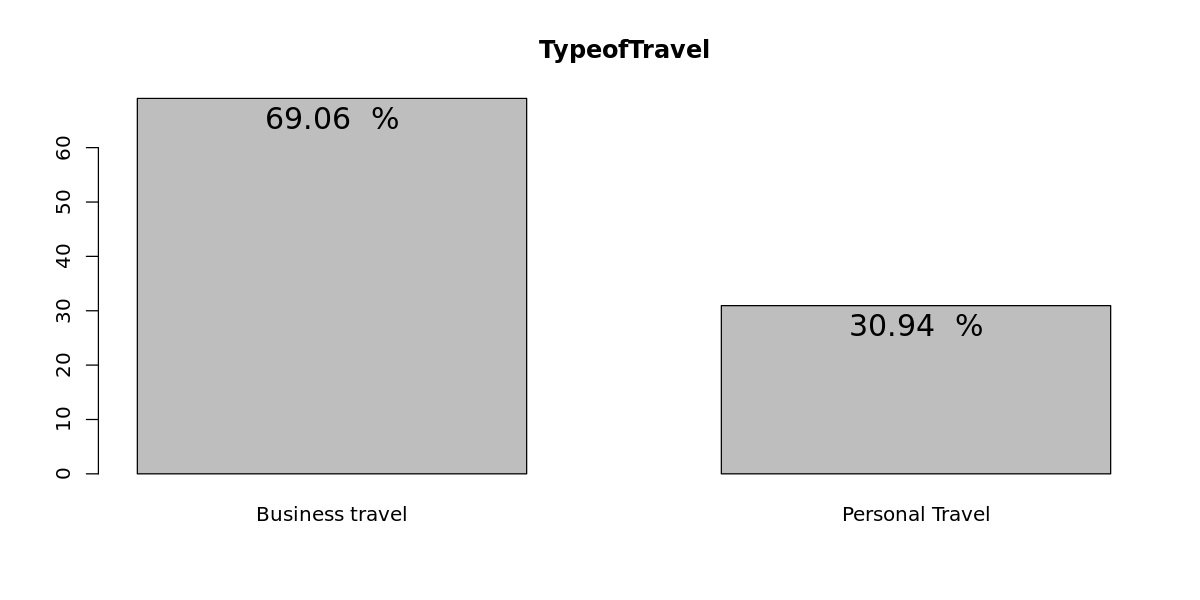

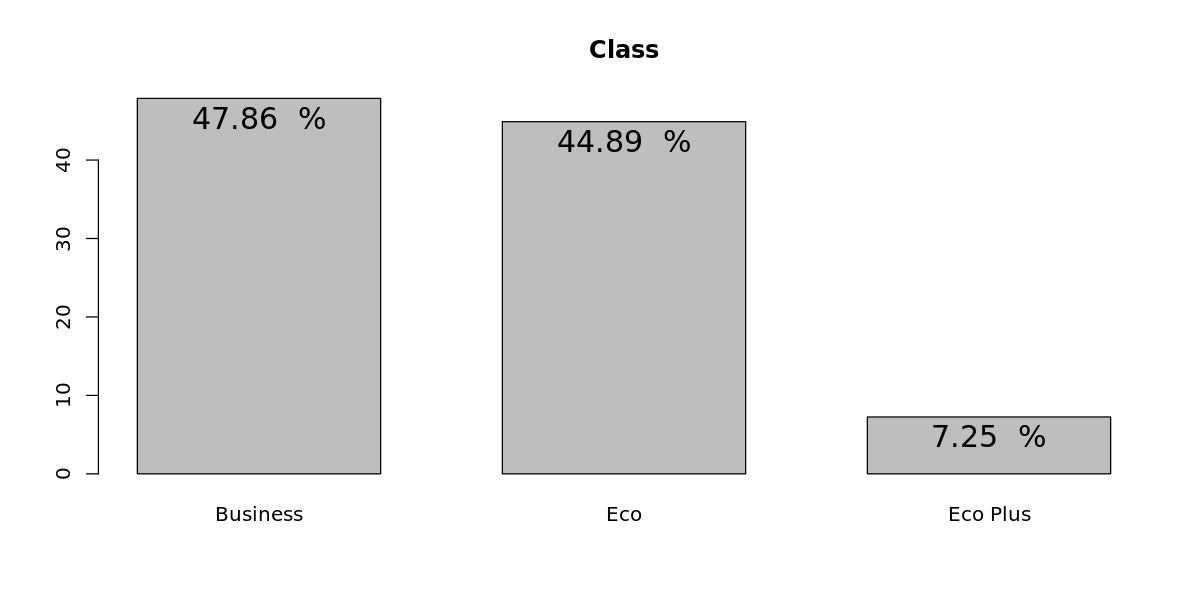

In [17]:
par(mfrow=c(1,1),pty = "m")
options(repr.plot.width = 10, repr.plot.height = 5)
for (name in symbolic_fields){
    counts <- round(table(dataset[,name])/ length(dataset[,name])*100,2)
    if (name == 'satisfactionv2'){
        name = "satisfaction"
    }
    xx<-barplot(counts, main=name,space=0.5) 
    text(x = xx, y = counts, label = paste(counts," %") , pos = 1, cex = 1.5, col = "black")  
}



### Visualizing Relationship between a symbolic fields

Here we are using a barchart to visualize a relationship of satiscation fields on other symbolic fields.

                         Class
satisfactionv2            Business   Eco Eco Plus
  neutral or dissatisfied    37059 82702    12484
  satisfied                  87261 33916     6338

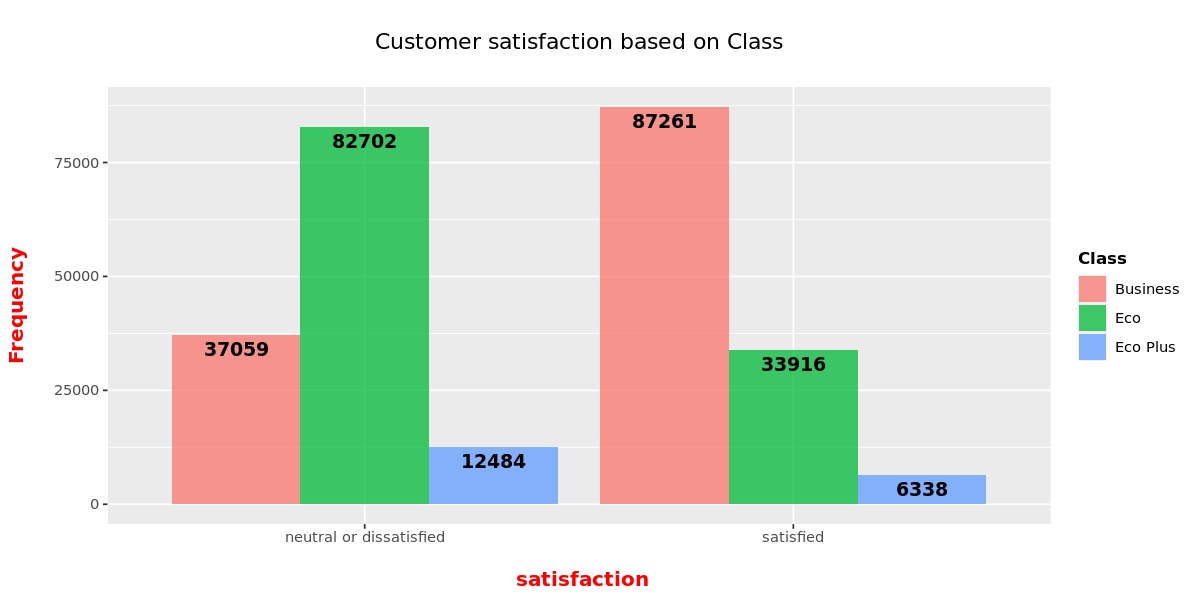

In [18]:
library("ggplot2")
sat_class = dataset[,c('satisfactionv2','Class')]
table(sat_class)
results <- data.frame(table(sat_class))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Class)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Class \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         Gender
satisfactionv2            Female  Male
  neutral or dissatisfied  60601 71644
  satisfied                71197 56318

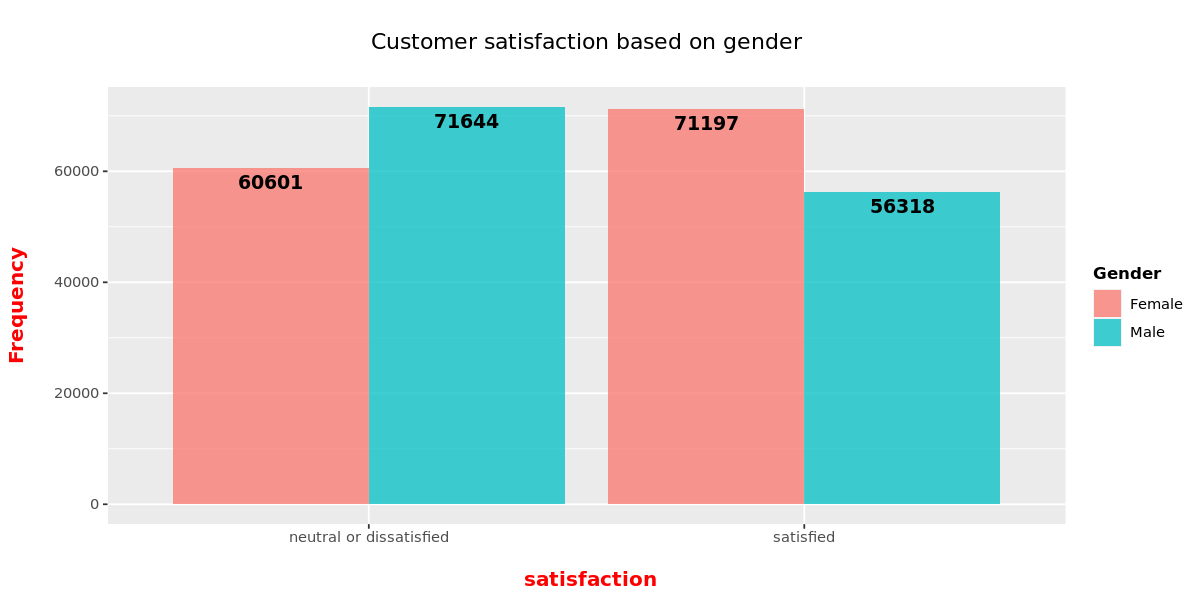

In [19]:
library("ggplot2")
sat_gender = dataset[,c('satisfactionv2','Gender')]
table(sat_gender)
results <- data.frame(table(sat_gender))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gender)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on gender \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         CustomerType
satisfactionv2            disloyal Customer Loyal Customer
  neutral or dissatisfied             36160          96085
  satisfied                           11400         116115

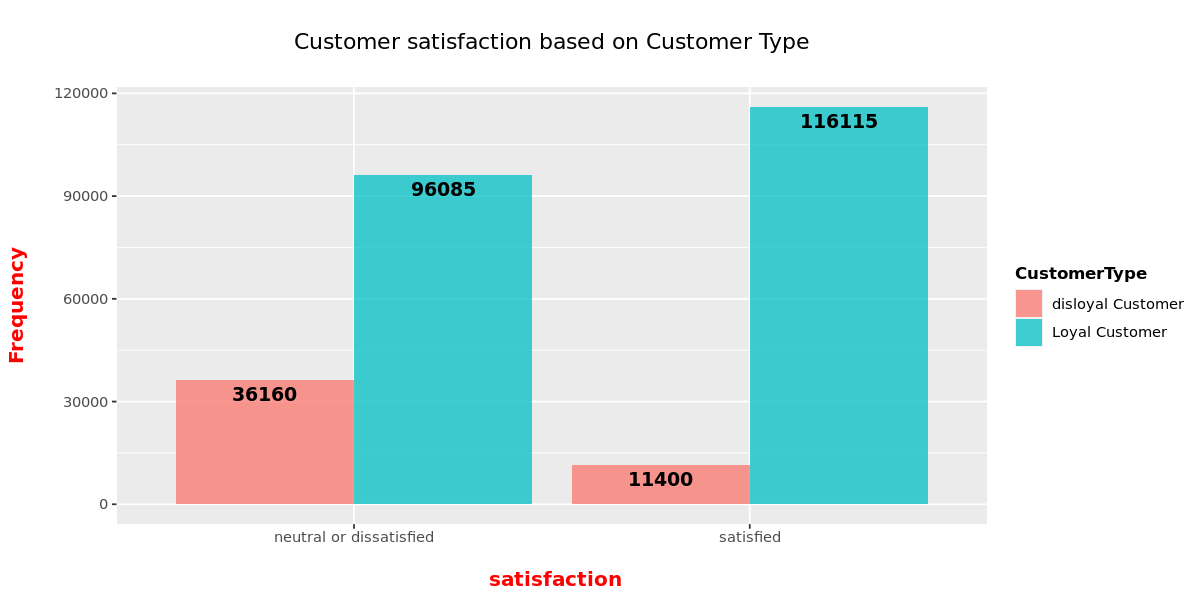

In [20]:

sat_type = dataset[,c('satisfactionv2','CustomerType')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = CustomerType)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Customer Type \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         TypeofTravel
satisfactionv2            Business travel Personal Travel
  neutral or dissatisfied           74674           57571
  satisfied                        104712           22803

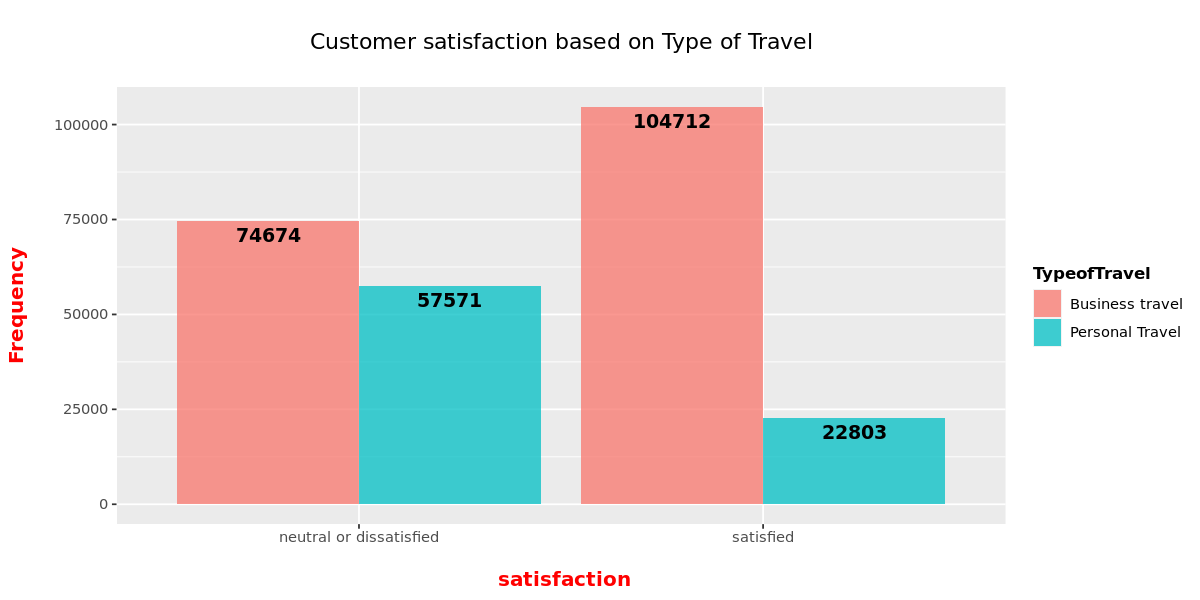

In [21]:
sat_type = dataset[,c('satisfactionv2','TypeofTravel')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =TypeofTravel)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Type of Travel \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with fields containing Satisfaction scale


Here again, we are using a barchart to visualize a relationship of satiscation fields with all a fields containing a rating of customer satisfaction in each categories.

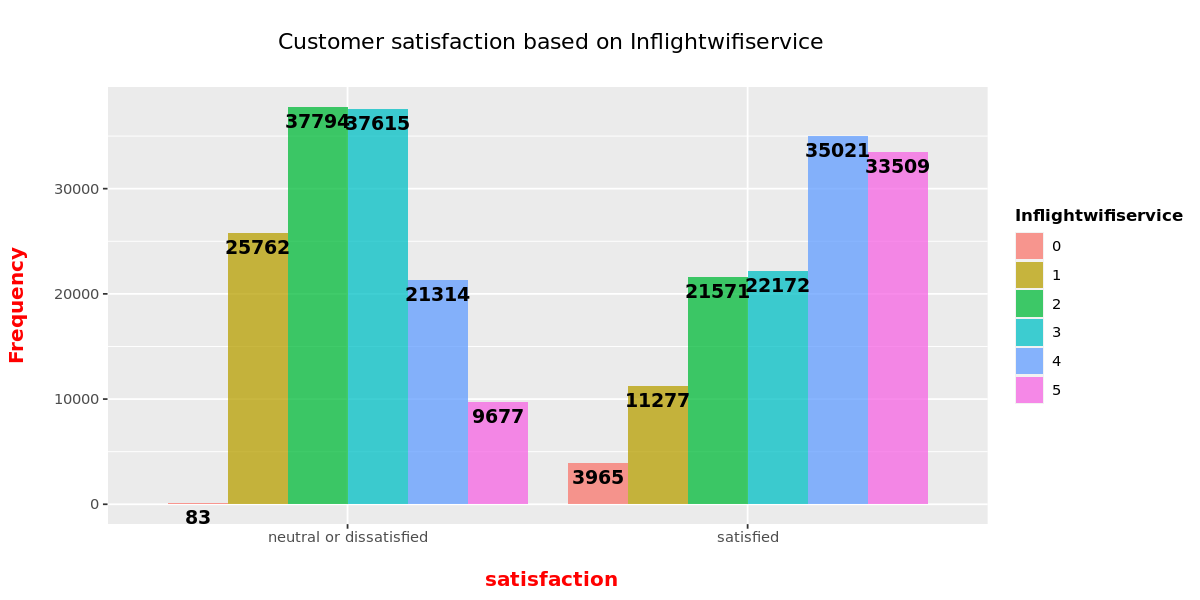

In [22]:

par(mfrow=c(2,4),pty = "m")
options(repr.plot.width = 10,epr.plot.height = 5)

temp_df<-cbind(dataset[,c('satisfactionv2','Inflightwifiservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightwifiservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightwifiservice\n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

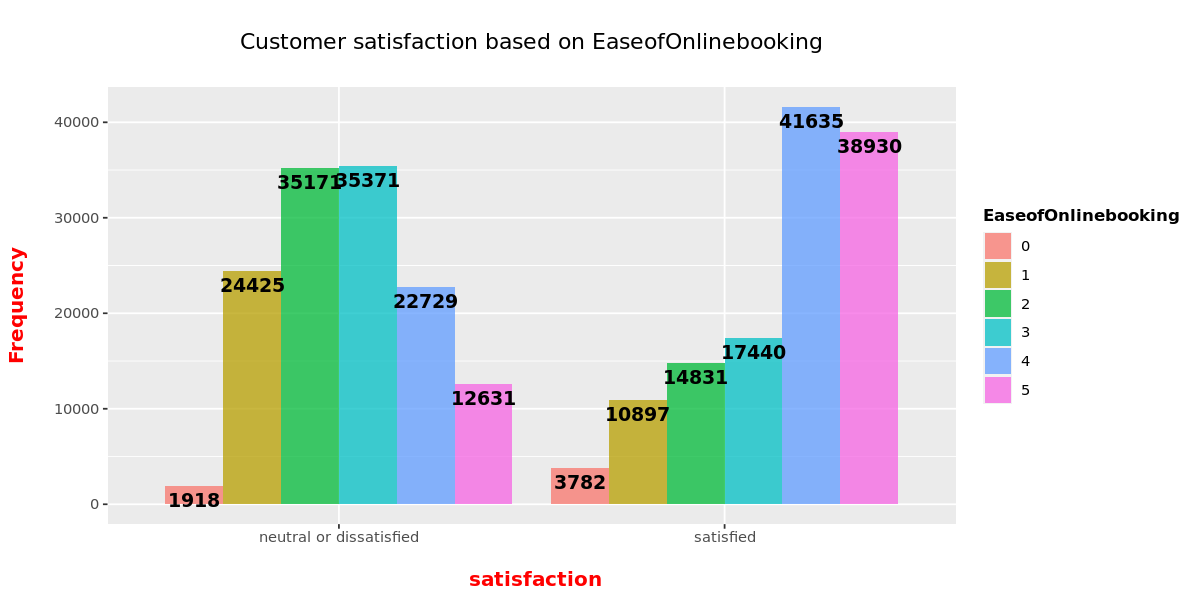

In [23]:
temp_df<-cbind(dataset[,c('satisfactionv2','EaseofOnlinebooking')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =EaseofOnlinebooking)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on EaseofOnlinebooking \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

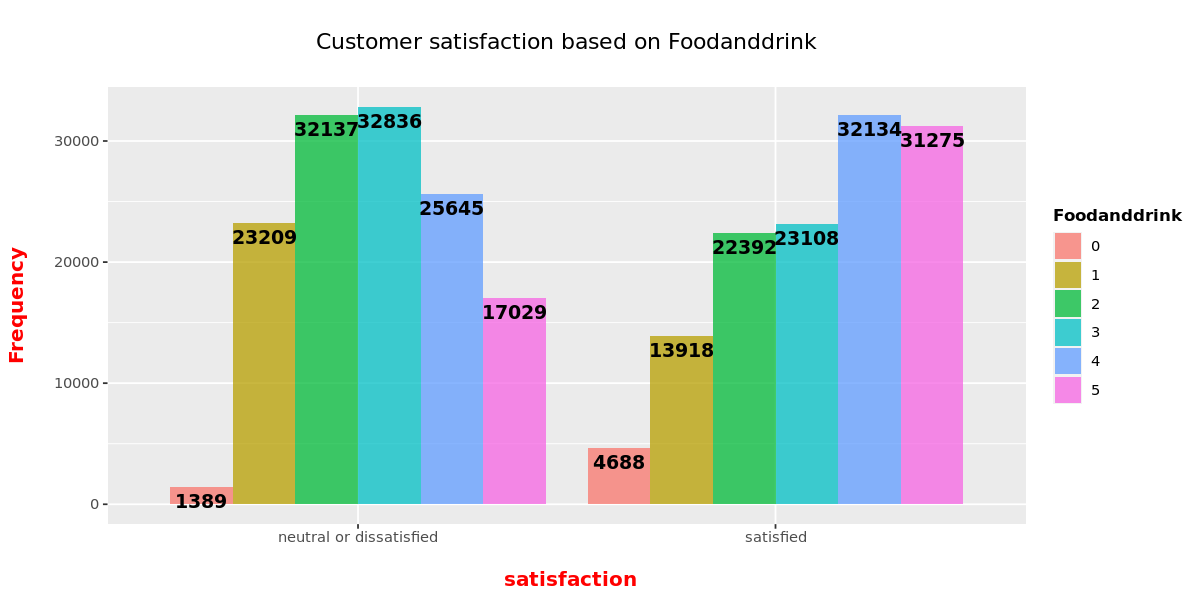

In [24]:
temp_df<-cbind(dataset[,c('satisfactionv2','Foodanddrink')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Foodanddrink)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Foodanddrink \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

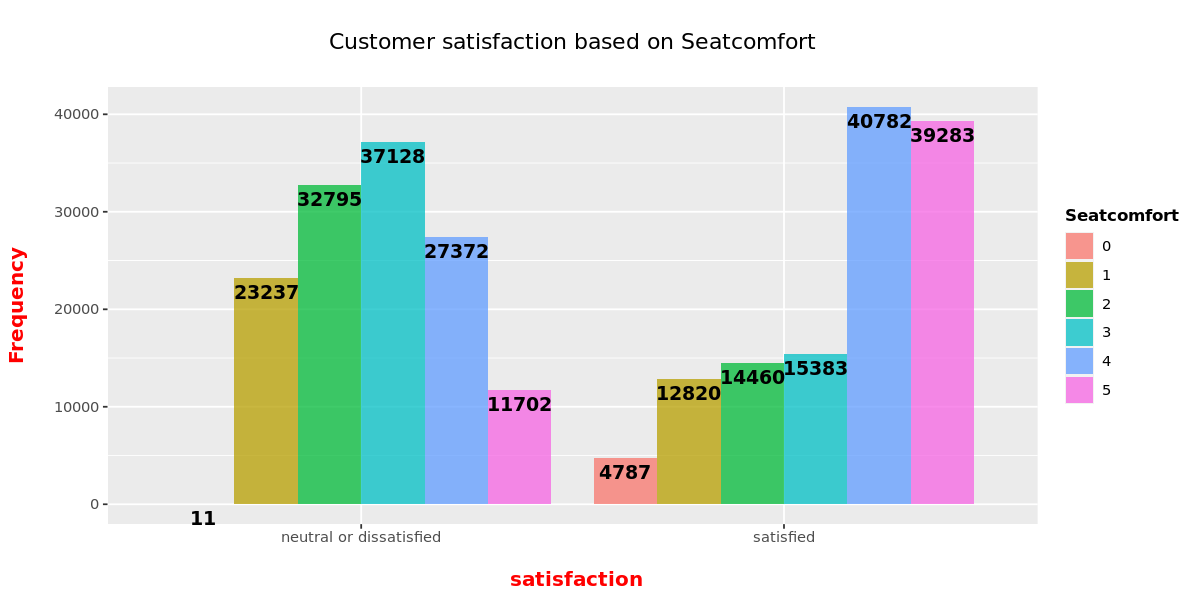

In [25]:
temp_df<-cbind(dataset[,c('satisfactionv2','Seatcomfort')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Seatcomfort)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Seatcomfort \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

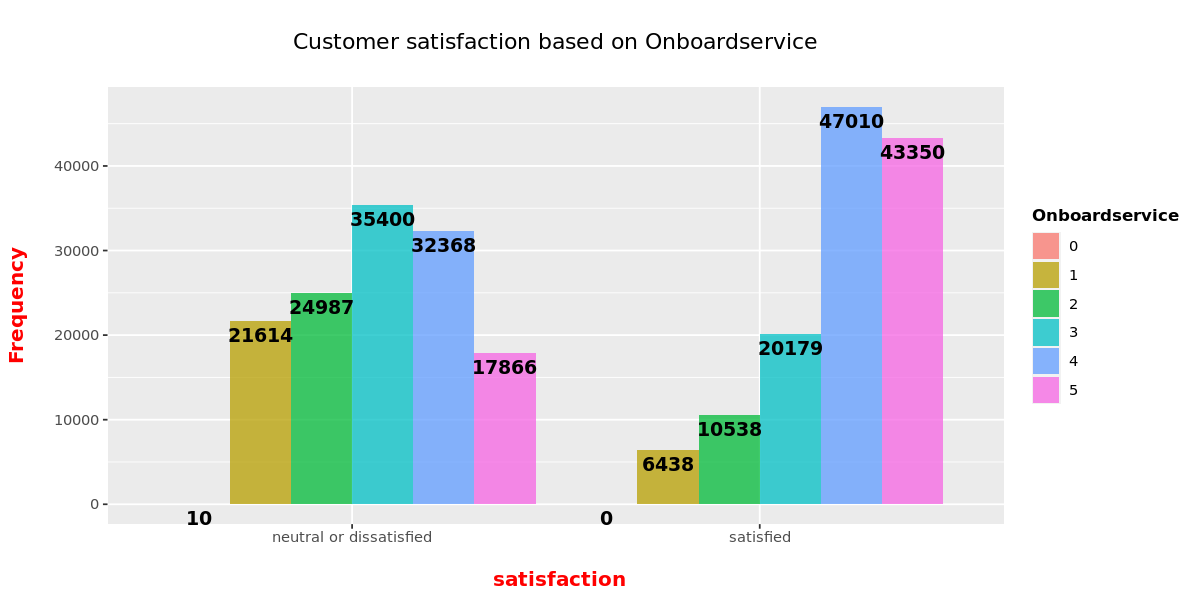

In [26]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onboardservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onboardservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onboardservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

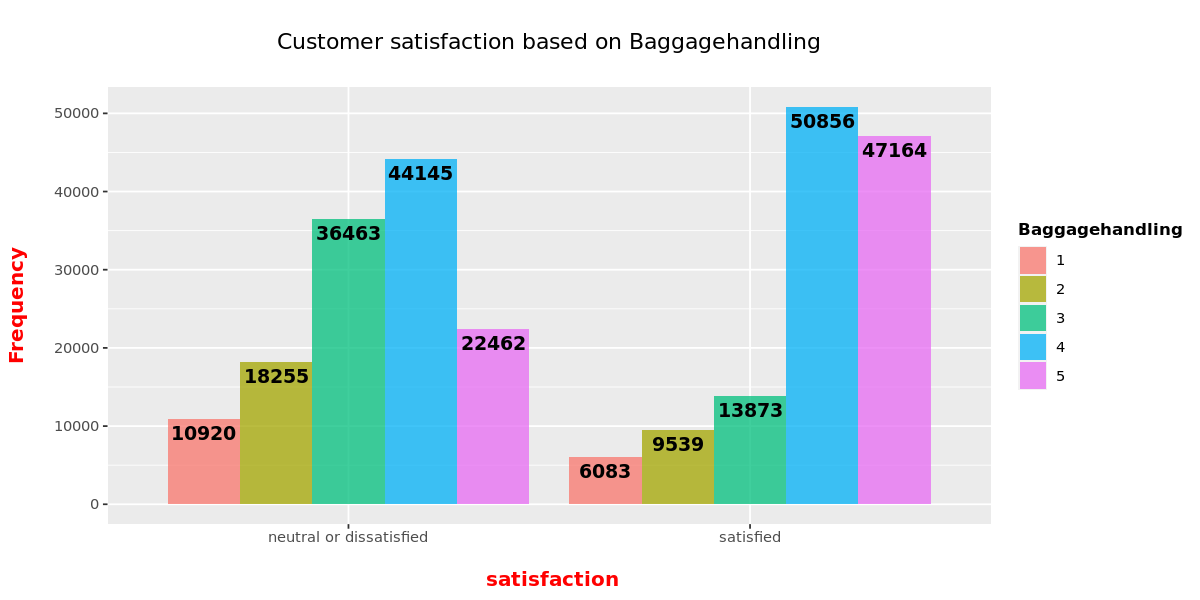

In [27]:
temp_df<-cbind(dataset[,c('satisfactionv2','Baggagehandling')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Baggagehandling)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Baggagehandling \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

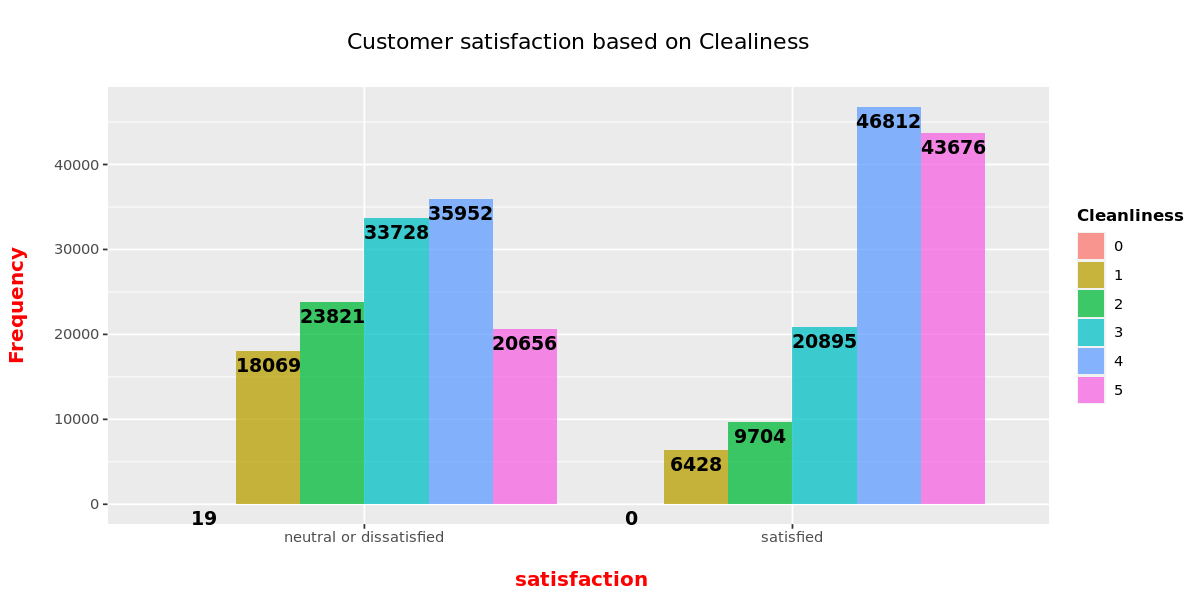

In [28]:
temp_df<-cbind(dataset[,c('satisfactionv2','Cleanliness')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Cleanliness)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

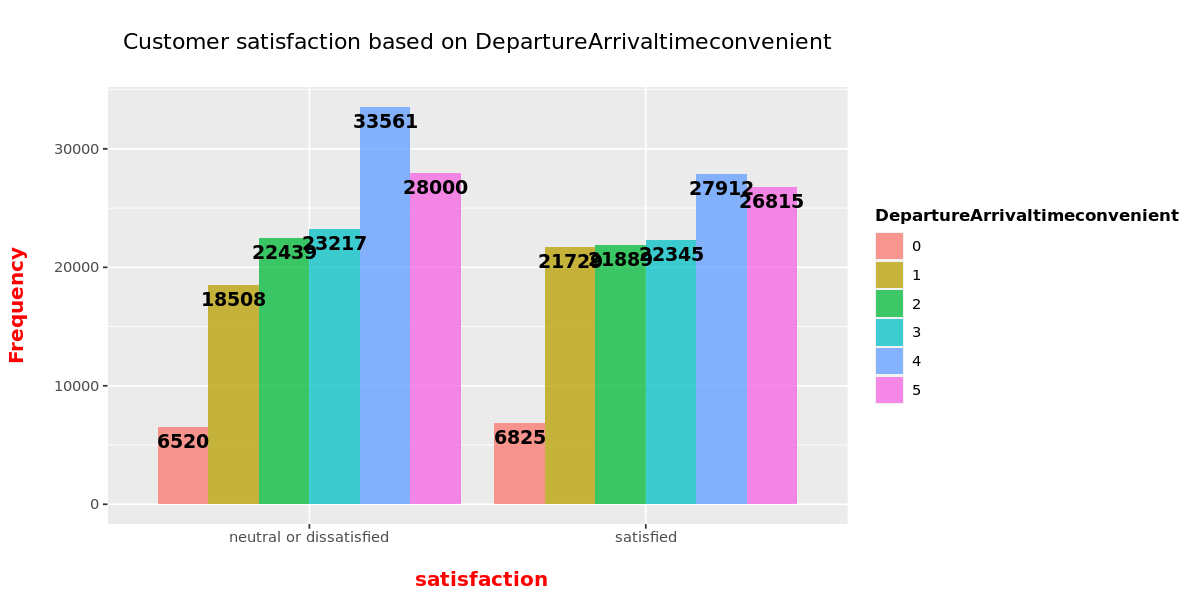

In [29]:
temp_df<-cbind(dataset[,c('satisfactionv2','DepartureArrivaltimeconvenient')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = DepartureArrivaltimeconvenient)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on DepartureArrivaltimeconvenient \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

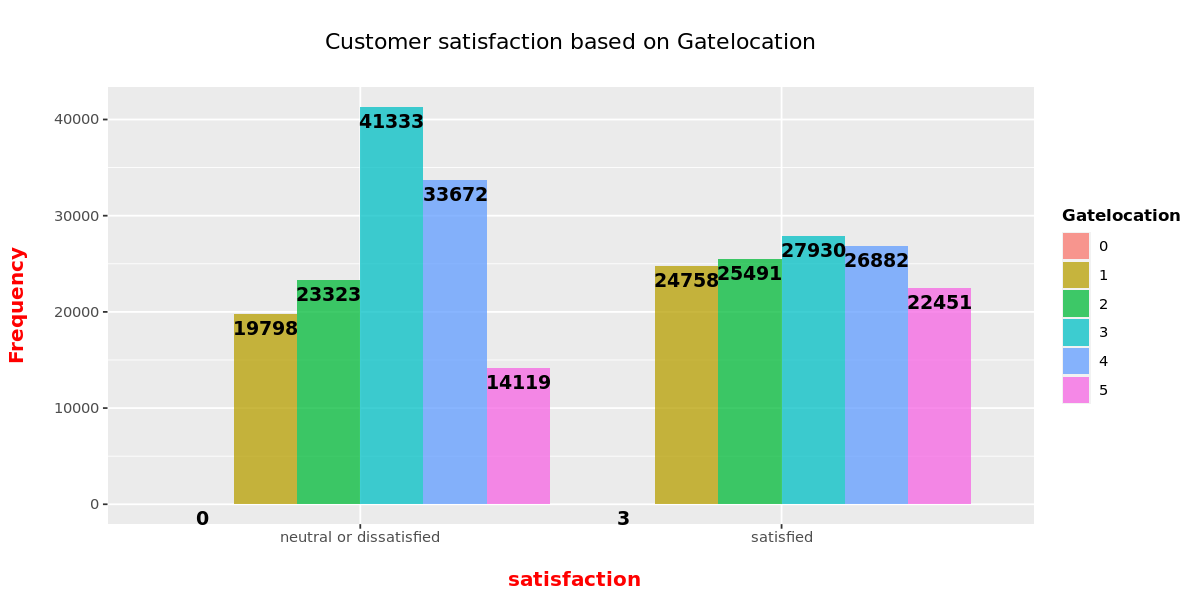

In [30]:
temp_df<-cbind(dataset[,c('satisfactionv2','Gatelocation')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gatelocation)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Gatelocation \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

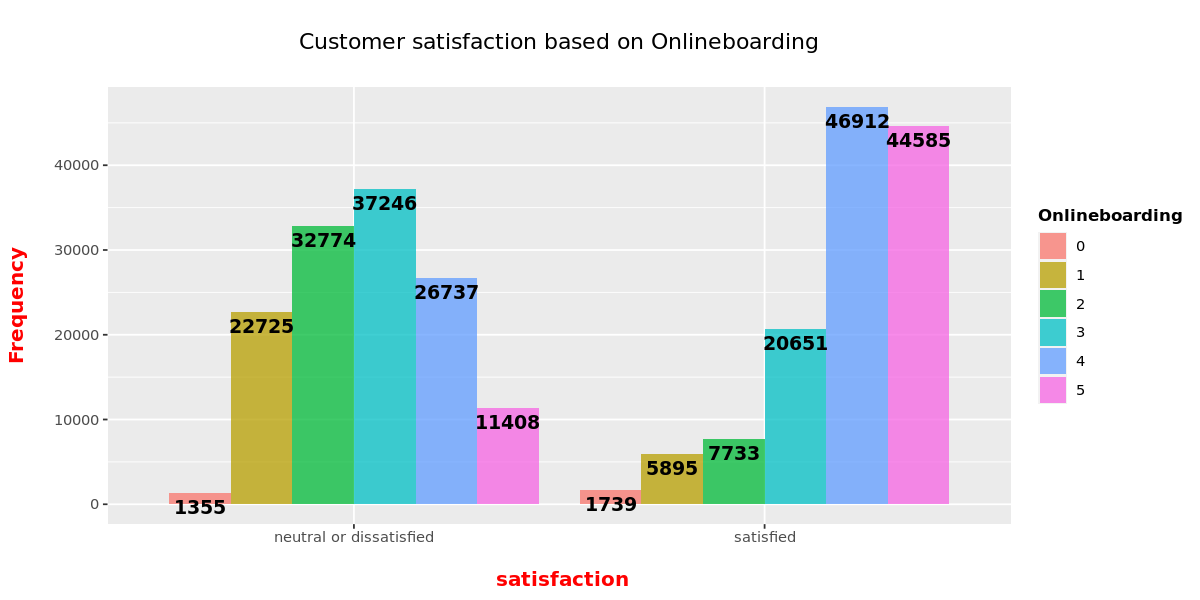

In [31]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onlineboarding')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onlineboarding)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onlineboarding \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

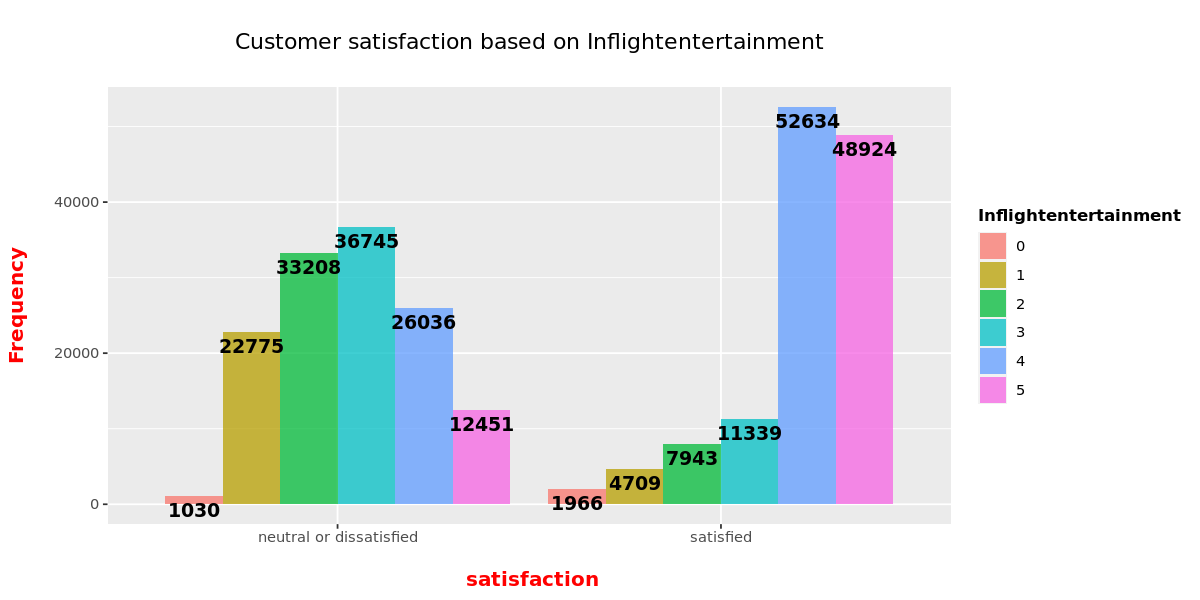

In [32]:
temp_df<-cbind(dataset[,c('satisfactionv2','Inflightentertainment')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightentertainment)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightentertainment \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

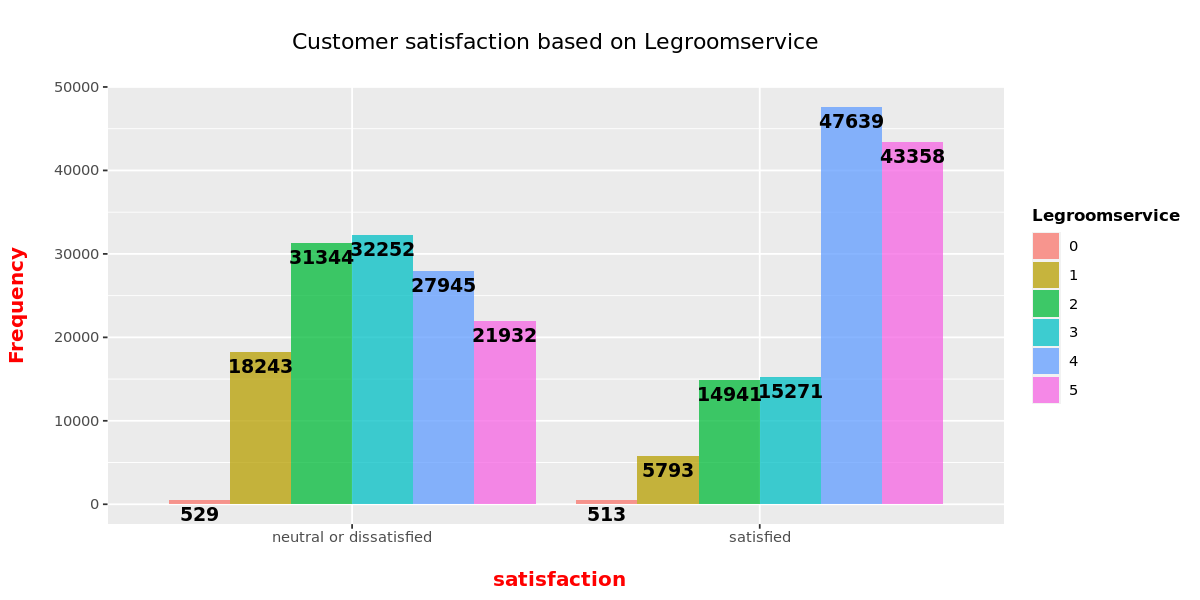

In [33]:
temp_df<-cbind(dataset[,c('satisfactionv2','Legroomservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Legroomservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Legroomservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

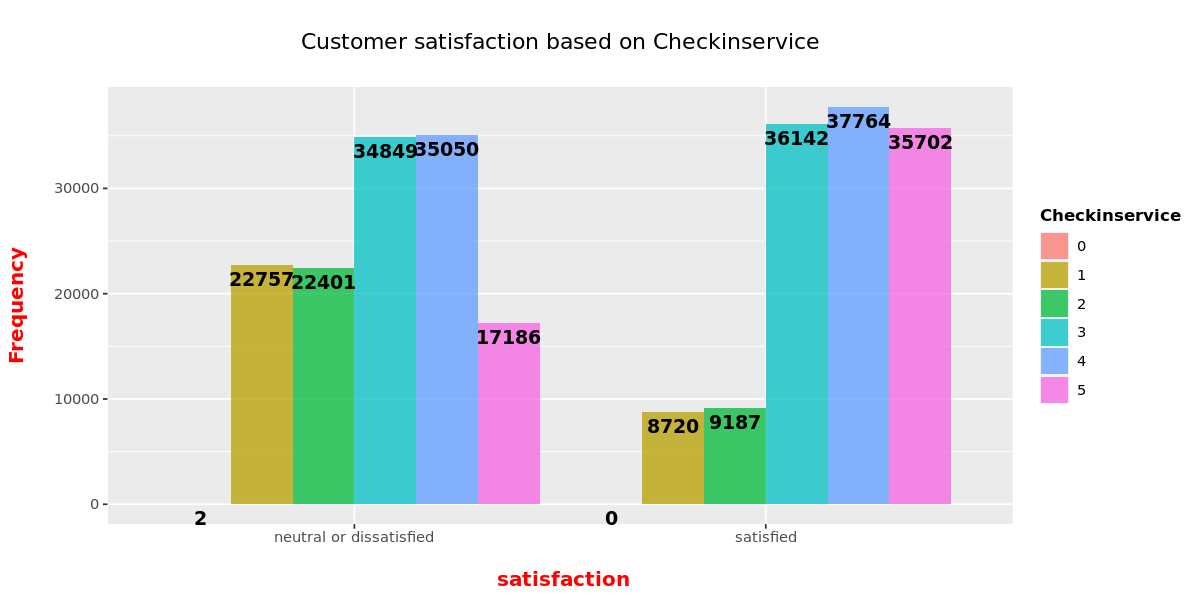

In [34]:
temp_df<-cbind(dataset[,c('satisfactionv2','Checkinservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Checkinservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Checkinservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with maximum occurance of a rating from all satisfation scale for each passenger

Looking at the a plot of relationship individually might be too difficult to understand the relationship and satisfaction rating in each categories to passenger satisfation. Instead, we count the occurance of customers' rating and take the maximum rating occur for each customer and use barchart to visualize a relationship with final satisfaction

In [35]:
sat_data=dataset[,sat_cols]

# Calculate a maximum occurance from all satisfation scale for each customer  
max_occurance<-apply(sat_data,1,function(x) names(which.max(table(x))))

In [36]:
# create dataframe of max occurance scale
max_occur<-data.frame( max_occur = max_occurance)

sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
max_sat<-cbind(max_occur,sat)


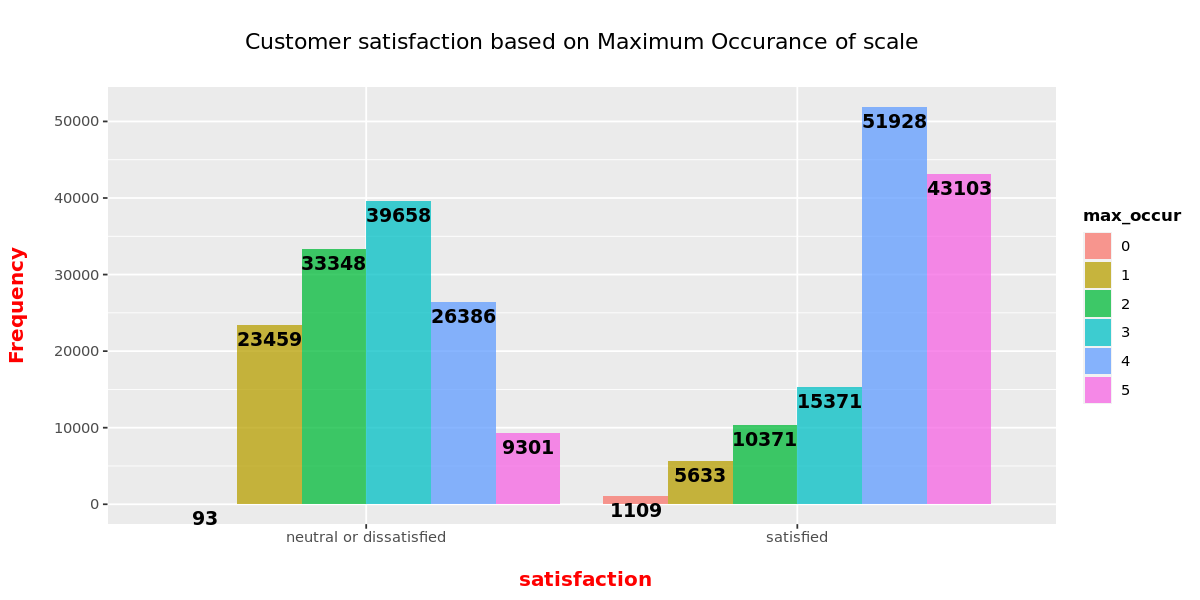

In [37]:
results <- data.frame(table(max_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =max_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Maximum Occurance of scale \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

From this visualization we can see that statiscally passengers that have neutral or disstasified to a service of an airlines mostly have a maximum occurance of rating from 1 to 3. While on the other hand for a passenger with who satisfied a service has maximum occurance from 4 to 5.

# Data preparation or Data preprocessing

Data preprocessing is a crucial process before feeding a data into a models

In [38]:
dataset

satisfactionv2 Gender CustomerType   Age TypeofTravel    Class   
1      satisfied      Female Loyal Customer 65  Personal Travel Eco     
2      satisfied      Male   Loyal Customer 47  Personal Travel Business
3      satisfied      Female Loyal Customer 15  Personal Travel Eco     
4      satisfied      Female Loyal Customer 60  Personal Travel Eco     
5      satisfied      Female Loyal Customer 70  Personal Travel Eco     
6      satisfied      Male   Loyal Customer 30  Personal Travel Eco     
7      satisfied      Female Loyal Customer 66  Personal Travel Eco     
8      satisfied      Male   Loyal Customer 10  Personal Travel Eco     
9      satisfied      Female Loyal Customer 56  Personal Travel Business
10     satisfied      Male   Loyal Customer 22  Personal Travel Eco     
11     satisfied      Female Loyal Customer 58  Personal Travel Eco     
12     satisfied      Female Loyal Customer 34  Personal Travel Eco     
13     satisfied      Male   Loyal Customer 62  Personal Travel Eco     
14     satisfied      Male   Loyal Customer 35  Personal Travel Eco     
15     satisfied      Female Loyal Customer 47  Personal Travel Eco     
16     satisfied      Male   Loyal Customer 60  Personal Travel Eco     
17     satisfied      Female Loyal Customer 13  Personal Travel Eco     
18     satisfied      Female Loyal Customer 52  Personal Travel Business
19     satisfied      Female Loyal Customer 55  Personal Travel Eco     
20     satisfied      Female Loyal Customer 28  Personal Travel Eco     
21     satisfied      Female Loyal Customer  9  Personal Travel Eco     
22     satisfied      Female Loyal Customer 10  Personal Travel Eco     
23     satisfied      Female Loyal Customer 25  Personal Travel Eco     
24     satisfied      Male   Loyal Customer 53  Personal Travel Business
25     satisfied      Female Loyal Customer 16  Personal Travel Eco Plus
26     satisfied      Male   Loyal Customer 30  Personal Travel Eco     
27     satisfied      Male   Loyal Customer 64  Personal Travel Eco     
28     satisfied      Female Loyal Customer 42  Personal Travel Eco     
29     satisfied      Male   Loyal Customer  9  Personal Travel Eco     
30     satisfied      Female Loyal Customer 35  Personal Travel Eco     
⋮      ⋮              ⋮      ⋮              ⋮   ⋮               ⋮       
259731 satisfied      Male   Loyal Customer 42  Business travel Business
259732 satisfied      Female Loyal Customer 46  Business travel Business
259733 satisfied      Male   Loyal Customer 20  Business travel Eco Plus
259734 satisfied      Female Loyal Customer 50  Business travel Business
259735 satisfied      Female Loyal Customer 43  Business travel Business
259736 satisfied      Male   Loyal Customer 35  Business travel Business
259737 satisfied      Male   Loyal Customer 53  Business travel Business
259738 satisfied      Female Loyal Customer 45  Business travel Business
259739 satisfied      Male   Loyal Customer 53  Business travel Business
259740 satisfied      Male   Loyal Customer 47  Business travel Business
259741 satisfied      Male   Loyal Customer 43  Business travel Business
259742 satisfied      Male   Loyal Customer 18  Business travel Eco     
259743 satisfied      Female Loyal Customer 31  Business travel Business
259744 satisfied      Female Loyal Customer 52  Business travel Business
259745 satisfied      Male   Loyal Customer 50  Business travel Business
259746 satisfied      Male   Loyal Customer 47  Business travel Business
259747 satisfied      Male   Loyal Customer 39  Business travel Business
259748 satisfied      Male   Loyal Customer 16  Business travel Eco     
259749 satisfied      Female Loyal Customer 48  Business travel Business
259750 satisfied      Male   Loyal Customer 64  Business travel Business
259751 satisfied      Female Loyal Customer 56  Business travel Business
259752 satisfied      Male   Loyal Customer 30  Business travel Business
259753 satisfied      Male   Loyal Customer 39  Business travel B

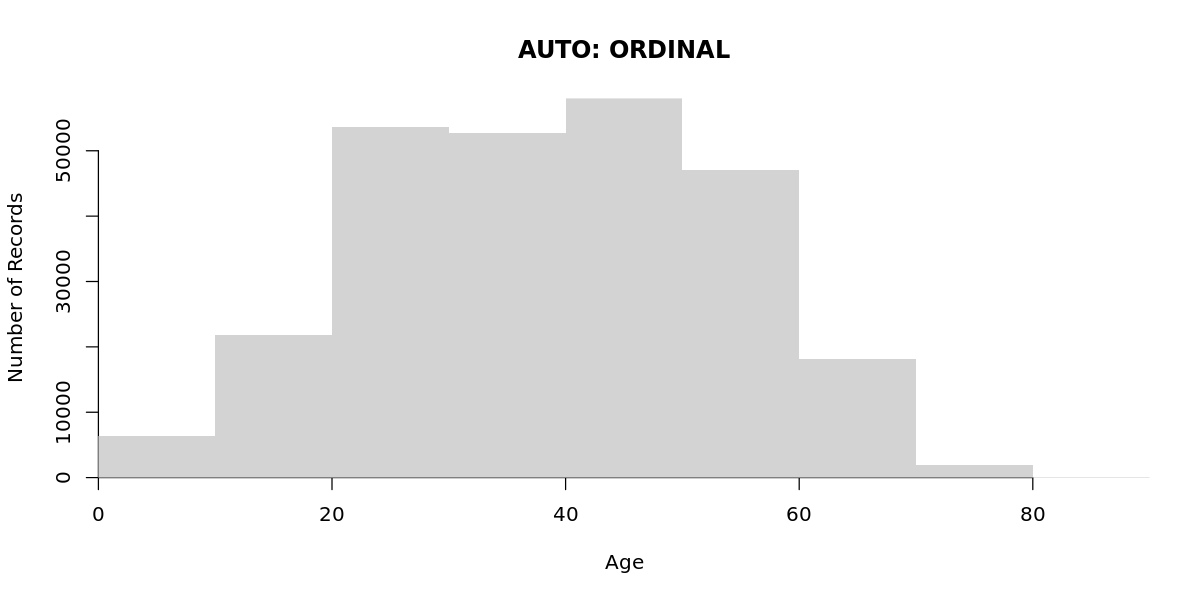

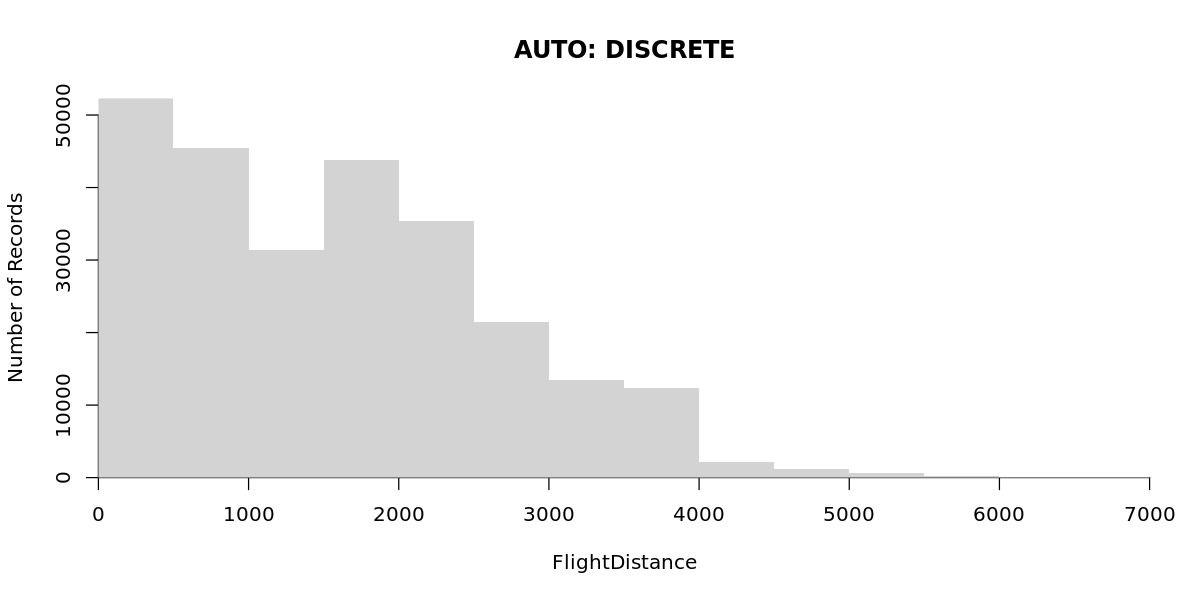

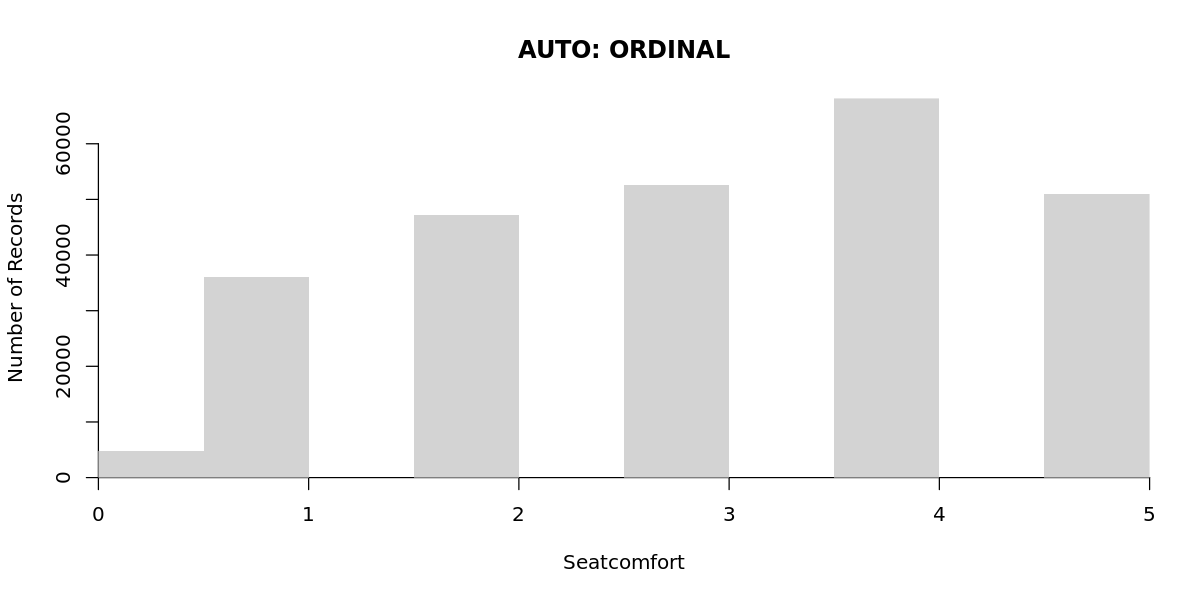

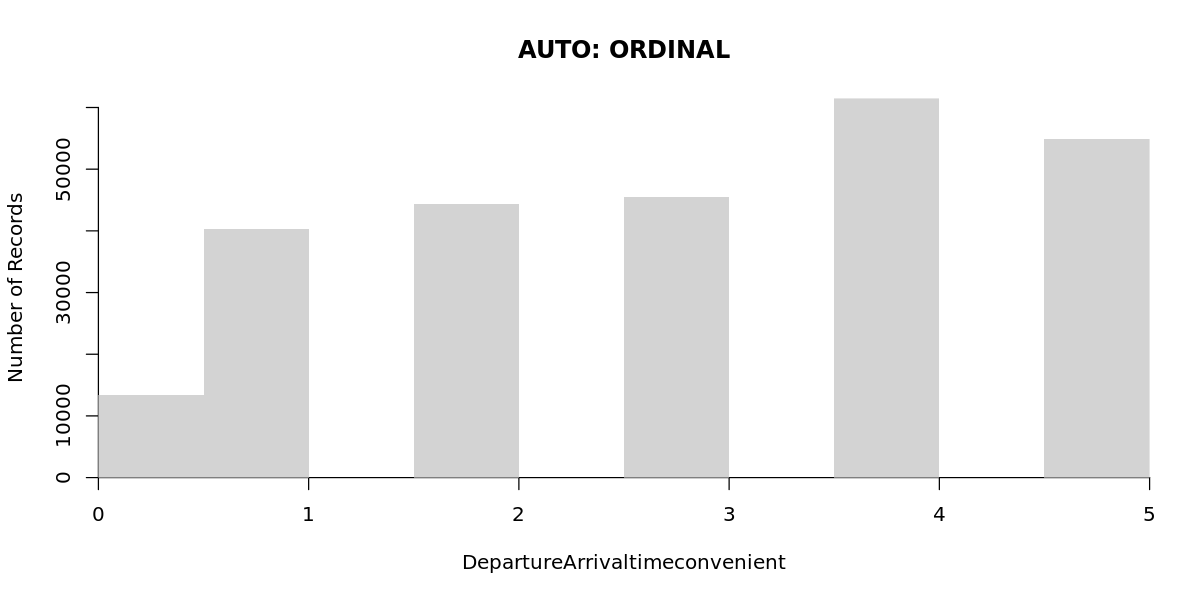

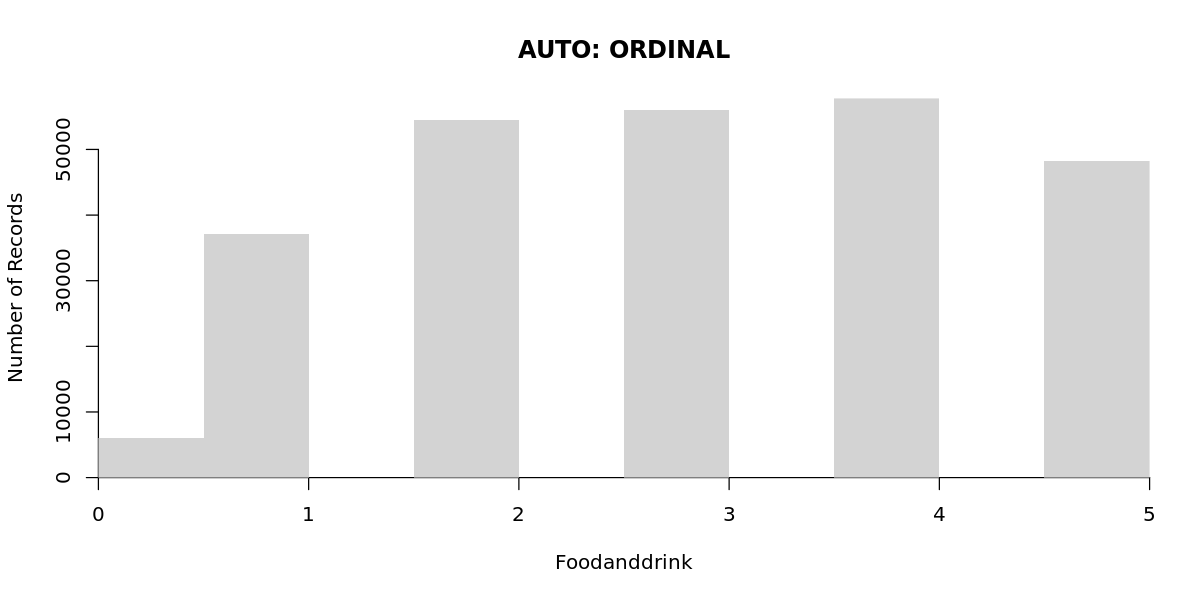

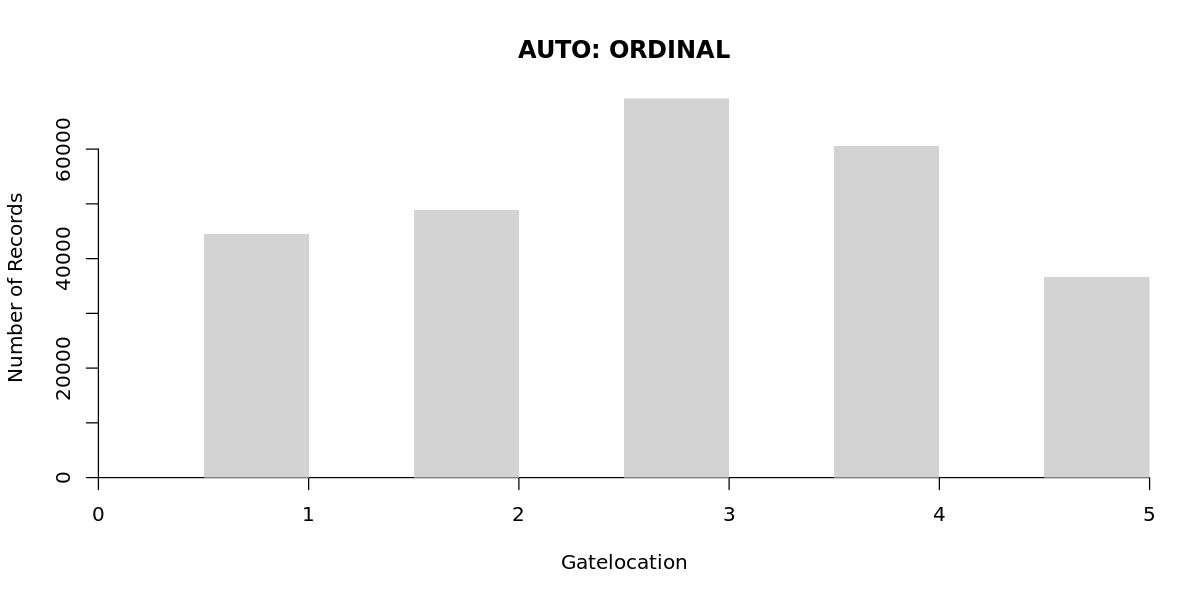

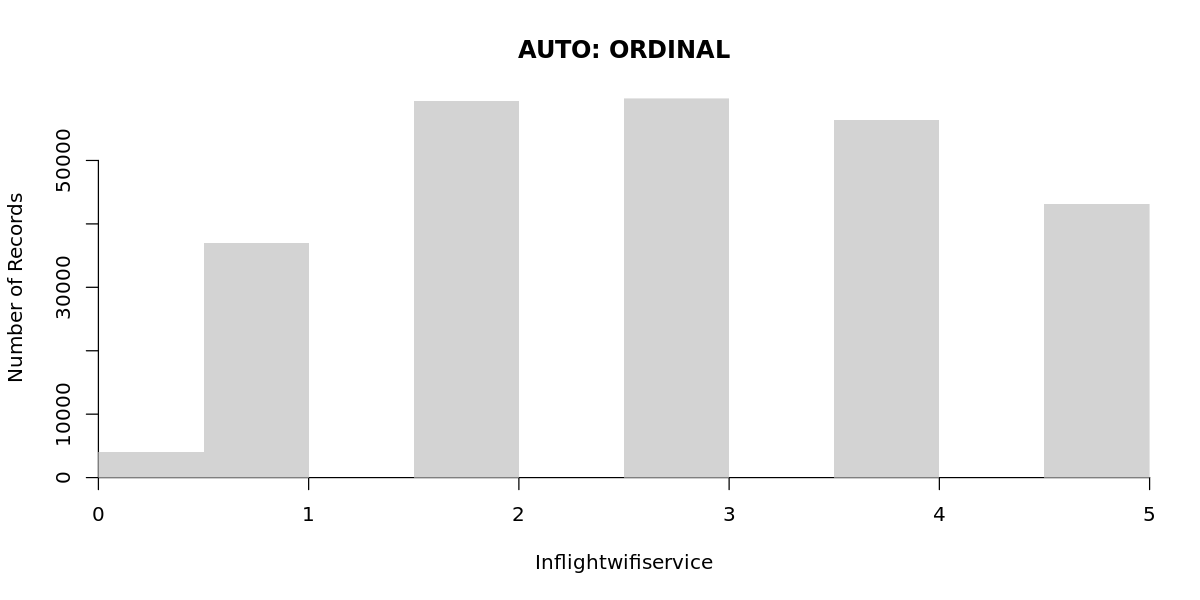

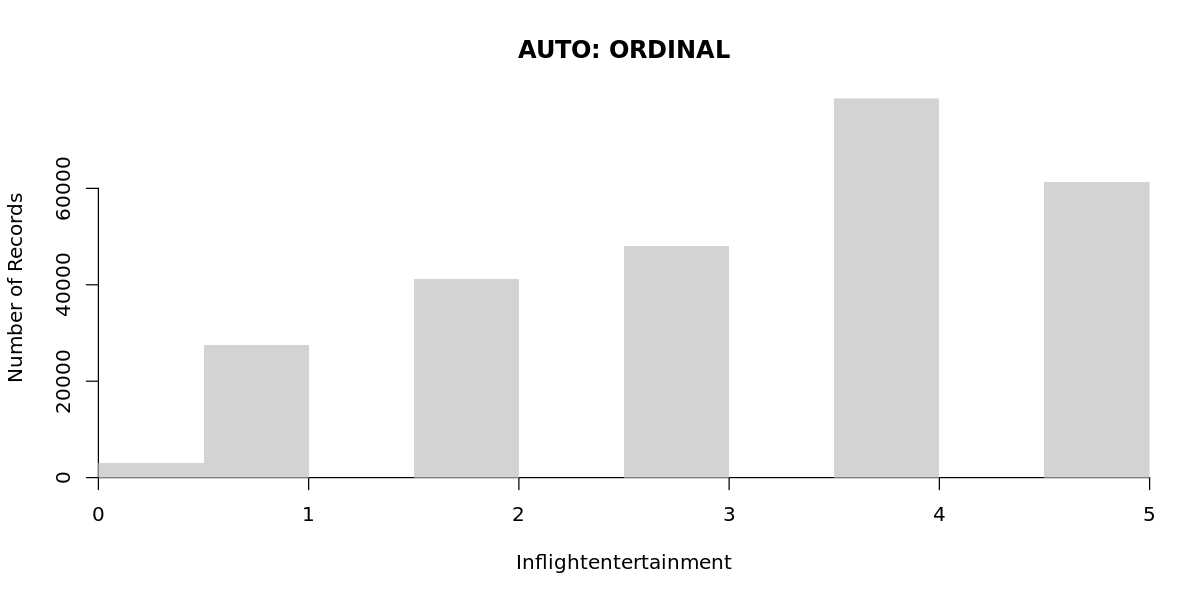

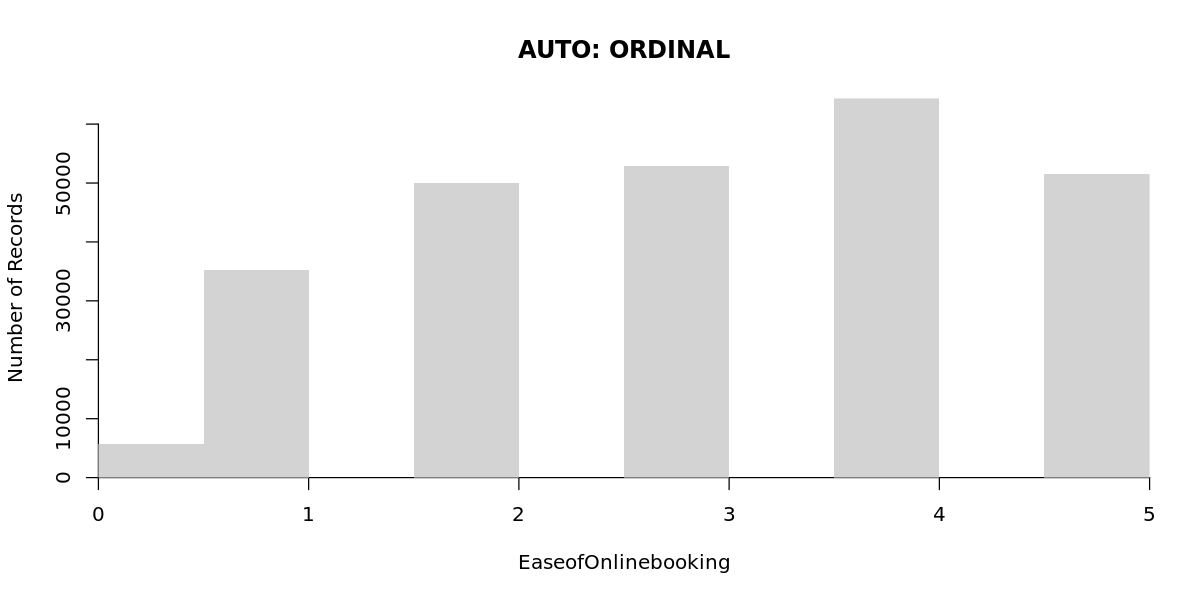

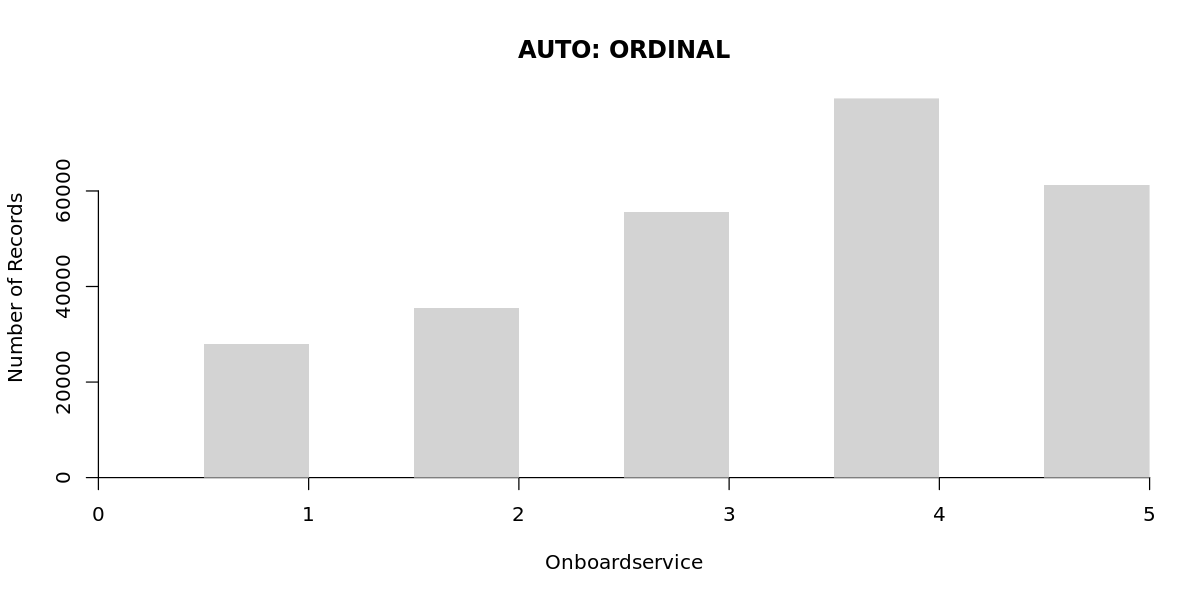

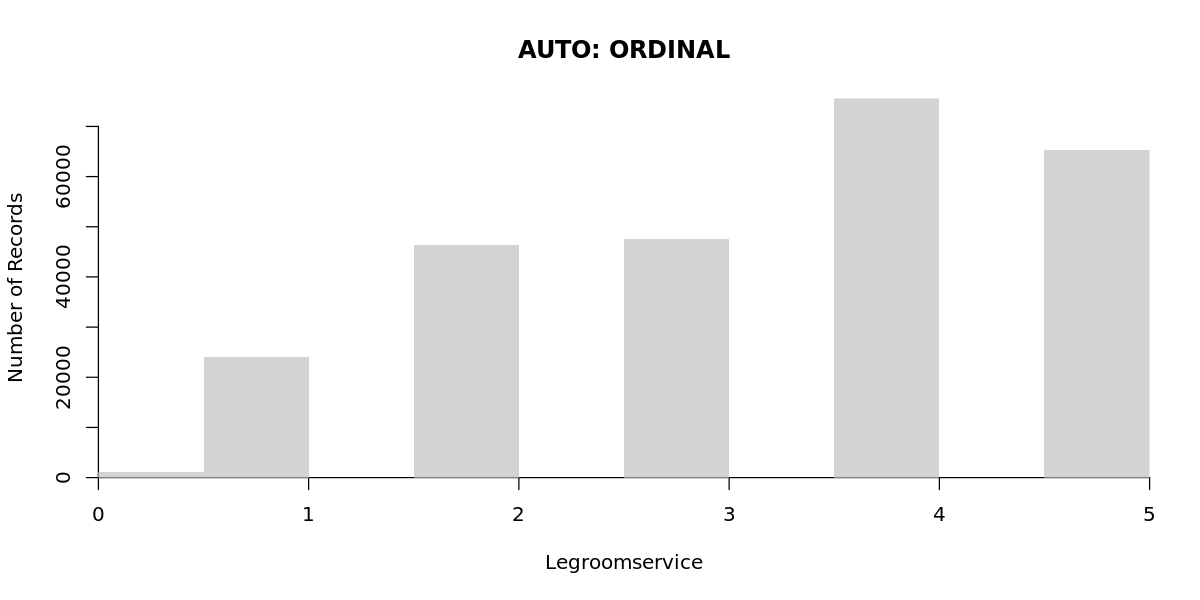

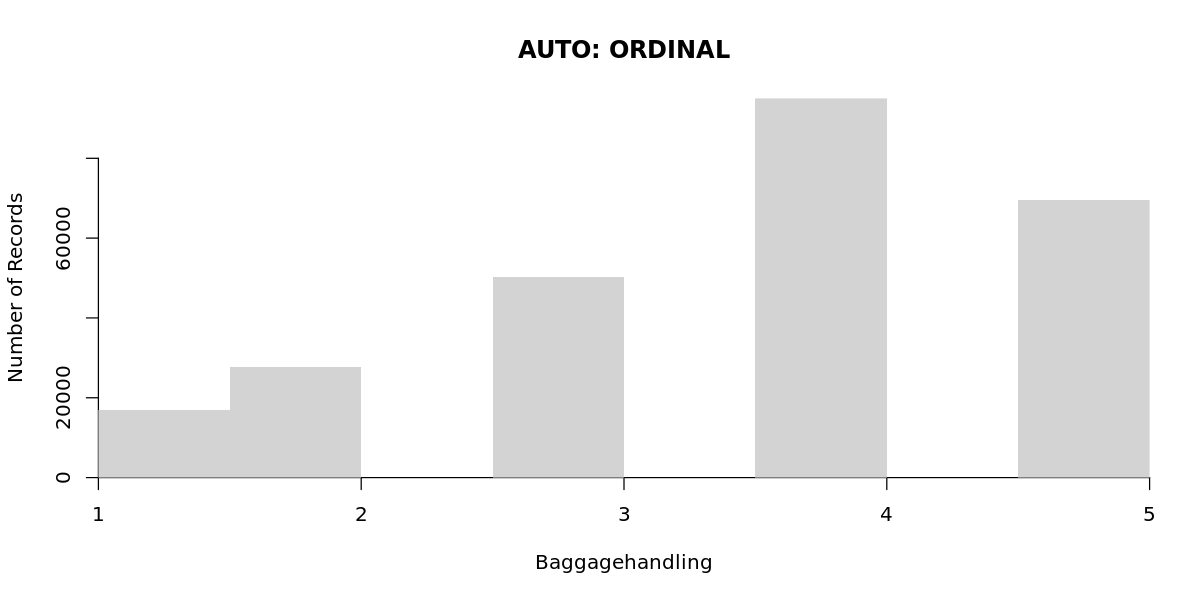

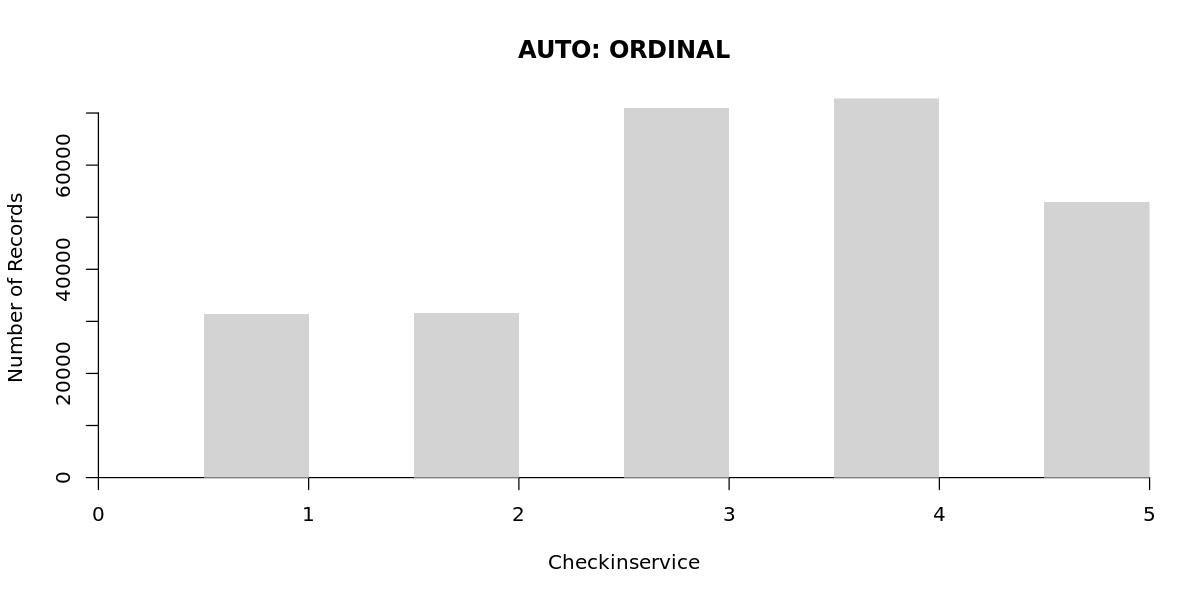

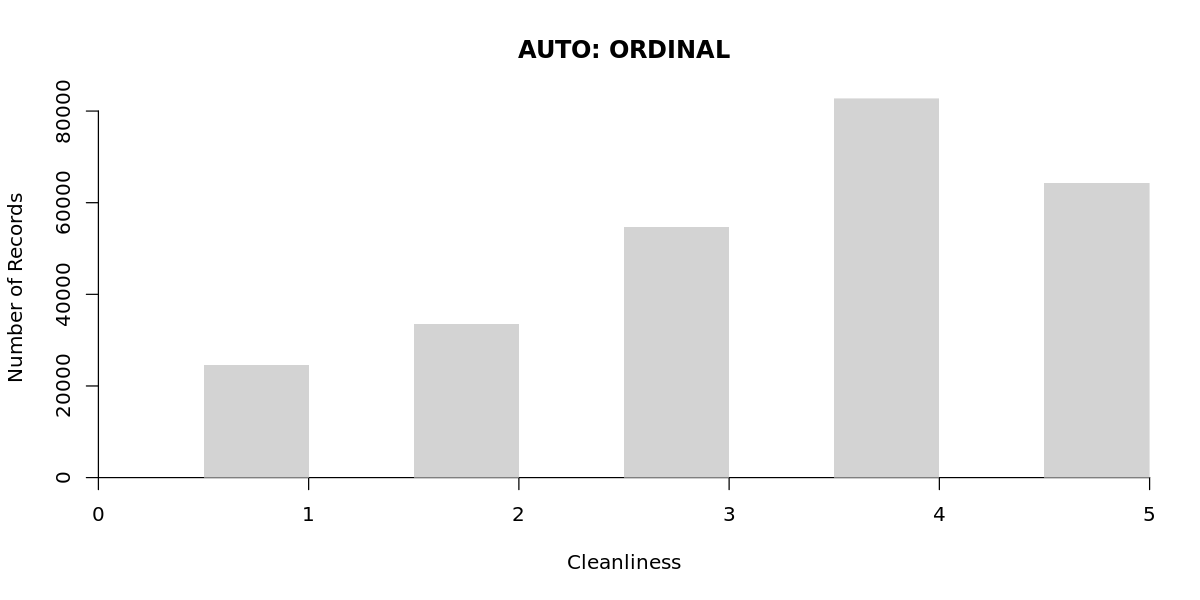

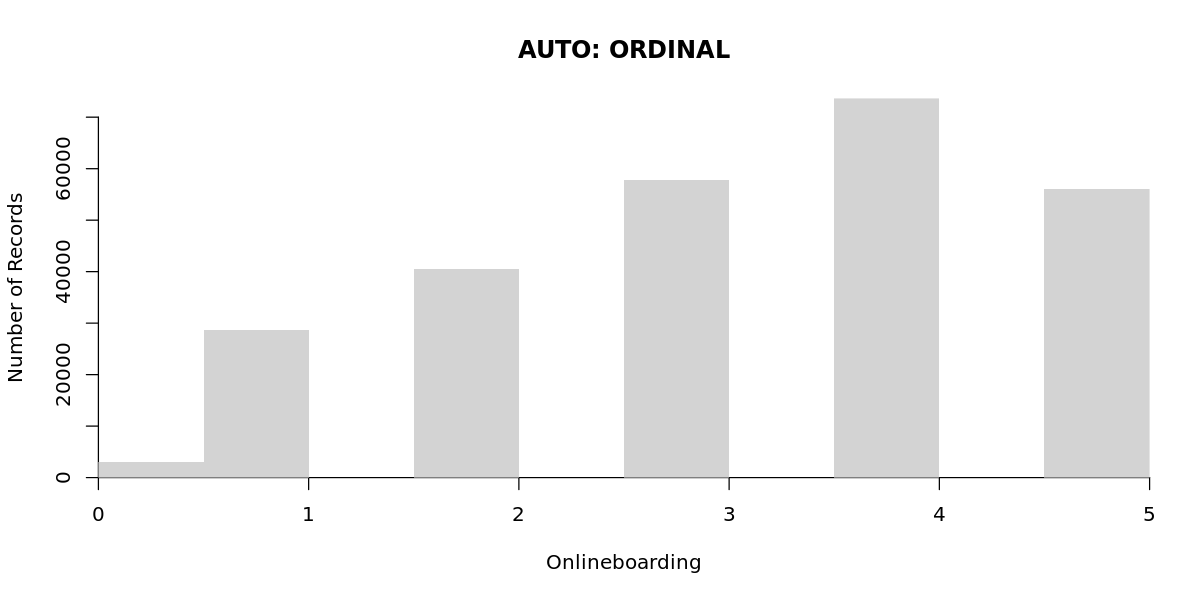

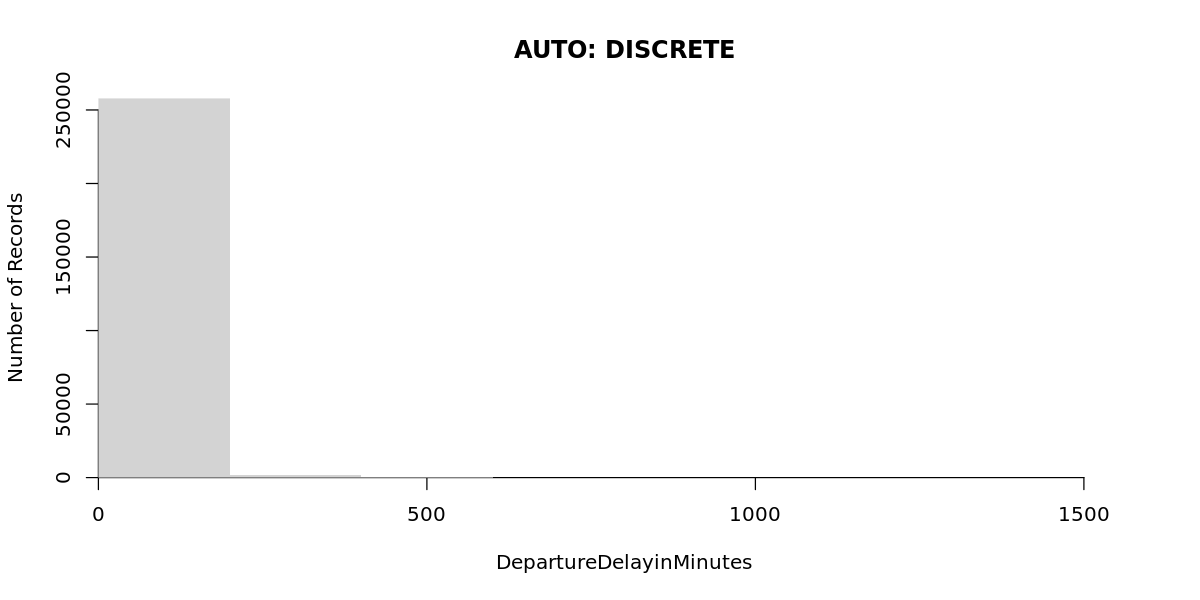

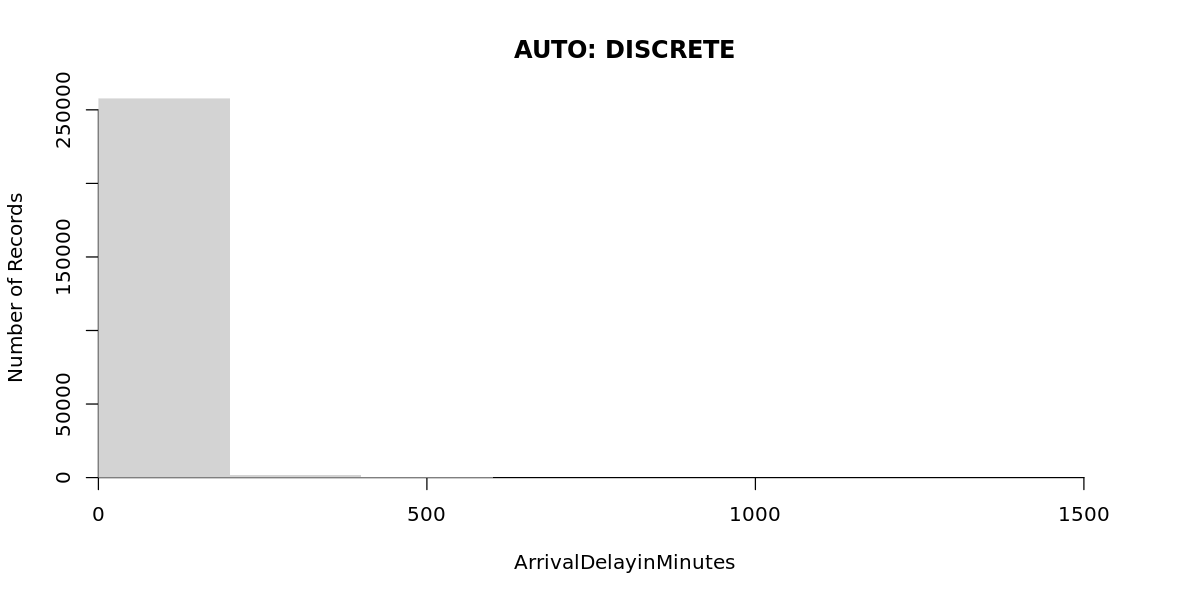

In [39]:
# Number of empty bins to determine discrete
DISCRETE_BINS = 5
field_types_ord_dis<-NPREPROCESSING_discreteNumeric(dataset=dataset,field_types=field_types, cutoff=DISCRETE_BINS)

In [40]:
is_sat<-  ifelse(names(dataset)%in%sat_cols , "SAT", "NOTSAT")
is_time <- ifelse(names(dataset)%in%time_field,"TIME", "NOTTIME")
is_dis <- ifelse(names(dataset)%in%distance_field,'DIS','NOTDIS')
types_table<-data.frame(field=names(dataset),
                        initial=field_types,
                        types=field_types_ord_dis, 
                        is_sat=is_sat,
                        is_time=is_time,
                        is_dis = is_dis)
print(formattable::formattable(types_table))

types_table

field                          initial  types    is_sat is_time is_dis
1  satisfactionv2                 SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
2  Gender                         SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
3  CustomerType                   SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
4  Age                            NUMERIC  ORDINAL  NOTSAT NOTTIME NOTDIS
5  TypeofTravel                   SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
6  Class                          SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
7  FlightDistance                 NUMERIC  DISCRETE NOTSAT NOTTIME DIS   
8  Seatcomfort                    NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
9  DepartureArrivaltimeconvenient NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
10 Foodanddrink                   NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
11 Gatelocation                   NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
12 Inflightwifiservice            NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
13 Inflightentertainment          NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
14 EaseofOnlinebooking            NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
15 Onboardservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
16 Legroomservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
17 Baggagehandling                NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
18 Checkinservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
19 Cleanliness                    NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
20 Onlineboarding                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
21 DepartureDelayinMinutes        NUMERIC  DISCRETE NOTSAT TIME    NOTDIS
22 ArrivalDelayinMinutes          NUMERIC  DISCRETE NOTSAT TIME    NOTDIS

## Remove outlier in ordinals fields

The next step before starting a preprocessing a dataset is removing an outlier from  ordinals fields and replace it with mean of each fields

[1] "Outlier field= Age Records= 12 Replaced with MEAN"


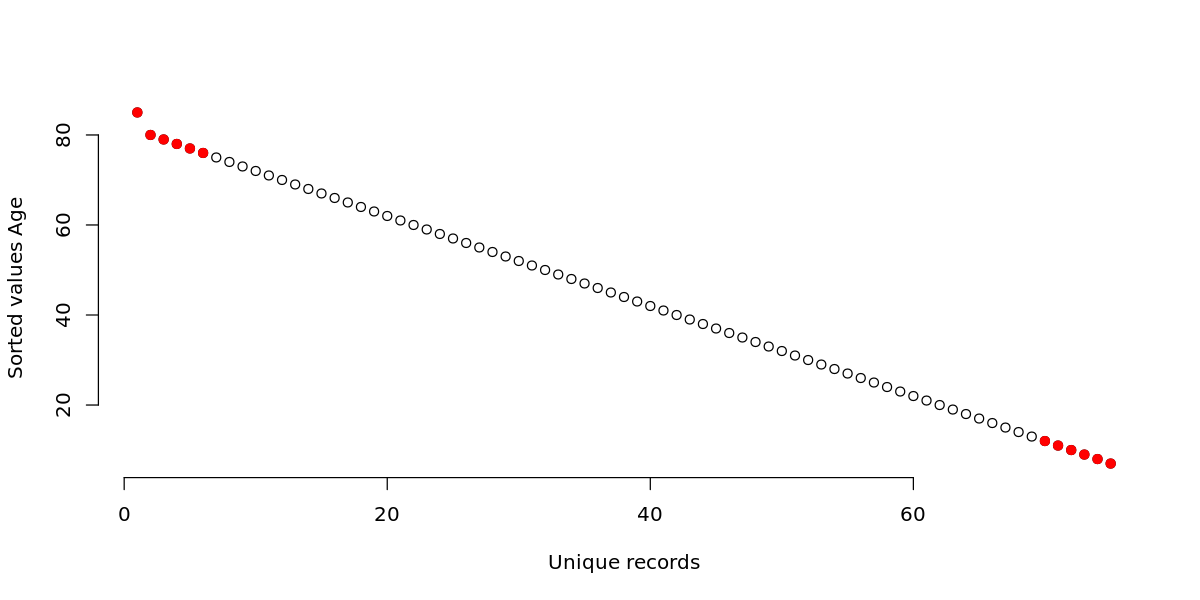

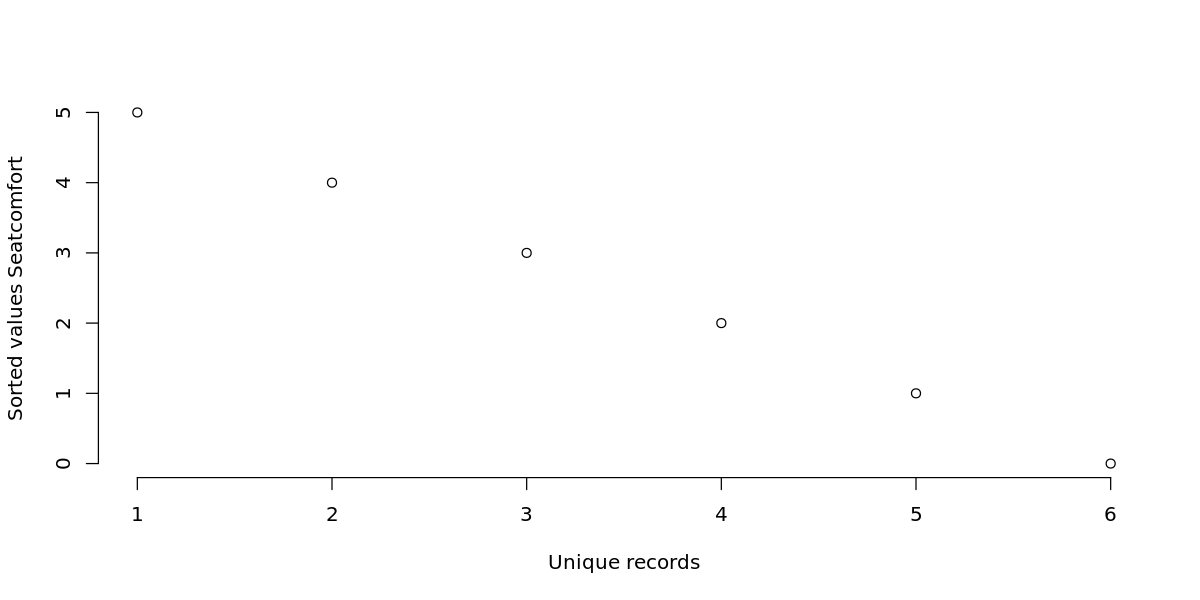

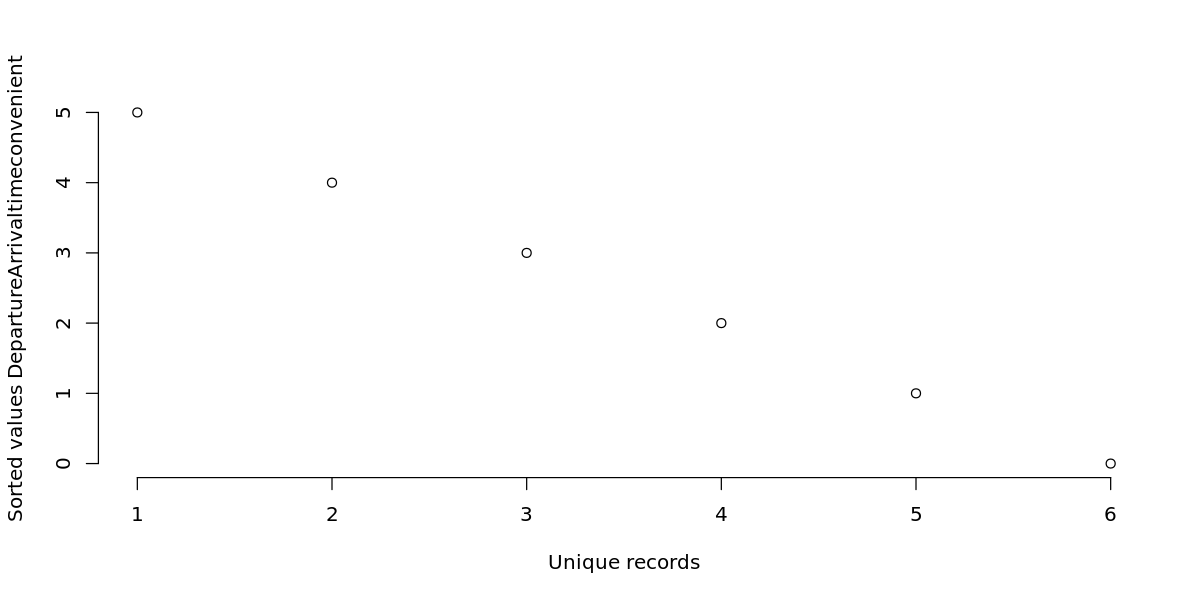

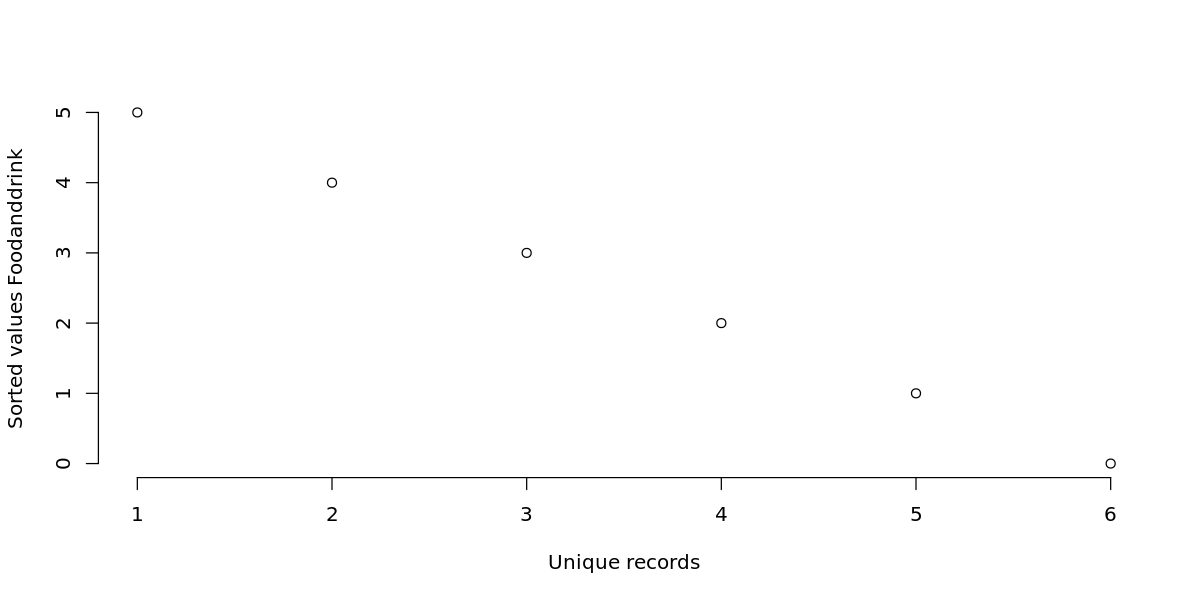

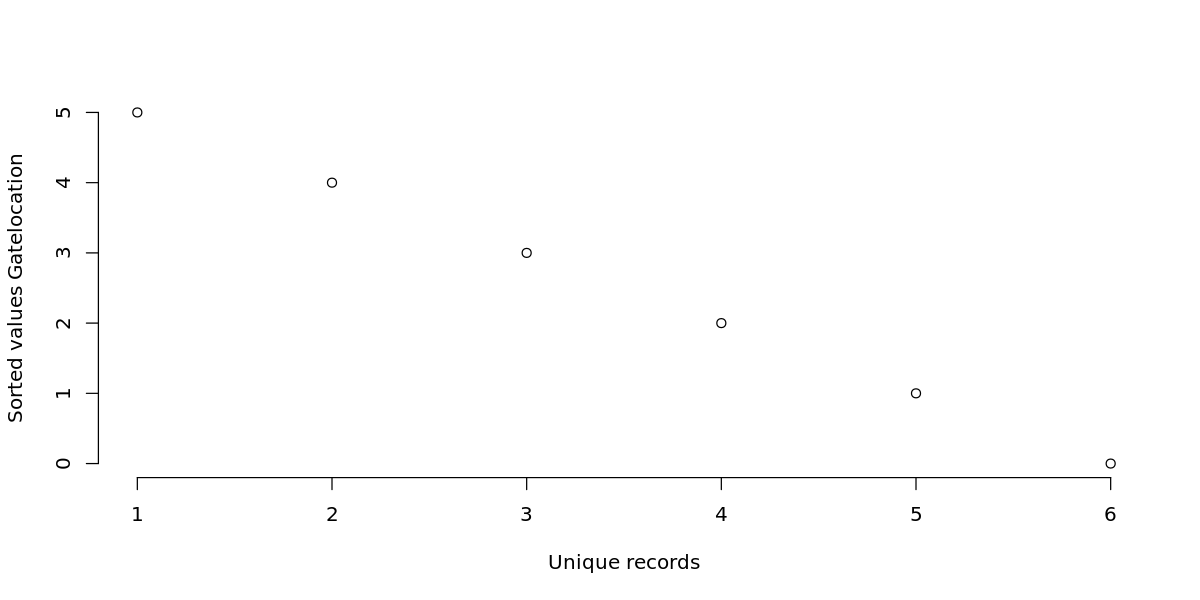

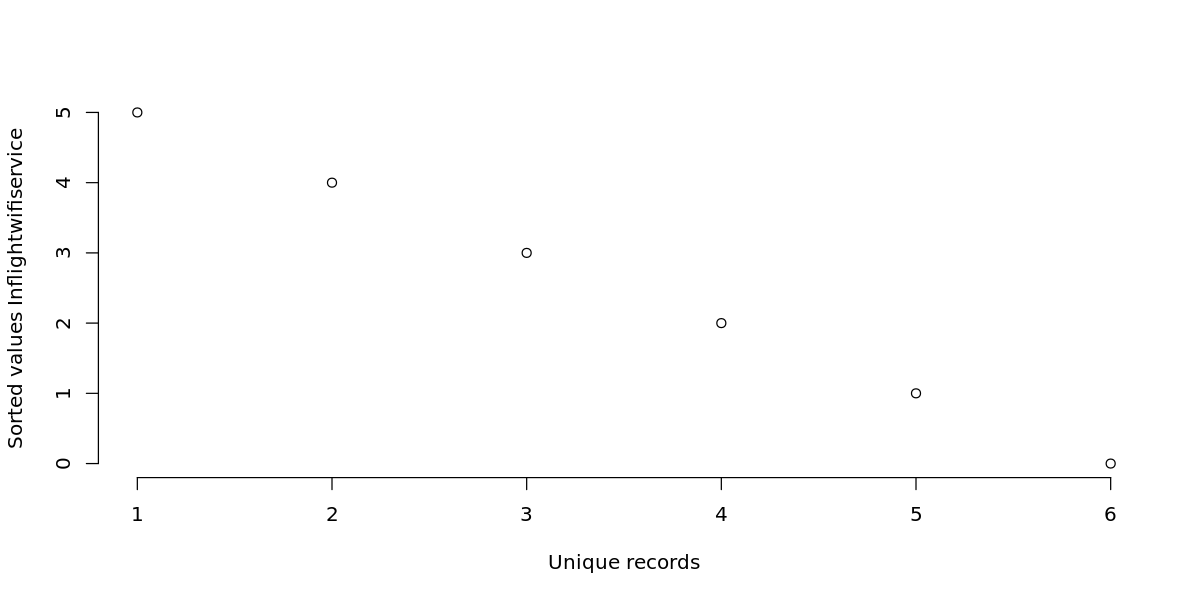

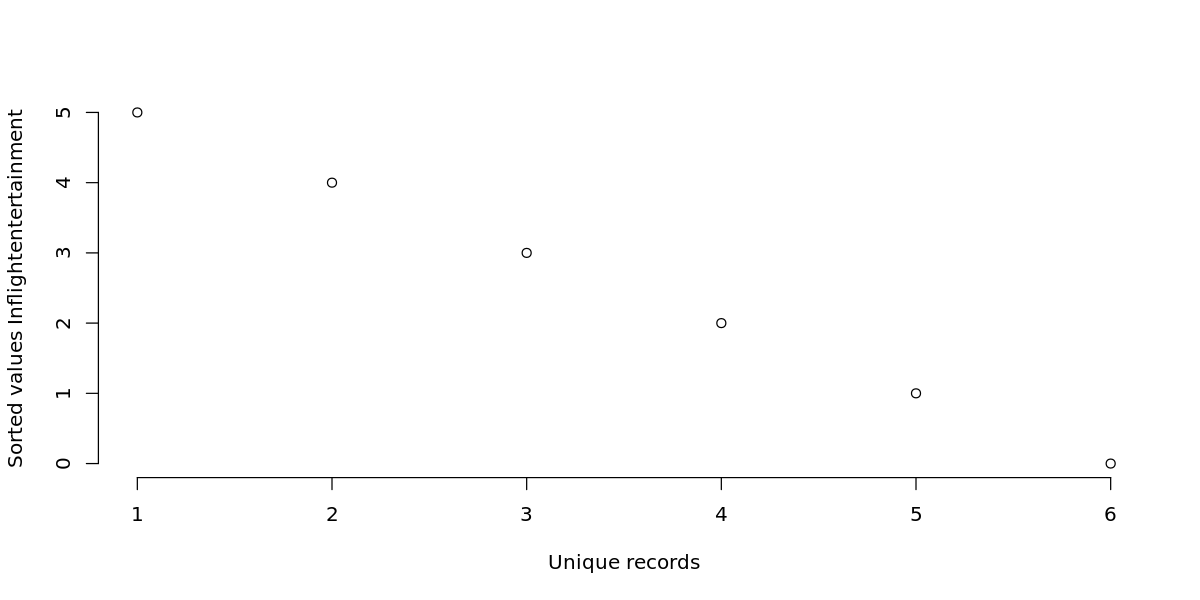

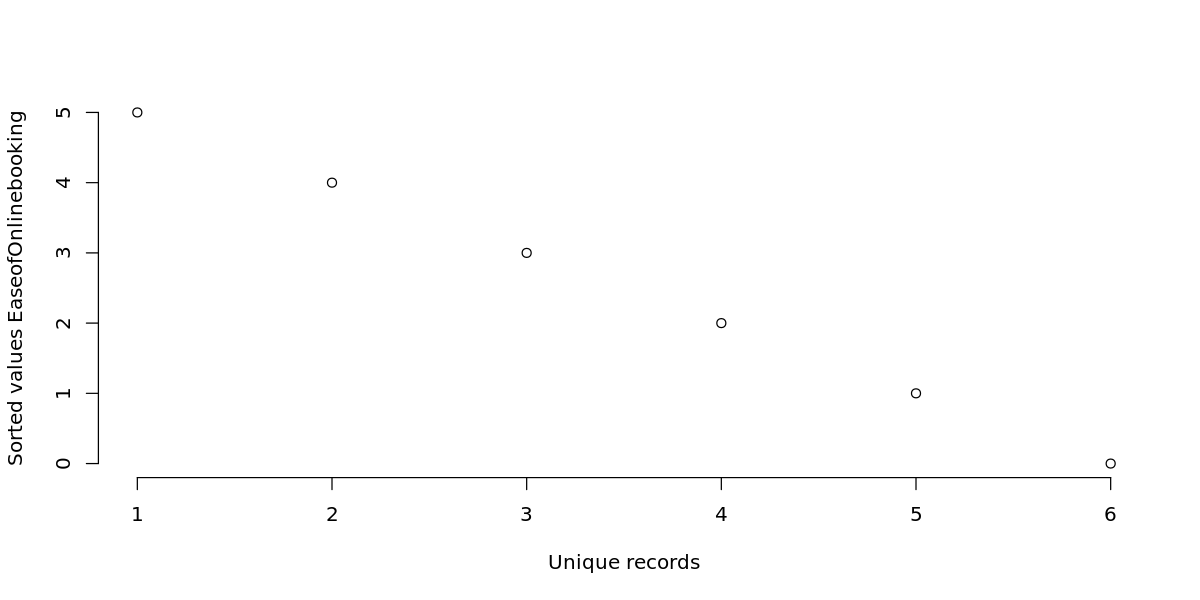

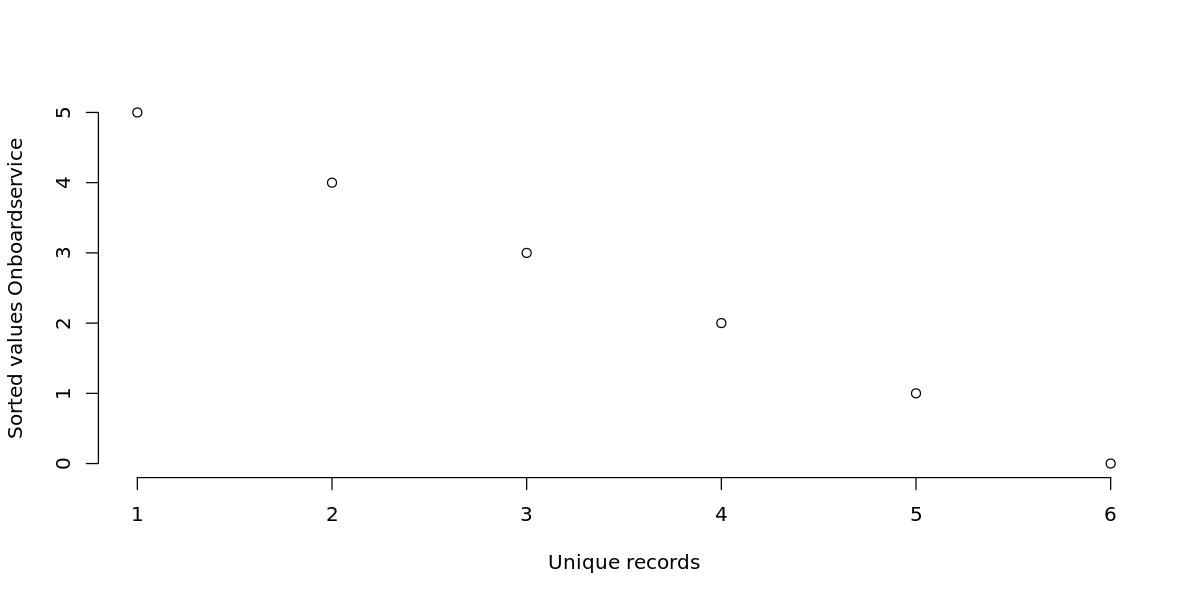

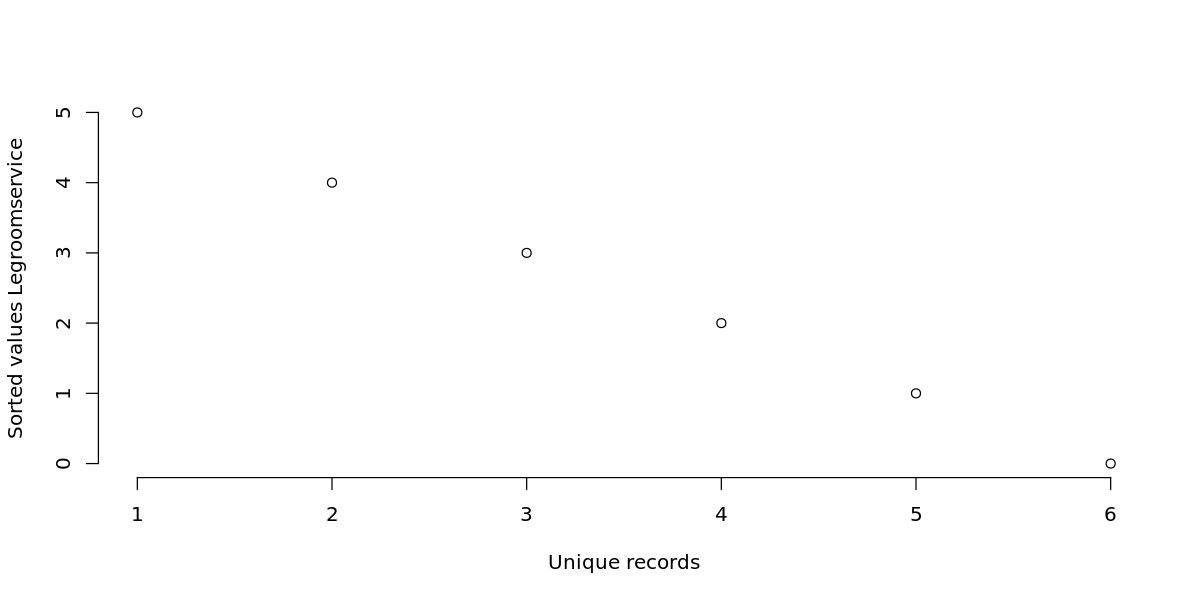

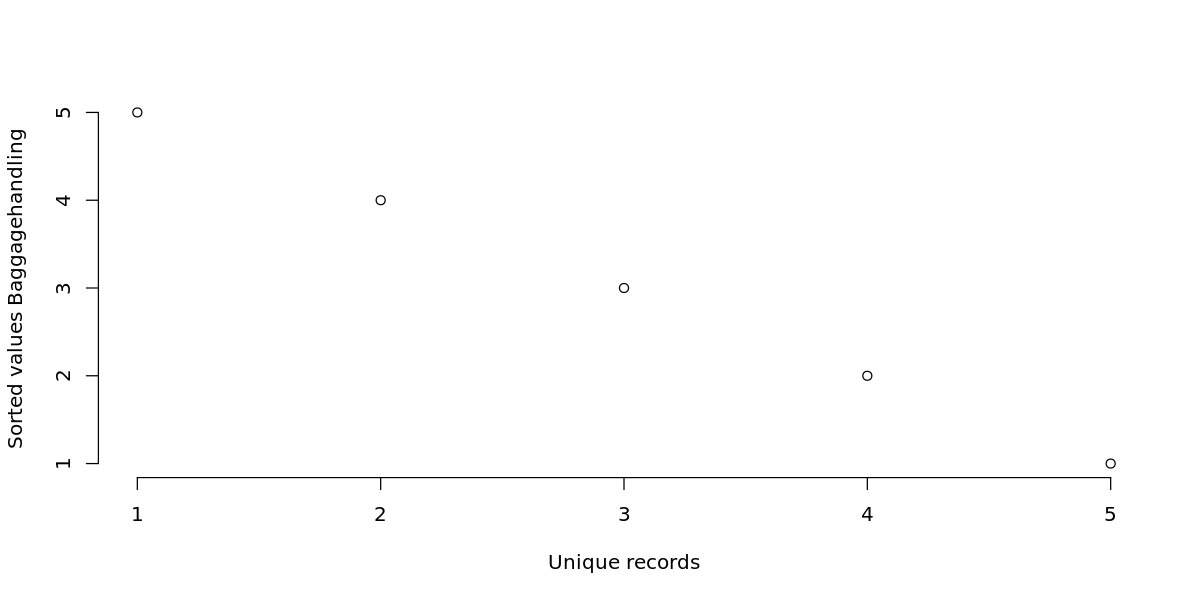

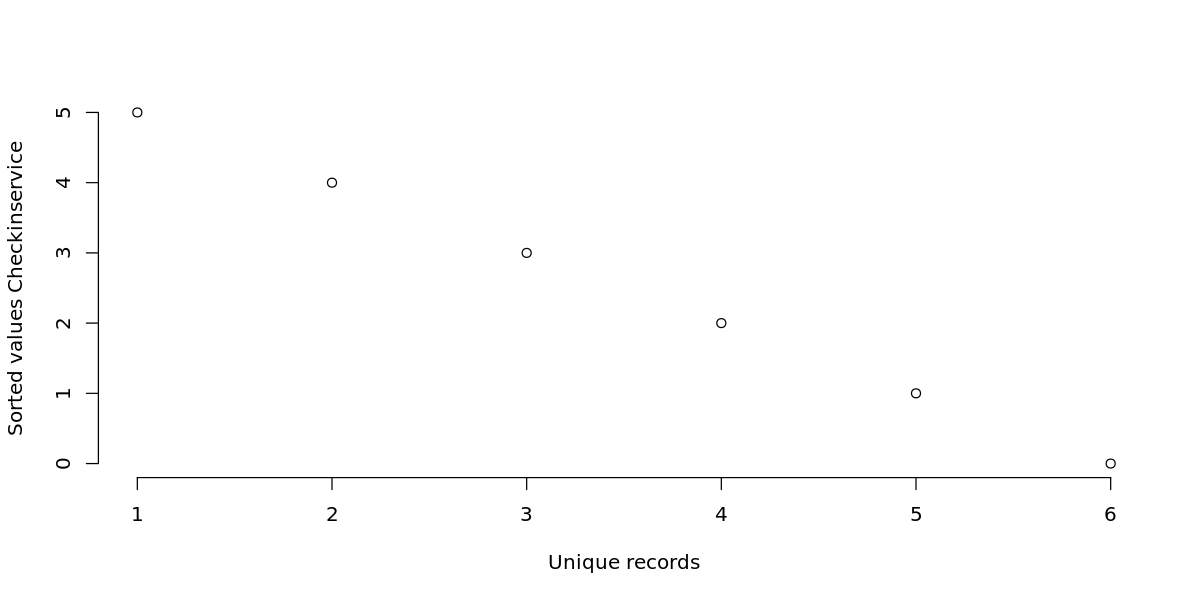

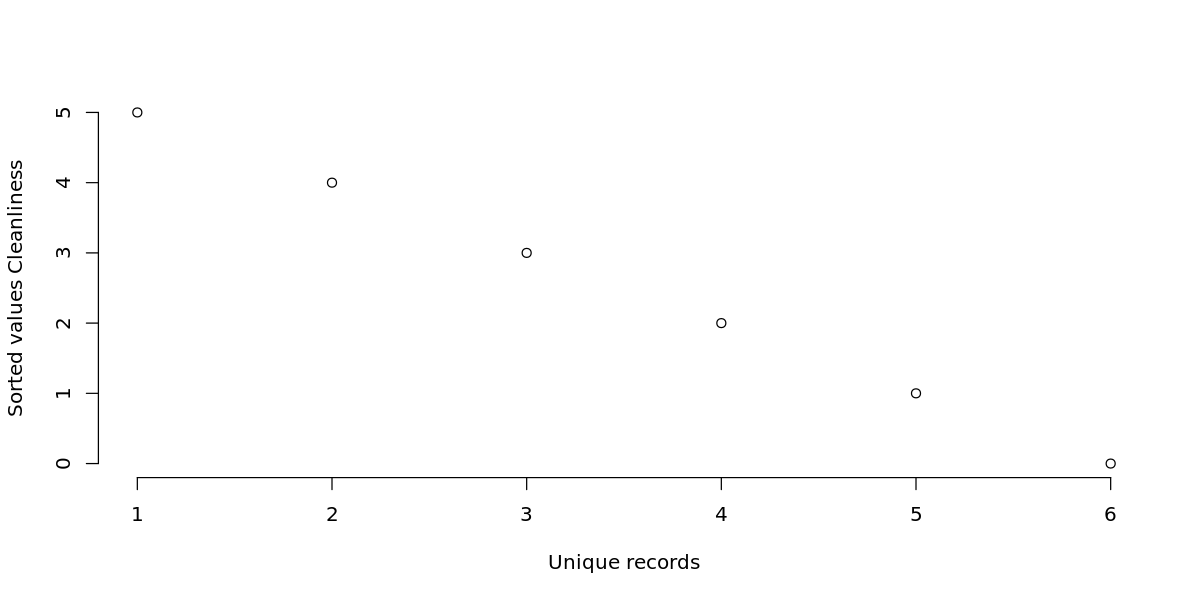

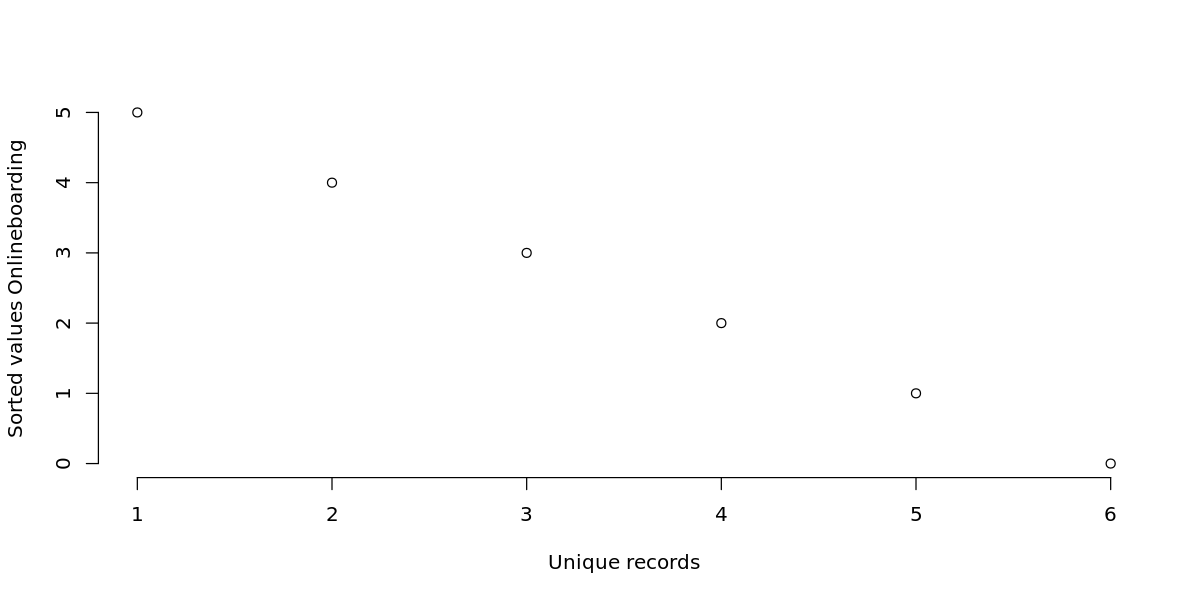

In [41]:
OUTLIER_CONF = 0.85
# get a dataframe contains only ordinals fields
ordinals<-dataset[,which(field_types_ord_dis=='ORDINAL')]
# remove outlier and replace it with means value
ordinals<-NPREPROCESSING_outlier(ordinals=ordinals,confidence=OUTLIER_CONF)

In [42]:
# replace an old ordinal field with new ordinal value after remove outlier
dataset[,names(ordinals)]<-ordinals

In [43]:
# function 

## Preprocess ordinals values


### Satisfaction fields


##### Normalization (satisfaction fields) : $ Xnormalize = \frac{X}{5}$

For ordinal fields which contains a rating of a passenger satisfaction, these field will be normalize by value of 5 which is the different between maximum rating (5) and minimum rating(0). Instead of normalize by a maximum and minimum value in each colums since some fill its does not contains a minimum rating but we want to normalize in a same scale for all the field containing rating information. The range of the value after normalize will be in a range of 0.0 to 1.0. 

### Others Ordinal fields

##### Normalization (satisfaction fields) :  $ Xnormalize = \frac{X-X\min}{X\max -X\min} $

For others ordinal fields, each colums will be normalize by substract the value with the minimum vaue and divide by the different between maximum and minimum values. The range of the value after normalize will be in a range of 0.0 to 1.0. 

In [44]:
# call function Preprocess ordinal which will normalize a value according to type of its fields
processed_ordinal<-Preprocess_ordinal(dataset,types_table)
head(processed_ordinal)

Age       Seatcomfort DepartureArrivaltimeconvenient Foodanddrink
[1,] 0.7945205 0           0                              0           
[2,] 0.5479452 0           0                              0           
[3,] 0.1095890 0           0                              0           
[4,] 0.7260274 0           0                              0           
[5,] 0.8630137 0           0                              0           
[6,] 0.3150685 0           0                              0           
     Gatelocation Inflightwifiservice Inflightentertainment EaseofOnlinebooking
[1,] 0.4          0.4                 0.8                   0.6                
[2,] 0.6          0.0                 0.4                   0.6                
[3,] 0.6          0.4                 0.0                   0.4                
[4,] 0.6          0.6                 0.8                   0.2                
[5,] 0.6          0.8                 0.6                   0.4                
[6,] 0.6          0.4                 0.0                   0.4                
     Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
[1,] 0.6            0.0            0.6             1.0            0.6        
[2,] 0.8            0.8            0.8             0.4            0.6        
[3,] 0.6            0.6            0.8             0.8            0.8        
[4,] 0.2            0.0            0.2             0.8            0.2        
[5,] 0.4            0.0            0.4             0.8            0.4        
[6,] 1.0            0.8            1.0             1.0            0.8        
     Onlineboarding
[1,] 0.4           
[2,] 0.4           
[3,] 0.4           
[4,] 0.6           
[5,] 1.0           
[6,] 0.4

## Preprocess Categorical (Symbolic and Discrete values)

For preprocessing a Symbolic and Discrete values, symbolic values will be transform from symbolic value to on hot encoding directly. And for discrete values, it will be convert to a symbolic values first then transform those value to a form of on hot encoding. 

### Convert Discrete values to symbolic 

The fields ***('DepatureDelayinMinutes'), ('ArrivalDelayinMinutes') and ('FlightDistance')*** are discrete fields that need to be convert to symbolic value before tranforming it to one hot encoding.


For ***('DepatureDelayinMinutes') and  ('ArrivalDelayinMinutes')*** fields, we convert a delay to 4 symbolic values

- Value 0 for a delay time equal to 0 minutes or no delay
- Value 1 for a delay time from 1 to 29 minutes
- Value 2 for a delay time from 30 to 59 minutes
- Value 3 for a delay time from 60 minutes above

For ***('Flightdistance')*** fiedls, according to information from commercial flight duration. The distance of a flight are classified into three categories.

- Short Haul for distance from 600 to 800 miles or less than  
- Long Haul for distance from 2,200 to 2,600 or more than
- Medium Haul for a distance in between Short and Long Haul which are distance from 800 to 2200 miles 




In [45]:
time_data<-dataset[,time_field]
head(time_data)
time_data<-Process_timeDelay(time_data)
head(time_data)


DepartureDelayinMinutes ArrivalDelayinMinutes
1   0                       0                  
2 310                     305                  
3   0                       0                  
4   0                       0                  
5   0                       0                  
6   0                       0

DepartureDelayinMinutes ArrivalDelayinMinutes
[1,] 0                       0                    
[2,] 3                       3                    
[3,] 0                       0                    
[4,] 0                       0                    
[5,] 0                       0                    
[6,] 0                       0

In [46]:
distance_data<-dataset[, grepl(distance_field, names(dataset)), drop = FALSE]
head((distance_data))
distance_data<-Process_distance(distance_data)
head(distance_data)

FlightDistance
1  265          
2 2464          
3 2138          
4  623          
5  354          
6 1894

FlightDistance
[1,] short         
[2,] long          
[3,] medium        
[4,] short         
[5,] short         
[6,] medium

In [47]:
# get symbolic and discrete data 
categor_data<-dataset[,symbolic_index]



# convert a discrete value to symbolic values



# combine symbolic data with converted discrete data
categor_data<-cbind(categor_data,time_data)
categor_data<-cbind(categor_data,distance_data)
head(categor_data)

satisfactionv2 Gender CustomerType   TypeofTravel    Class   
1 satisfied      Female Loyal Customer Personal Travel Eco     
2 satisfied      Male   Loyal Customer Personal Travel Business
3 satisfied      Female Loyal Customer Personal Travel Eco     
4 satisfied      Female Loyal Customer Personal Travel Eco     
5 satisfied      Female Loyal Customer Personal Travel Eco     
6 satisfied      Male   Loyal Customer Personal Travel Eco     
  DepartureDelayinMinutes ArrivalDelayinMinutes FlightDistance
1 0                       0                     short         
2 3                       3                     long          
3 0                       0                     medium        
4 0                       0                     short         
5 0                       0                     short         
6 0                       0                     medium

After converted a discrete value to symbolic value then combine the data together in a same dataframe.

### Transform both symbolic and discrete data to one hot encoding

Then we transform a dataframe containing both symbolic and discrete into a form of one hot encoding.

In [48]:

processed_catdata<-Preprocess_categorical(categor_data)
head(processed_catdata)

satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
1 0              1      0            0            0             1       
2 0              0      0            0            1             0       
3 0              1      0            0            0             1       
4 0              1      0            0            0             1       
5 0              1      0            0            0             1       
6 0              0      0            0            0             1       
  ClassEco.Plus DepartureDelayinMinutes0 DepartureDelayinMinutes1
1 0             1                        0                       
2 0             0                        0                       
3 0             1                        0                       
4 0             1                        0                       
5 0             1                        0                       
6 0             1                        0                       
  DepartureDelayinMinutes2 DepartureDelayinMinutes3 ArrivalDelayinMinutes0
1 0                        0                        1                     
2 0                        1                        0                     
3 0                        0                        1                     
4 0                        0                        1                     
5 0                        0                        1                     
6 0                        0                        1                     
  ArrivalDelayinMinutes1 ArrivalDelayinMinutes2 ArrivalDelayinMinutes3
1 0                      0                      0                     
2 0                      0                      1                     
3 0                      0                      0                     
4 0                      0                      0                     
5 0                      0                      0                     
6 0                      0                      0                     
  FlightDistancelong FlightDistancemedium FlightDistanceshort
1 0                  0                    1                  
2 1                  0                    0                  
3 0                  1                    0                  
4 0                  0                    1                  
5 0                  0                    1                  
6 0                  1                    0

### Combine processed Ordinal data and Categorical

After finsinih preprocess all the fields in dataset, all the processed dataset is ready for merging into one dataframe

In [49]:
processed_data<-cbind(processed_catdata, processed_ordinal)
#processed_data<-cbind(processed_data,time_data)

In [50]:
# Convert label 0 to 1 and vice versa for satisfation label to represent 1 for statisfy  and 0 for not 
processed_data$satisfactionv2 <- ifelse(as.numeric(processed_data$satisfactionv2)==0,1,0)
head(processed_data)

satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
1 1              1      0            0            0             1       
2 1              0      0            0            1             0       
3 1              1      0            0            0             1       
4 1              1      0            0            0             1       
5 1              1      0            0            0             1       
6 1              0      0            0            0             1       
  ClassEco.Plus DepartureDelayinMinutes0 DepartureDelayinMinutes1
1 0             1                        0                       
2 0             0                        0                       
3 0             1                        0                       
4 0             1                        0                       
5 0             1                        0                       
6 0             1                        0                       
  DepartureDelayinMinutes2 ⋯ Gatelocation Inflightwifiservice
1 0                        ⋯ 0.4          0.4                
2 0                        ⋯ 0.6          0.0                
3 0                        ⋯ 0.6          0.4                
4 0                        ⋯ 0.6          0.6                
5 0                        ⋯ 0.6          0.8                
6 0                        ⋯ 0.6          0.4                
  Inflightentertainment EaseofOnlinebooking Onboardservice Legroomservice
1 0.8                   0.6                 0.6            0.0           
2 0.4                   0.6                 0.8            0.8           
3 0.0                   0.4                 0.6            0.6           
4 0.8                   0.2                 0.2            0.0           
5 0.6                   0.4                 0.4            0.0           
6 0.0                   0.4                 1.0            0.8           
  Baggagehandling Checkinservice Cleanliness Onlineboarding
1 0.6             1.0            0.6         0.4           
2 0.8             0.4            0.6         0.4           
3 0.8             0.8            0.8         0.4           
4 0.2             0.8            0.2         0.6           
5 0.4             0.8            0.4         1.0           
6 1.0             1.0            0.8         0.4

In [51]:
names(processed_data)

[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "DepartureDelayinMinutes0"      
 [9] "DepartureDelayinMinutes1"       "DepartureDelayinMinutes2"      
[11] "DepartureDelayinMinutes3"       "ArrivalDelayinMinutes0"        
[13] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[15] "ArrivalDelayinMinutes3"         "FlightDistancelong"            
[17] "FlightDistancemedium"           "FlightDistanceshort"           
[19] "Age"                            "Seatcomfort"                   
[21] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[23] "Gatelocation"                   "Inflightwifiservice"           
[25] "Inflightentertainment"          "EaseofOnlinebooking"           
[27] "Onboardservice"                 "Legroomservice"                
[29] "Baggagehandling"                "Checkinservice"                
[31] "Cleanliness"                    "Onlineboarding"

### Removing Reduntant fields

After merging a dataset, we shall check a redundant value in a dataset and remove it. Since 

[1] "Before redundancy check Fields= 32"


Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"cl.lim" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"cl.lim" is not a graphical parameter”
Warning message in title(title, ...):
“"cl.lim" is not a graphical parameter”


[1] "Following fields are correlated"
                         row col
ClassEco                   6   5
ClassBusiness              5   6
ArrivalDelayinMinutes3    15  11
DepartureDelayinMinutes3  11  15
[1] "ClassEco ~ ClassBusiness"
[1] "ClassBusiness ~ ClassEco"
[1] "ArrivalDelayinMinutes3 ~ DepartureDelayinMinutes3"
[1] "DepartureDelayinMinutes3 ~ ArrivalDelayinMinutes3"
[1] "Removing the following fields"
[1] "ClassBusiness"            "DepartureDelayinMinutes3"
[1] "Number of rows before removing redundant :  259760"
[1] "Number of rows after removing redundant :  259760"
[1] "Number of columns before removing redundant : 32"
[1] "Number of columns after removing redundant :  30"


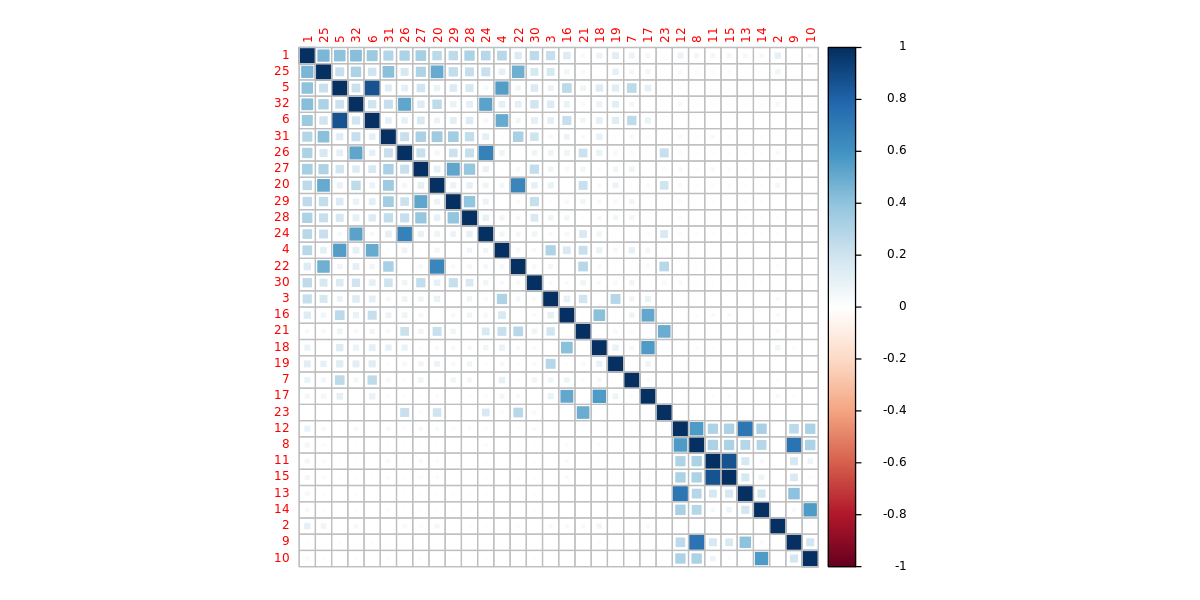

In [52]:
# ************************************************
# Q14: Are any of the fields redundant?
nrow_before<-paste('Number of rows before removing redundant : ', nrow(processed_data))
ncol_before<-paste('Number of columns before removing redundant :', ncol(processed_data))
processed_data<-NPREPROCESSING_redundantFields(dataset=processed_data,cutoff=OUTLIER_CONF)
nrow_after<-paste('Number of rows after removing redundant : ' , nrow(processed_data))
ncol_after<-paste("Number of columns after removing redundant : ", ncol(processed_data))

print(nrow_before)
print(nrow_after)
print(ncol_before)
print(ncol_after)

After running a function NPREPROCESSING_redundantFields to check a redundant. It found that there are  two fields which are redundant that are ClassBusiness and DepartureDelayMinutes3. So these column are remove

In [53]:
head(processed_data)



satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
1 1              1      0            0            1        0            
2 1              0      0            0            0        0            
3 1              1      0            0            1        0            
4 1              1      0            0            1        0            
5 1              1      0            0            1        0            
6 1              0      0            0            1        0            
  DepartureDelayinMinutes0 DepartureDelayinMinutes1 DepartureDelayinMinutes2
1 1                        0                        0                       
2 0                        0                        0                       
3 1                        0                        0                       
4 1                        0                        0                       
5 1                        0                        0                       
6 1                        0                        0                       
  ArrivalDelayinMinutes0 ⋯ Gatelocation Inflightwifiservice
1 1                      ⋯ 0.4          0.4                
2 0                      ⋯ 0.6          0.0                
3 1                      ⋯ 0.6          0.4                
4 1                      ⋯ 0.6          0.6                
5 1                      ⋯ 0.6          0.8                
6 1                      ⋯ 0.6          0.4                
  Inflightentertainment EaseofOnlinebooking Onboardservice Legroomservice
1 0.8                   0.6                 0.6            0.0           
2 0.4                   0.6                 0.8            0.8           
3 0.0                   0.4                 0.6            0.6           
4 0.8                   0.2                 0.2            0.0           
5 0.6                   0.4                 0.4            0.0           
6 0.0                   0.4                 1.0            0.8           
  Baggagehandling Checkinservice Cleanliness Onlineboarding
1 0.6             1.0            0.6         0.4           
2 0.8             0.4            0.6         0.4           
3 0.8             0.8            0.8         0.4           
4 0.2             0.8            0.2         0.6           
5 0.4             0.8            0.4         1.0           
6 1.0             1.0            0.8         0.4

In [54]:
rm(list=setdiff(ls(), c("processed_data","combined")))
ls()

[1] "combined"       "processed_data"

In [124]:
write.csv(processed_data,'processed.csv')

# Models and Evaluation

## Models
For a machine learning that we are going to use are 

### Supervised Learning
- ***Binomial Logistic Regression***
- ***Decison Tree***
- ***Random Forest Classifier***
- ***K-nearest neighbour***
- ***Neural Network***

### Unsupervised Leanring 

- ***K-means Clustering***

## Data 

The data was spilt in two ways.

- 

## Evaluations Metrics

Since this task are classification problems, we are going these following as our evaluation metrics and graph to the performance of a classification model 

- ***Accuracy***
    - To measure which model can identify the realationship and correlation in each fields in dataset.
- ***Loss*** (Binary Cross Entrophy)
    - The value indicating a the quality of a model prediction.
- ***Precsion and Recall*** (which derived from True Positive,False Positive, True Negative, and False Negative)
    - The number measure the quality of a prediction
- ***F1-score*** 
    - It is a combination of precison and recall into singel values, whihc use for comparing a performance of different classifiers.
- ***Sensitivity (true positive rate)***
    - It also knowns as True positive rate, it is used for measuring the percentage of labels predict to be postive which is correctly identify.
- ***Specificity (true negative rate)*** 
    - It also knowns as True negative rate, it is used fro measuring the percentage of labels predict to be negative which is correctly identify.
- ***ROC Curve (receiver operating characteristic curve)*** 
    - It is a graph showing a classification performance of a model at various threshold to visualize a tradeoff of sensitivity and specificity.
- ***AUC (area under the curve)***
    - It is an entire area under the ROC curve which use to measure a an ability of a model to distinguish between each class
    



### Logistic Regression

For logistic Regression is a linear classifier which is suited our task classify between ***satisfied*** and ***neutral or dissatisfied*** airline passenger. The outputs of logistic regression is a probabilities between 0.0 to 1.0 for predict whether a passenger is satisfy with an airline service or not. After that determined a threshold to turn propability into predicting classes. 

#### Data

The dataset is split into 2 sets which are training set(70%) and testing set(30%)

In [55]:
# Load utilities function for logistic regression

source('utils.R')
options(repr.plot.width = 10, repr.plot.height = 10)

myModelFormula<-function(dataset,fieldNameOutput){
     
  inputs<-paste(names(dataset)[which(names(dataset)!=fieldNameOutput)],collapse = "+")

  output<-paste(fieldNameOutput,"~")

  formular=as.formula(paste(output,inputs))

  return(formular)

} 

LogisticRegressionModel<-function(training_data,testing_data,plot=TRUE,output="satisfactionv2"){

formular<-myModelFormula(training_data,output)
# print("********Formula for Logistic Refression**********")
# print(formular)
# print("*************************************************")

# Logsitic Regression Model
logisticModel<-stats::glm(formular,data=training_data,family=quasibinomial)

    
    
y_train<-training_data[,OUTPUT_FIELD]


# Predict an satisfaction field for testing data (output is probabilites 0-1)
y_pred<- predict(logisticModel,testing_data,type="response")

gt<-testing_data[,OUTPUT_FIELD]

    
title<-'Logistic Regression'

results<-NdetermineThreshold(test_expected=gt,
                                test_predicted=y_pred,
                                plot=plot,
                                title=title)
#results<-eval_model(y_pred,gt,0.60)


    
    
return(list("model" = logisticModel,
       "result" = results)
           )
}

#Selecet Field for Logistic regression

OUTPUT_FIELD = "satisfactionv2"
seed= 123
set.seed(seed)
select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',

                'ClassEco',
                'ClassEco.Plus',
                'DepartureDelayinMinutes0',
                'DepartureDelayinMinutes1',
                'DepartureDelayinMinutes2',

                'ArrivalDelayinMinutes0',
                'ArrivalDelayinMinutes1',
                'ArrivalDelayinMinutes2',
                'ArrivalDelayinMinutes3',
                'FlightDistancelong',
                'FlightDistancemedium',
                'FlightDistanceshort',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassEco"                       "ClassEco.Plus"                 
 [7] "DepartureDelayinMinutes0"       "DepartureDelayinMinutes1"      
 [9] "DepartureDelayinMinutes2"       "ArrivalDelayinMinutes0"        
[11] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[13] "ArrivalDelayinMinutes3"         "FlightDistancelong"            
[15] "FlightDistancemedium"           "FlightDistanceshort"           
[17] "Age"                            "Seatcomfort"                   
[19] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[21] "Gatelocation"                   "Inflightwifiservice"           
[23] "Inflightentertainment"          "EaseofOnlinebooking"           
[25] "Onboardservice"                 "Legroomservice"                
[27] "Baggagehandling"                "Checkinservice"   

satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
182735 0              1      1            1            1        0            
188942 0              0      1            1            0        0            
134058 0              0      0            0            1        0            
124022 1              1      0            1            0        0            
160997 0              0      0            0            1        0            
226318 1              1      0            1            0        0            
       DepartureDelayinMinutes0 DepartureDelayinMinutes1
182735 0                        1                       
188942 1                        0                       
134058 0                        0                       
124022 1                        0                       
160997 0                        1                       
226318 1                        0                       
       DepartureDelayinMinutes2 ArrivalDelayinMinutes0 ⋯ Gatelocation
182735 0                        0                      ⋯ 0.4         
188942 0                        1                      ⋯ 0.4         
134058 0                        1                      ⋯ 0.4         
124022 0                        1                      ⋯ 1.0         
160997 0                        0                      ⋯ 0.8         
226318 0                        0                      ⋯ 0.2         
       Inflightwifiservice Inflightentertainment EaseofOnlinebooking
182735 0.6                 0.8                   0.6                
188942 0.8                 1.0                   0.8                
134058 0.2                 0.6                   0.2                
124022 1.0                 1.0                   1.0                
160997 0.6                 1.0                   0.6                
226318 0.2                 0.8                   0.2                
       Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
182735 0.4            0.8            0.4             0.6            0.8        
188942 0.6            0.6            0.8             0.6            1.0        
134058 0.6            0.8            0.8             0.8            0.8        
124022 1.0            0.8            1.0             0.4            0.2        
160997 0.8            0.8            0.6             0.8            1.0        
226318 0.8            0.8            0.8             0.8            0.8        
       Onlineboarding
182735 0.6           
188942 0.8           
134058 0.8           
124022 1.0           
160997 0.6           
226318 0.8

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


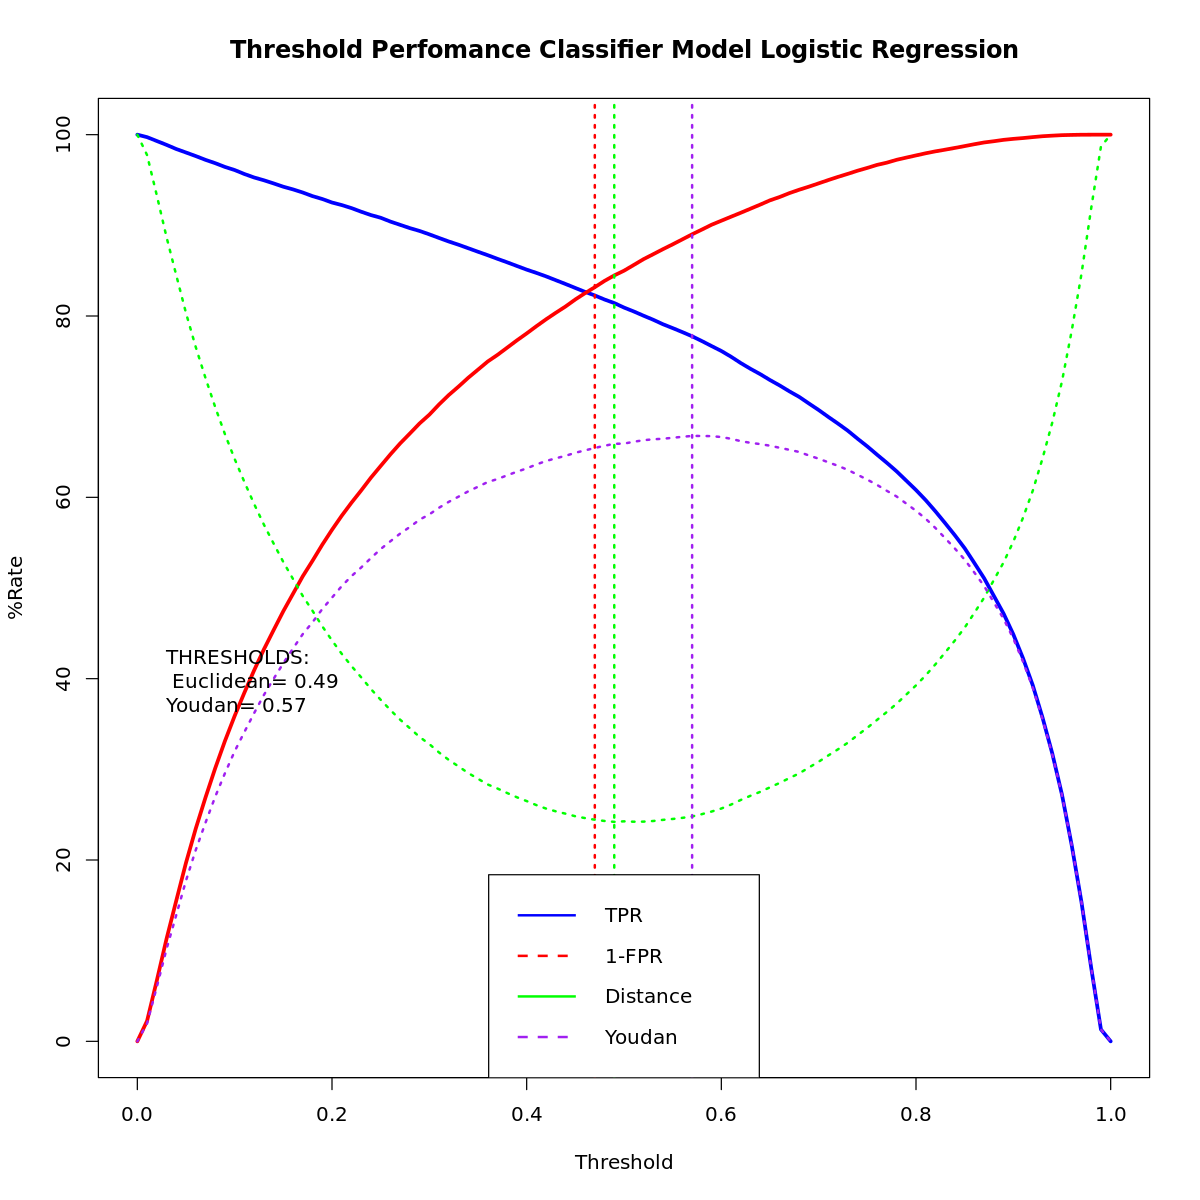

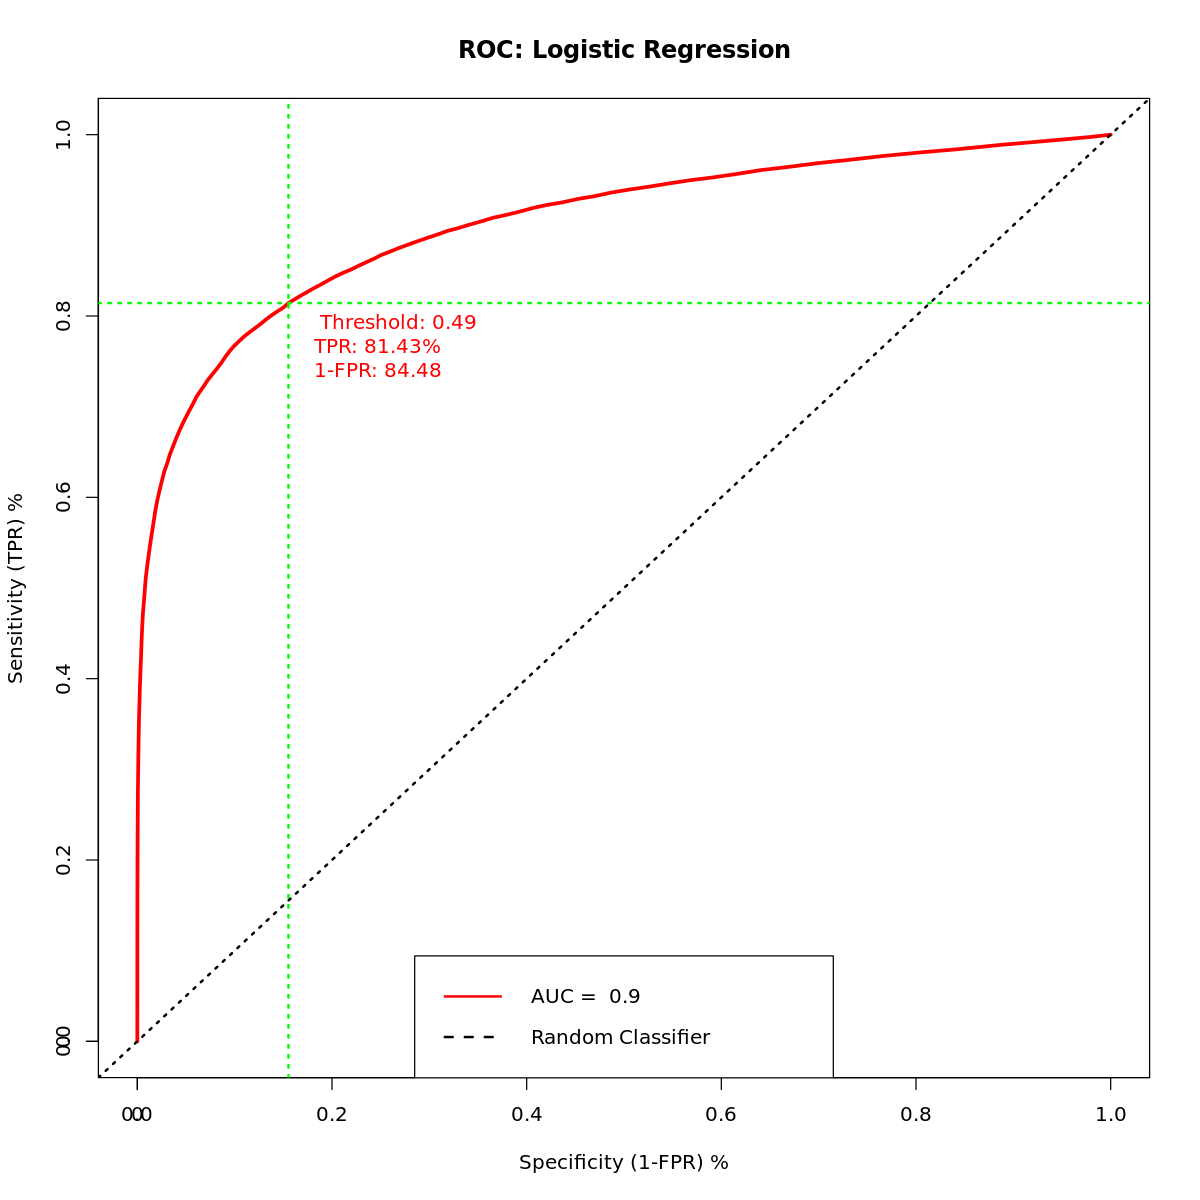

In [56]:
# Train Logistic Model
Lgm<-LogisticRegressionModel(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-Lgm$result

### Visualize Threshold performance plot and ROC curve

#### Threshold performance plot 
The best threshold for a model is detemined from a performance plot to get the maximum of correct prediction after converting a probablitlies to a labels of classes

#### ROC curve
The Roc curve show a performance of a classifer with a area under a curve of value 0.9 on a test dataset


### Logistic Curve 

This show that the suitable threshold is between 0.49-0.51 since the data points represent a satisfied passenger( blue point) seem to be moslty fit on a curve above 0.5 on a Y axis which represent propability. Where on the other hand for neutral or dissatisfied passenger (red point) are more likey to locate below a propabilites of 0.5

[1] "Logistic Plot"


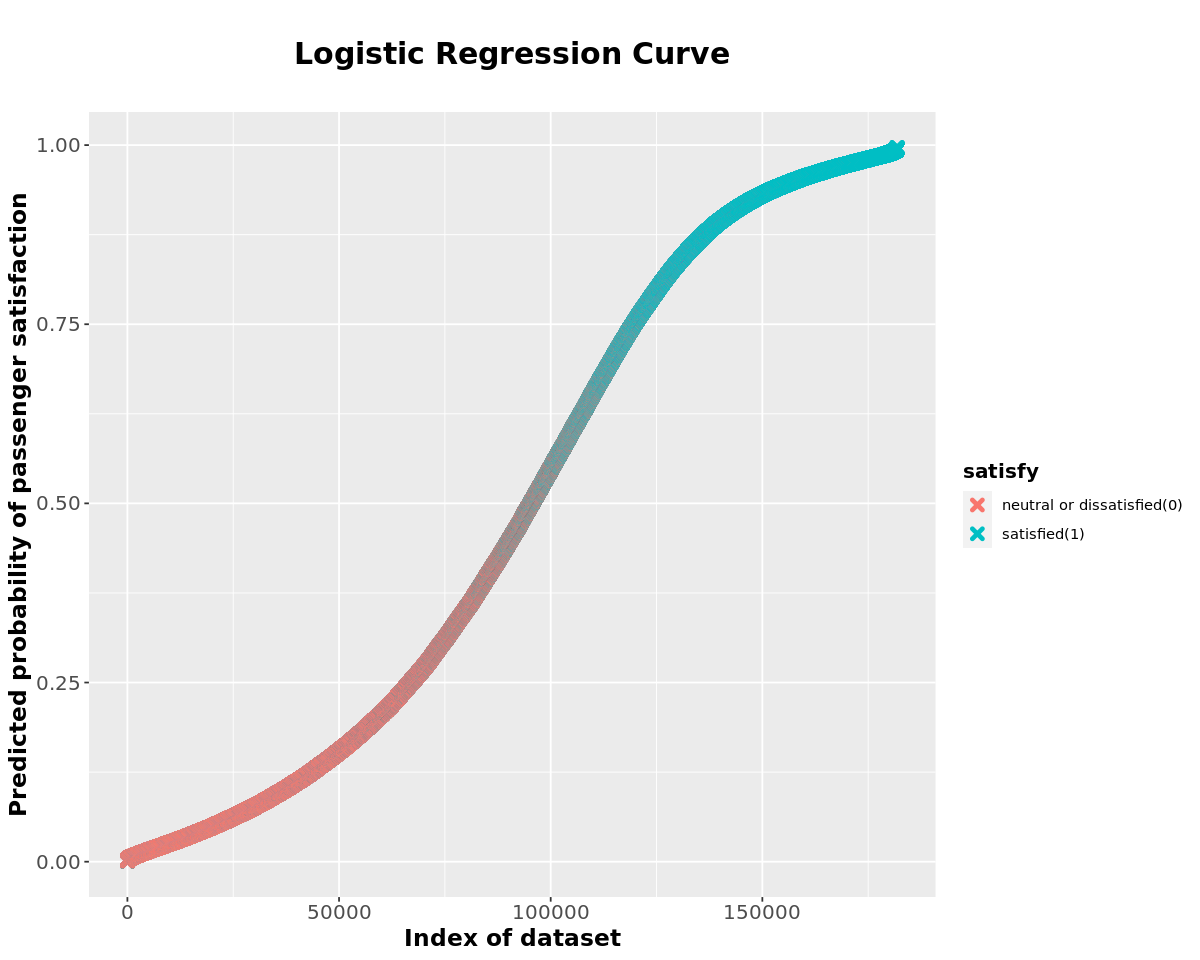

In [57]:
options(repr.plot.width = 10, repr.plot.height = 8)
y_train<-training_data[,OUTPUT_FIELD]
LogisticCurve_plot(Lgm$model,y_train)


### Confusion matrix 

Confusion shows a number of corret prediction ***(True positive for predicting a passenger who is satisfied correctly and True Negative for predict neutral or dissatisfactied correctly)*** and wrong prediction ***( False Positive for predicting passenger that neutral or dissatisfied to be satisfeid and False negative for predicting neutral or dissatisfied as satisfied)***

[1] "ACCURACY :  82.974027307258 , PRECISION:  83.5864798374158 , RECALL:  81.4264874439929 , AUC :  0.902687397003121 F1 score: 82.4923466694817 Loss : 0.392690750739928 Threshold : 0.49"


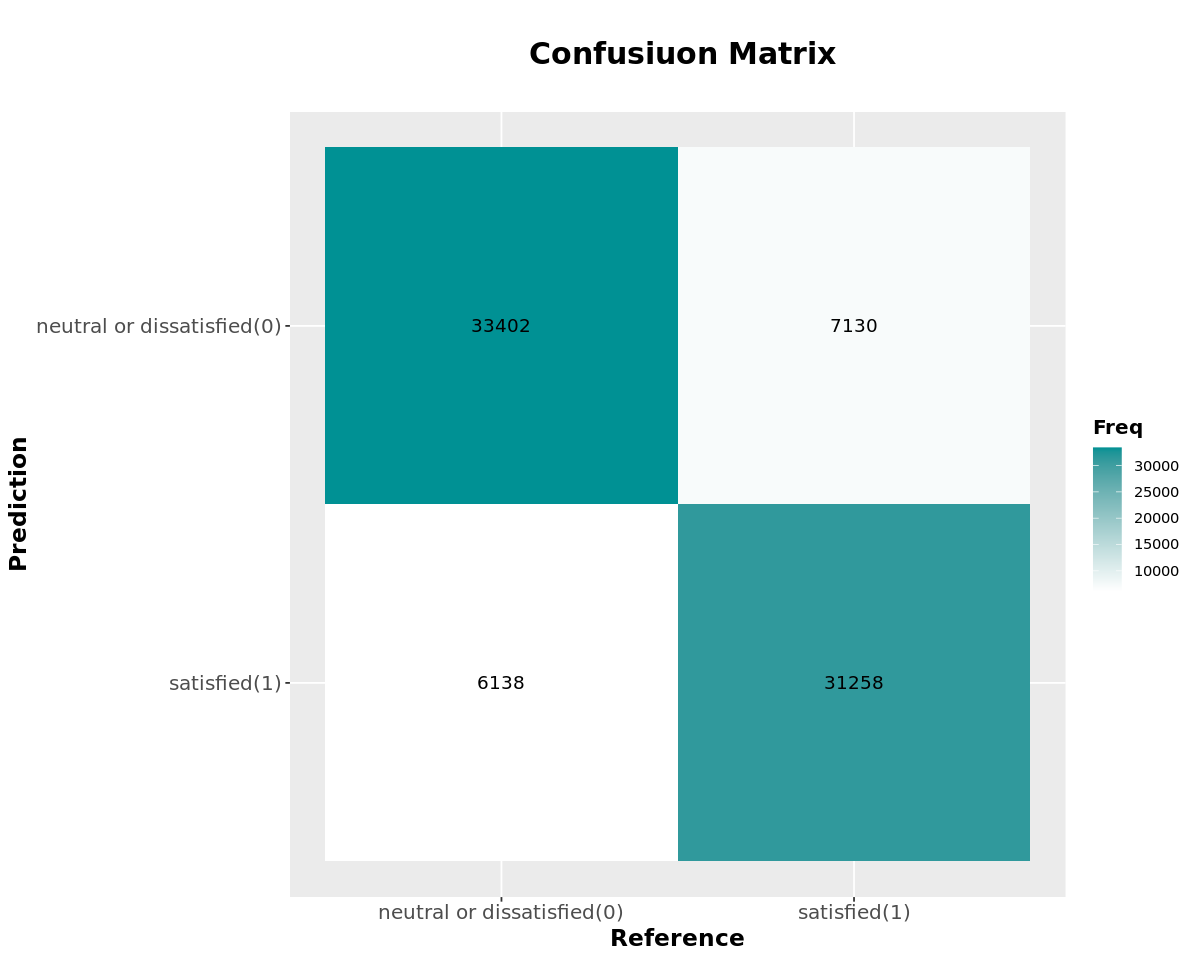

In [58]:
ConfusionMatrix_plot(result$gt,result$pred_labels)
accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba) 
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

The result from Confusion matrix show us that logistic regression show that this model can distinguish between  

### Visualize a coefficient of Logistic Regression

By visualize a value of coefficent or a weight using a bar chart, we can understand which fields of data have an impact on a model for prediciting which passenger is ***satisfied*** and ***neutral or dissatisfied*** 

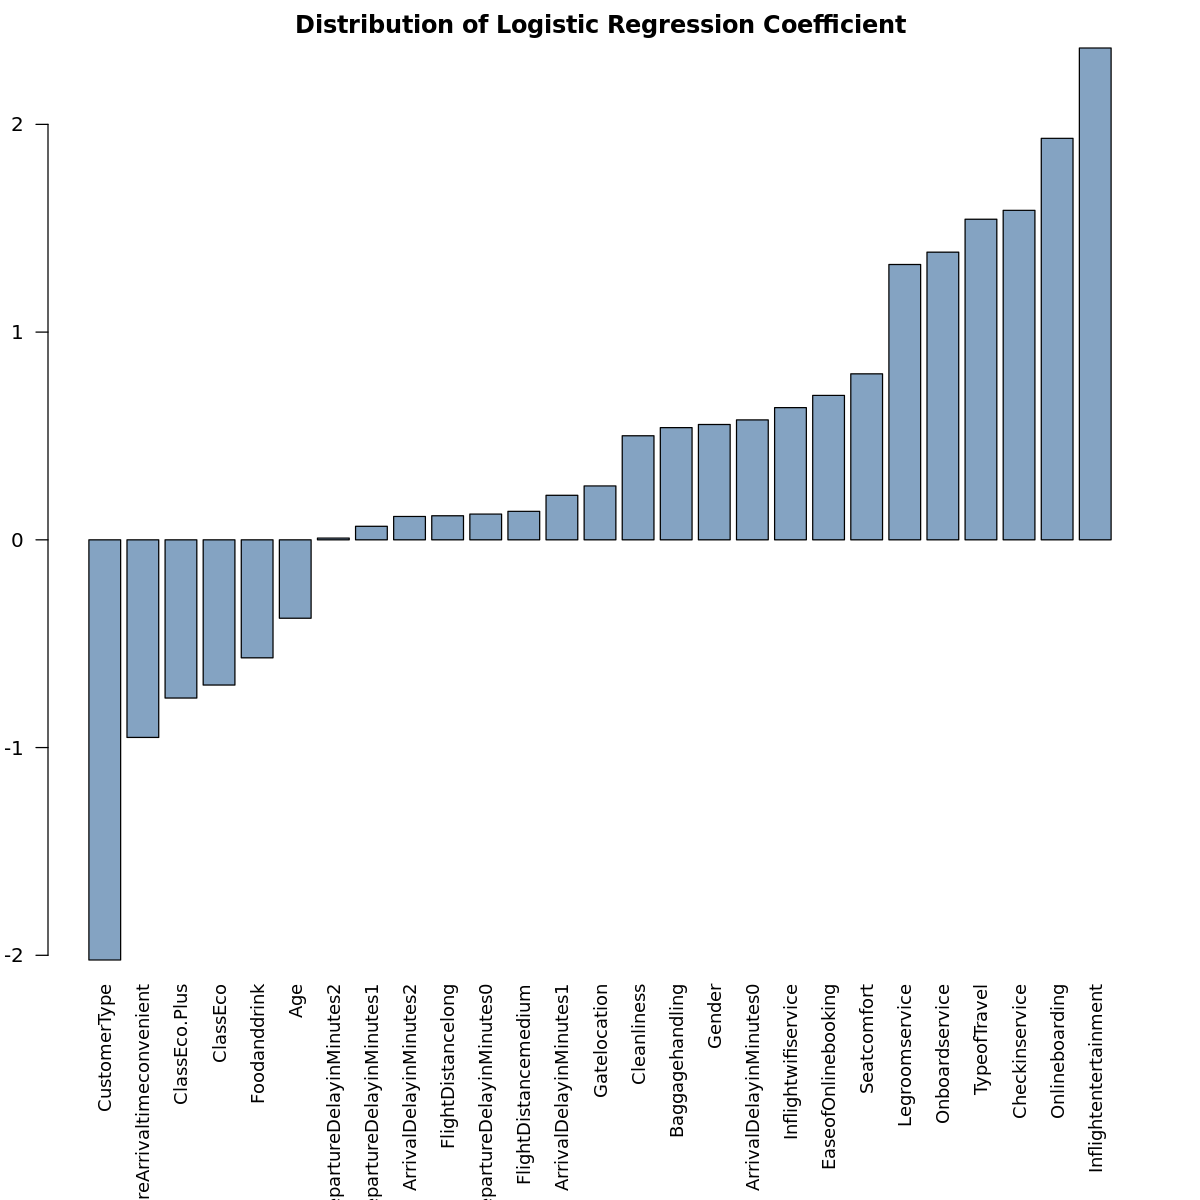

In [59]:
LogisticCoeff_plot(Lgm$model)

The bar chart show that the field with coeffient with neagtive value such as  ***('CustomerType'),('DepatureArrivalTimeconvient'),('Food and Drink') and ('Age')*** have an impact on a model for predicting a customer who is neural or dissatisfied.


And for a field which have clearly an impact on predicting a satisfied passnger are ***('Inflightentertainment'),('Onlineboarding'),('Checkinservice'),('TypeofTravel'),('Onboardservice') and ('legroomservice')*** which have a high value of positive coefficeint. For other fields that have positive value of coefficents such as ("Gatelocation"),("Baggagehandling") and ("Gender") have a very less impact on a model prediction which can be remove to reduce the complexity of a data feeding to a model which is called Dimisionality reduciton.


### Dimesionality reduction

In [60]:
#Selecet Field for Logistic regression

OUTPUT_FIELD = "satisfactionv2"
seed= 123
set.seed(seed)
select_field<-c('satisfactionv2',
              'Gender',
                'CustomerType',
                'TypeofTravel',

                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',

#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
#                 'FlightDistancelong',
#                 'FlightDistancemedium',
#                 'FlightDistanceshort',
#                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
#                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
#                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassEco"                       "ClassEco.Plus"                 
 [7] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [9] "Foodanddrink"                   "Inflightwifiservice"           
[11] "Inflightentertainment"          "EaseofOnlinebooking"           
[13] "Onboardservice"                 "Legroomservice"                
[15] "Baggagehandling"                "Checkinservice"                
[17] "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
182735 0              1      1            1            1        0            
188942 0              0      1            1            0        0            
134058 0              0      0            0            1        0            
124022 1              1      0            1            0        0            
160997 0              0      0            0            1        0            
226318 1              1      0            1            0        0            
       Seatcomfort DepartureArrivaltimeconvenient Foodanddrink
182735 0.8         0.6                            0.8         
188942 0.2         0.8                            1.0         
134058 0.8         0.8                            0.2         
124022 1.0         1.0                            0.8         
160997 1.0         1.0                            1.0         
226318 0.8         0.2                            1.0         
       Inflightwifiservice Inflightentertainment EaseofOnlinebooking
182735 0.6                 0.8                   0.6                
188942 0.8                 1.0                   0.8                
134058 0.2                 0.6                   0.2                
124022 1.0                 1.0                   1.0                
160997 0.6                 1.0                   0.6                
226318 0.2                 0.8                   0.2                
       Onboardservice Legroomservice Baggagehandling Checkinservice
182735 0.4            0.8            0.4             0.6           
188942 0.6            0.6            0.8             0.6           
134058 0.6            0.8            0.8             0.8           
124022 1.0            0.8            1.0             0.4           
160997 0.8            0.8            0.6             0.8           
226318 0.8            0.8            0.8             0.8           
       Onlineboarding
182735 0.6           
188942 0.8           
134058 0.8           
124022 1.0           
160997 0.6           
226318 0.8

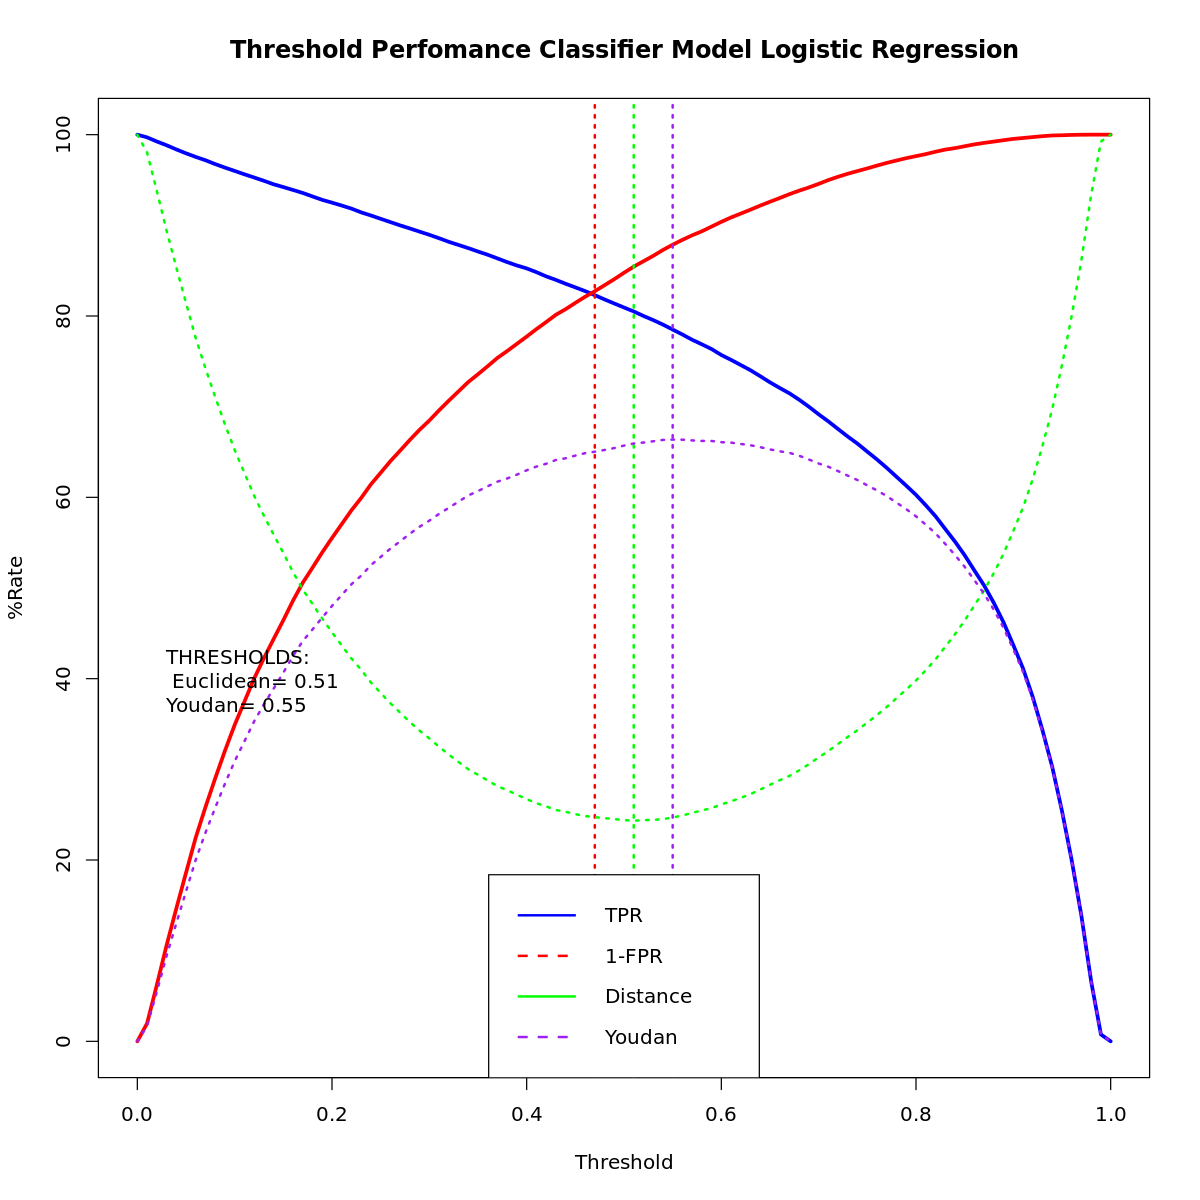

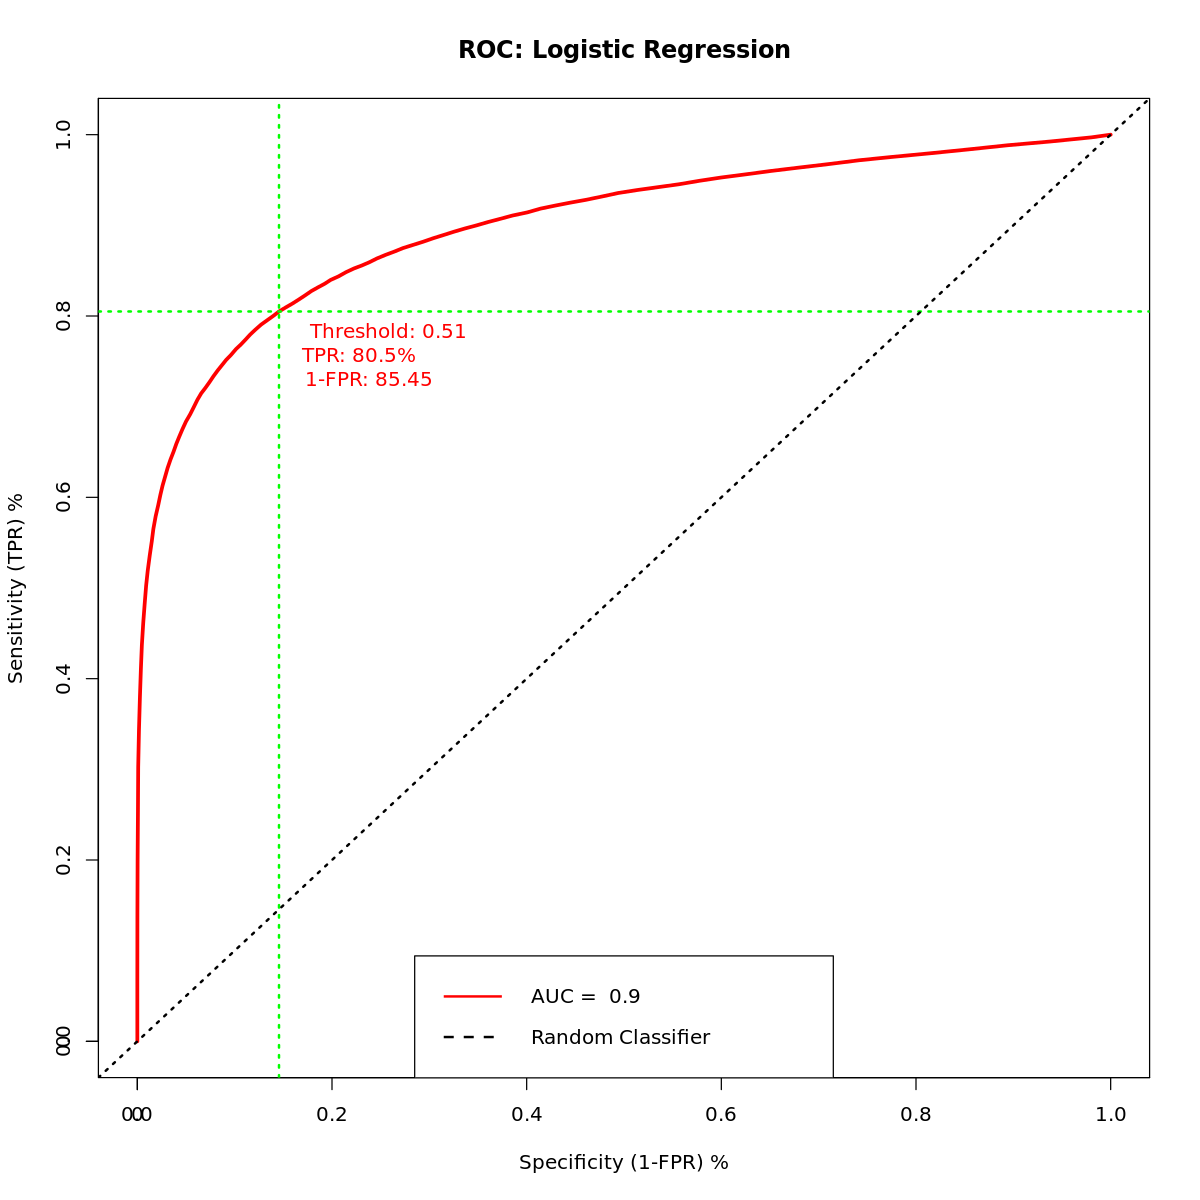

In [61]:
# Train Logistic Model
Lgm<-LogisticRegressionModel(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-Lgm$result

[1] "ACCURACY :  83.0086746740581 , PRECISION:  84.3004064707969 , RECALL:  80.4991143065541 , AUC :  0.900282465820729 F1 score: 82.3559197814645 Loss : 0.398235649933734 Threshold : 0.51"


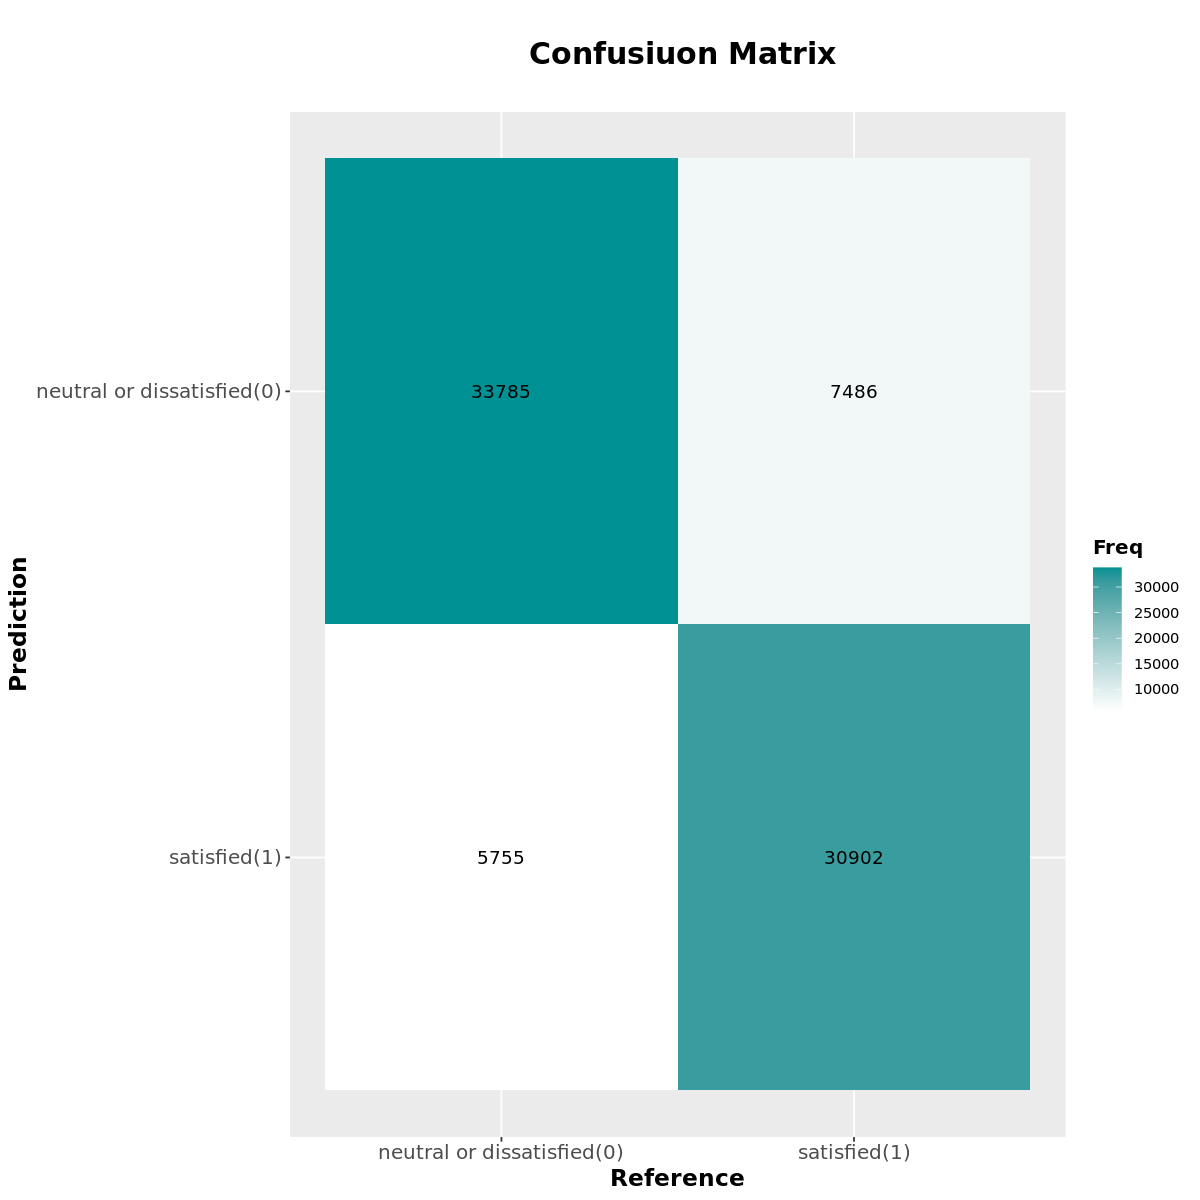

In [62]:
ConfusionMatrix_plot(result$gt,result$pred_labels)
accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba) 
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

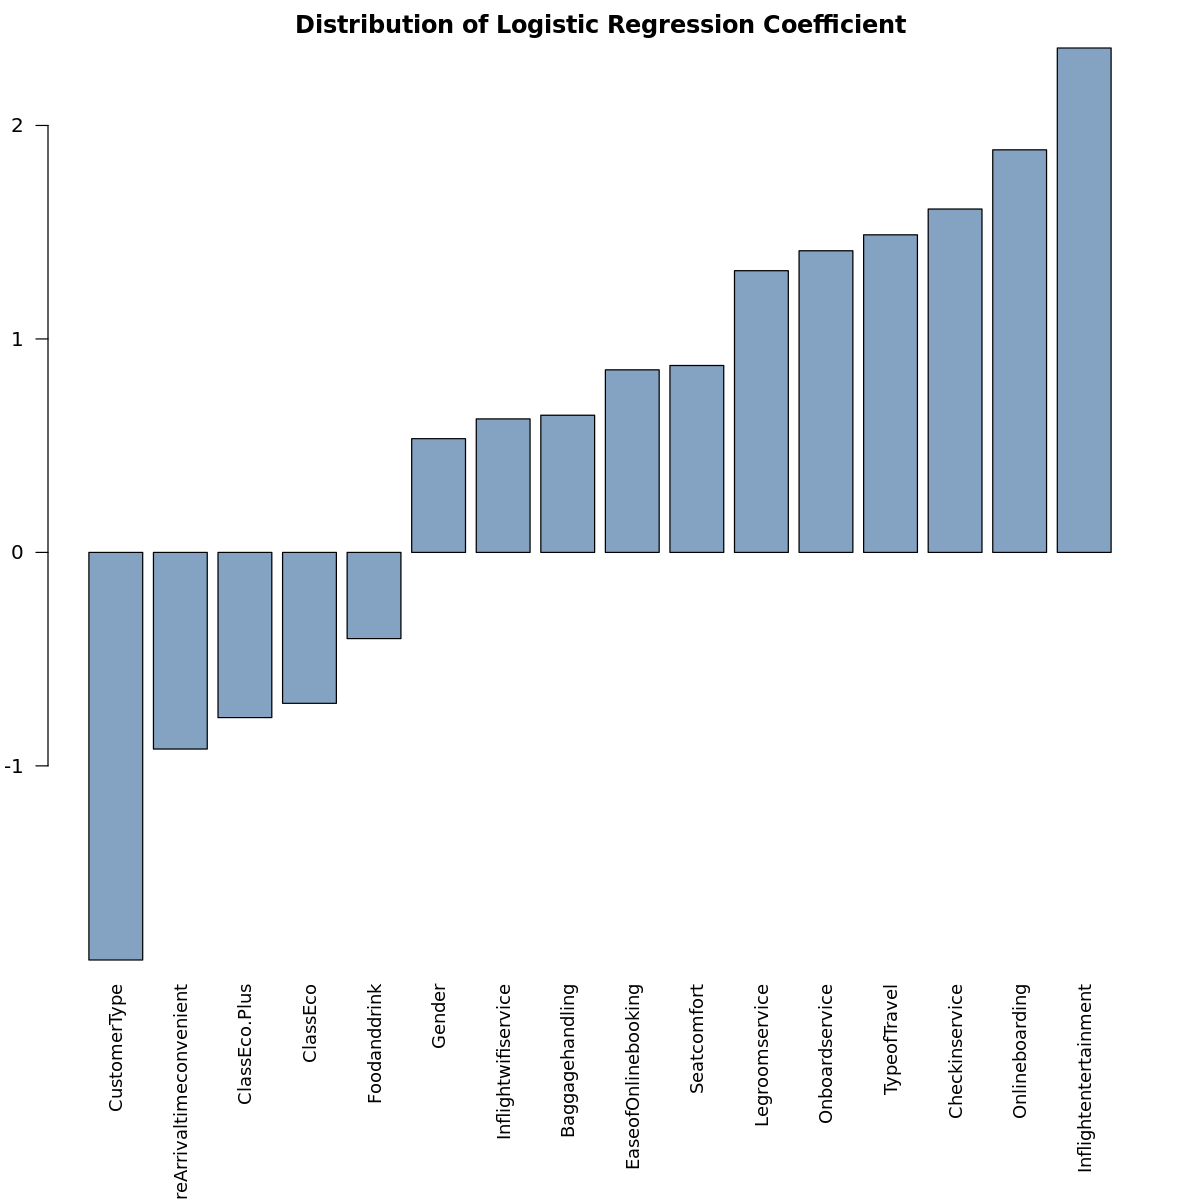

In [63]:
LogisticCoeff_plot(Lgm$model)

In [64]:
# Add result to dataFrame
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-data.frame(LogisticRegression=unlist(df))
allResults

LogisticRegression
TP        3.090200e+04      
FN        7.486000e+03      
FP        5.755000e+03      
TN        3.378500e+04      
F1        8.235592e+01      
acc       8.300867e+01      
pgood     8.430041e+01      
pbad      8.186136e+01      
FPR       1.455488e+01      
TPR       8.049911e+01      
TNR       8.544512e+01      
MCC       6.605291e-01      
threshold 5.100000e-01      
AUC       9.002825e-01

### K-FOLD Cross validation on Logistic regression

To prevent an overfitting during a training, a team decide to experiment a model training wiht K-fold cross validation to ensure the generalization of a model.

In [65]:
# K-FOLD
KFOLDS          <- 10  # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = LogisticRegressionModel)

[1] "FOLD : , 1"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 2"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 3"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 4"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 5"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 6"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 7"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 8"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 9"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 10"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [66]:
# Display a result of a model using K-fold crossvalidation
print("Result of each Fold")
data.frame(fold=(t(measures$allresults)))
print("Average result of each Fold")
t(measures$means)

[1] "Result of each Fold"


fold.1       fold.2       fold.3       fold.4       fold.5      
TP        1.029000e+04 1.029300e+04 1.025200e+04 1.026100e+04 1.039900e+04
FN        2.462000e+03 2.459000e+03 2.500000e+03 2.491000e+03 2.353000e+03
FP        1.803000e+03 1.862000e+03 1.815000e+03 1.831000e+03 2.004000e+03
TN        1.142200e+04 1.136300e+04 1.141000e+04 1.139400e+04 1.122100e+04
F1        8.283357e+01 8.265146e+01 8.261413e+01 8.260345e+01 8.267939e+01
acc       8.358163e+01 8.336605e+01 8.338915e+01 8.336221e+01 8.322747e+01
pgood     8.509055e+01 8.468120e+01 8.495898e+01 8.485776e+01 8.384262e+01
pbad      8.226736e+01 8.220952e+01 8.202732e+01 8.205978e+01 8.266539e+01
FPR       1.363327e+01 1.407940e+01 1.372401e+01 1.384499e+01 1.515312e+01
TPR       8.069322e+01 8.071675e+01 8.039523e+01 8.046581e+01 8.154799e+01
TNR       8.636673e+01 8.592060e+01 8.627599e+01 8.615501e+01 8.484688e+01
MCC       6.720877e-01 6.676392e-01 6.682858e-01 6.676901e-01 6.645142e-01
threshold 5.200000e-01 5.100000e-01 5.200000e-01 5.200000e-01 5.000000e-01
AUC       9.046909e-01 9.015734e-01 9.036265e-01 9.019558e-01 9.044649e-01
          fold.6       fold.7       fold.8       fold.9       fold.10     
TP        1.040800e+04 1.048900e+04 1.031200e+04 1.049200e+04 1.026200e+04
FN        2.343000e+03 2.262000e+03 2.439000e+03 2.259000e+03 2.489000e+03
FP        2.001000e+03 2.132000e+03 1.831000e+03 2.152000e+03 1.853000e+03
TN        1.122300e+04 1.109200e+04 1.139300e+04 1.107200e+04 1.137100e+04
F1        8.273450e+01 8.268170e+01 8.284727e+01 8.263044e+01 8.253841e+01
acc       8.327623e+01 8.308373e+01 8.356112e+01 8.301829e+01 8.328393e+01
pgood     8.387461e+01 8.310752e+01 8.492135e+01 8.298007e+01 8.470491e+01
pbad      8.272888e+01 8.306126e+01 8.236698e+01 8.305453e+01 8.204185e+01
FPR       1.513158e+01 1.612220e+01 1.384604e+01 1.627344e+01 1.401240e+01
TPR       8.162497e+01 8.226021e+01 8.087209e+01 8.228374e+01 8.047996e+01
TNR       8.486842e+01 8.387780e+01 8.615396e+01 8.372656e+01 8.598760e+01
MCC       6.654842e-01 6.615339e-01 6.715706e-01 6.602245e-01 6.660701e-01
threshold 5.000000e-01 4.800000e-01 5.100000e-01 4.800000e-01 5.200000e-01
AUC       9.043099e-01 9.022971e-01 9.044582e-01 9.032176e-01 9.033666e-01

[1] "Average result of each Fold"


TP    FN   FP   TN    F1    acc   pgood pbad  FPR   TPR   TNR   MCC 
[1,] 10345 2405 1928 11296 82.68 83.31 84.3  82.45 14.58 81.13 85.42 0.67
     threshold AUC
[1,] 0.51      0.9

After the training is done, we can visualize at the result of each fold during training. We can see that after applying ***K-fold cross validation***, The number of ***True positive, False positive, True negative and False Negative*** is small than a number in a result of model without ***K-fold cross validation**. This is because when the K-Fold is apply, it divide a dataset smaller number of group depending on the value of K. Hence the number of testing set use for evaluating a result get split into a smaller number of dataset.

But for other metrics such as ***F1 score, Accuracy and Area Under the curve(AUC)*** is very close to the result from model without ***K-Fold***. As a conclusion applying ***K-fold cross-validation*** to logistic regression on passenger statisfaction dataset doesn not result in huge different but it does ensure that the model that trained does generalized well.


In [67]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(Logistic_with_Kfold=unlist(measures$means)))
allResults

LogisticRegression Logistic_with_Kfold
TP        3.090200e+04       10345.00           
FN        7.486000e+03        2405.00           
FP        5.755000e+03        1928.00           
TN        3.378500e+04       11296.00           
F1        8.235592e+01          82.68           
acc       8.300867e+01          83.31           
pgood     8.430041e+01          84.30           
pbad      8.186136e+01          82.45           
FPR       1.455488e+01          14.58           
TPR       8.049911e+01          81.13           
TNR       8.544512e+01          85.42           
MCC       6.605291e-01           0.67           
threshold 5.100000e-01           0.51           
AUC       9.002825e-01           0.90

### Decision Tree

Decsion Tree is a tree based algorithms which doesn't need dataset to be linear seperable. It can handle a data with a missing values and outlier. It can be used in both classification and regression.

It can work well with both linear seperable and non seperable it is suitable for classifying a satifation of customer. Since, passenger dataset contains complex relationshi between each fields such as fields containg rating scale of cutomer in each categories.

In [68]:

# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"
seed= 123
set.seed(seed)
select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
             
                'ClassEco',
                'ClassEco.Plus',
                'DepartureDelayinMinutes0',
                'DepartureDelayinMinutes1',
                'DepartureDelayinMinutes2',
             
                'ArrivalDelayinMinutes0',
                'ArrivalDelayinMinutes1',
                'ArrivalDelayinMinutes2',
                'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

DecisionTree<-function(training_data, testing_data,plot=TRUE,output_field="satisfactionv2"){

# Training data
x_train<-training_data[,names(training_data [-which(names(training_data)%in% output_field)])]
y_train<-training_data[,output_field]
# Testing data
x_test<-testing_data[,names(training_data [-which(names(testing_data)%in% output_field)])]
y_test<-testing_data[,output_field]


DTmodel<-C50::C5.0(x=x_train,
                  y=factor(y_train),
                  ,
                  trials=1)
    
#y_pred<-predict()
    
    
class_proba<-predict(DTmodel, newdata=x_test, type="prob")

# Get the column index with the class label
classIndex<-which(as.numeric(colnames(class_proba))==1)

# Get the probabilities for classifying the satisfaction
y_proba<-class_proba[,classIndex]


title<-'Decision Tree'
results<-NdetermineThreshold(test_expected=y_test,
                                test_predicted=y_proba,
                                plot=plot,
                                title=title)


    
return(list("model" = DTmodel, "result" = results))
}

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassEco"                       "ClassEco.Plus"                 
 [7] "DepartureDelayinMinutes0"       "DepartureDelayinMinutes1"      
 [9] "DepartureDelayinMinutes2"       "ArrivalDelayinMinutes0"        
[11] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[13] "ArrivalDelayinMinutes3"         "Age"                           
[15] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[17] "Foodanddrink"                   "Gatelocation"                  
[19] "Inflightwifiservice"            "Inflightentertainment"         
[21] "EaseofOnlinebooking"            "Onboardservice"                
[23] "Legroomservice"                 "Baggagehandling"               
[25] "Checkinservice"                 "Cleanliness"                   
[27] "Onlineboarding"                
[1] "Number of Trai

satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
182735 0              1      1            1            1        0            
188942 0              0      1            1            0        0            
134058 0              0      0            0            1        0            
124022 1              1      0            1            0        0            
160997 0              0      0            0            1        0            
226318 1              1      0            1            0        0            
       DepartureDelayinMinutes0 DepartureDelayinMinutes1
182735 0                        1                       
188942 1                        0                       
134058 0                        0                       
124022 1                        0                       
160997 0                        1                       
226318 1                        0                       
       DepartureDelayinMinutes2 ArrivalDelayinMinutes0 ⋯ Gatelocation
182735 0                        0                      ⋯ 0.4         
188942 0                        1                      ⋯ 0.4         
134058 0                        1                      ⋯ 0.4         
124022 0                        1                      ⋯ 1.0         
160997 0                        0                      ⋯ 0.8         
226318 0                        0                      ⋯ 0.2         
       Inflightwifiservice Inflightentertainment EaseofOnlinebooking
182735 0.6                 0.8                   0.6                
188942 0.8                 1.0                   0.8                
134058 0.2                 0.6                   0.2                
124022 1.0                 1.0                   1.0                
160997 0.6                 1.0                   0.6                
226318 0.2                 0.8                   0.2                
       Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
182735 0.4            0.8            0.4             0.6            0.8        
188942 0.6            0.6            0.8             0.6            1.0        
134058 0.6            0.8            0.8             0.8            0.8        
124022 1.0            0.8            1.0             0.4            0.2        
160997 0.8            0.8            0.6             0.8            1.0        
226318 0.8            0.8            0.8             0.8            0.8        
       Onlineboarding
182735 0.6           
188942 0.8           
134058 0.8           
124022 1.0           
160997 0.6           
226318 0.8

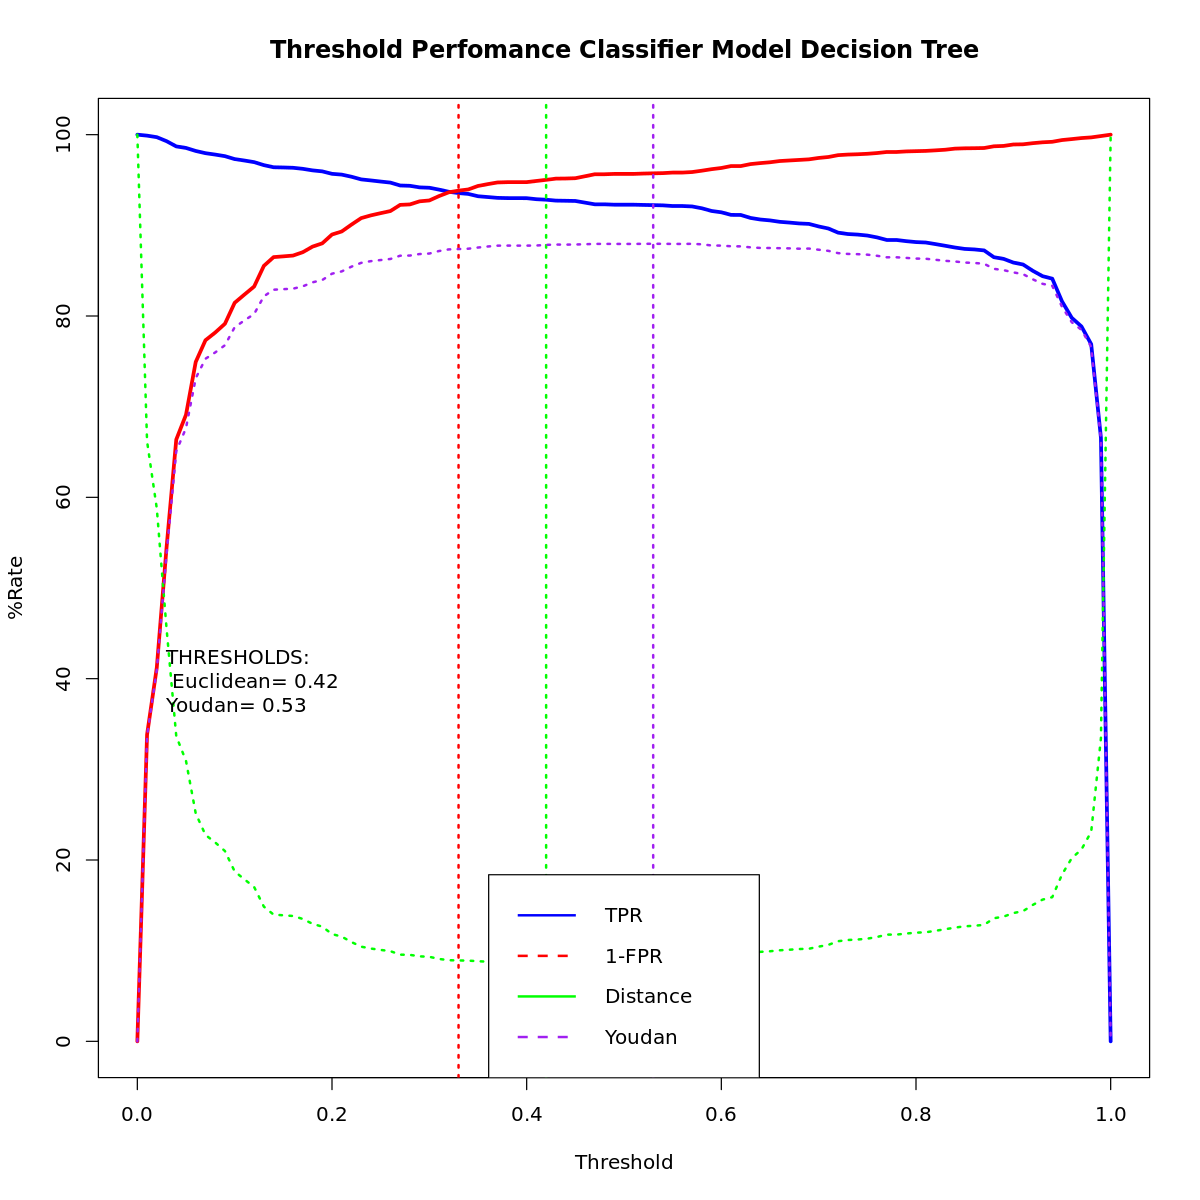

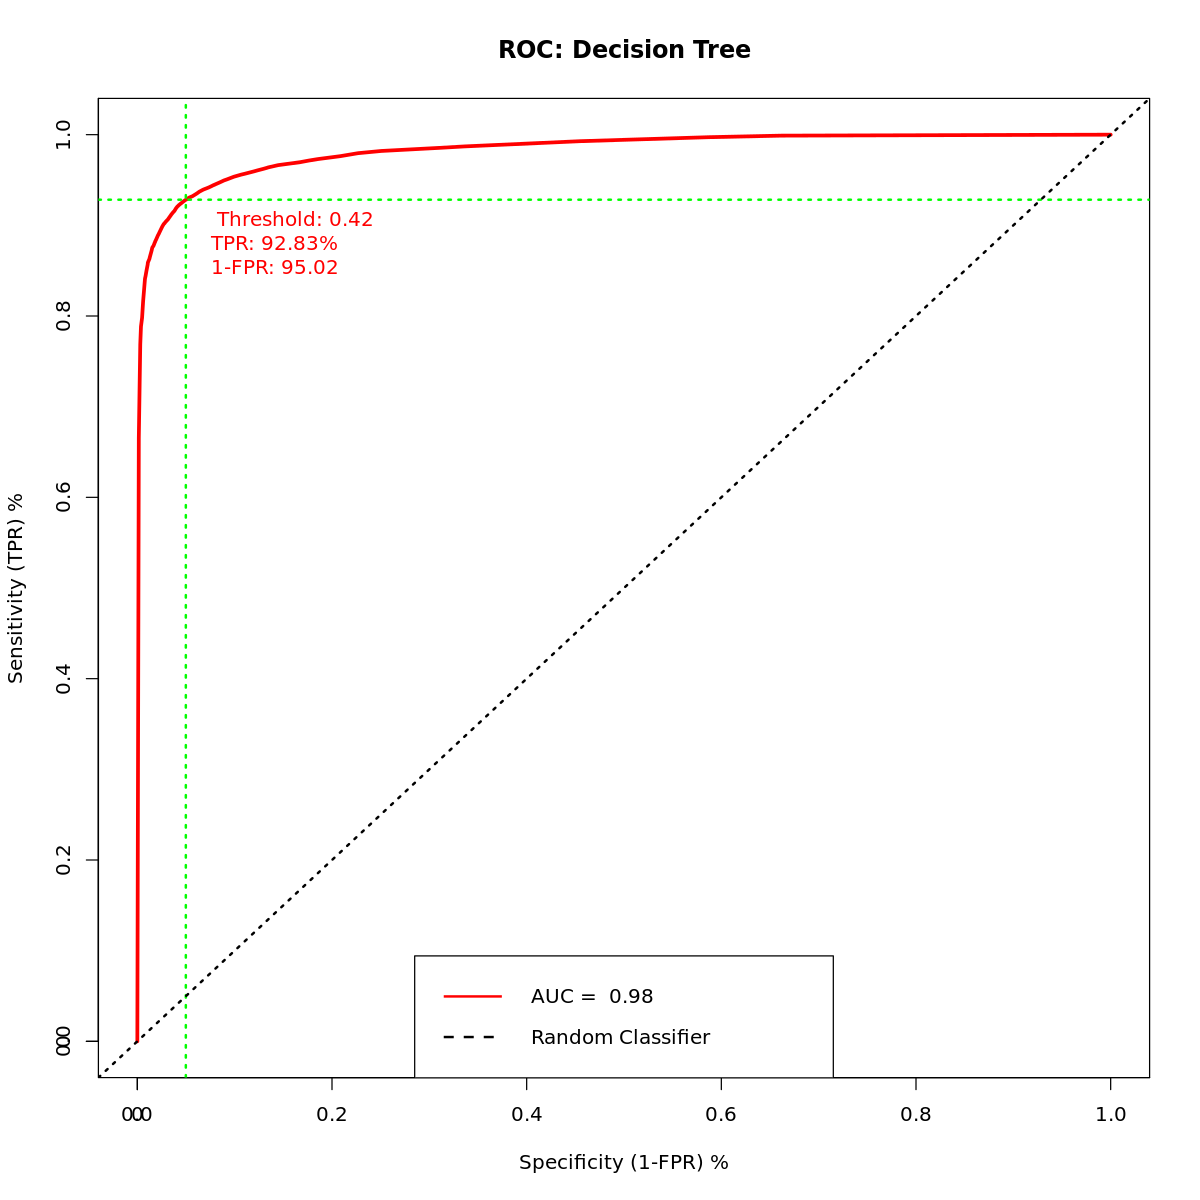

In [69]:
DT<-DecisionTree(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-DT$result


### Visualize Threshold performance plot and ROC curve

#### Threshold performance plot
The best threshold for a model is detemined from a performance plot to get the maximum of correct prediction after converting a probablitlies to a labels of classes at threshold value of 0.43

#### ROC curve
The Roc curve show a performance of a classifer with a area under a curve of value 0.98 on a test dataset which is much higer compare to the area under curve of logistic regression. Also values of specificty is lower and sensitivity is higher than logistic regression


[1] "ACCURACY :  93.9379940457859 , PRECISION:  94.7611956174875 , RECALL:  92.8258830884651 , AUC :  0.982977647394342 F1 score: 93.7835561638067 Loss : 0.159224110765153 Threshold : 0.42"


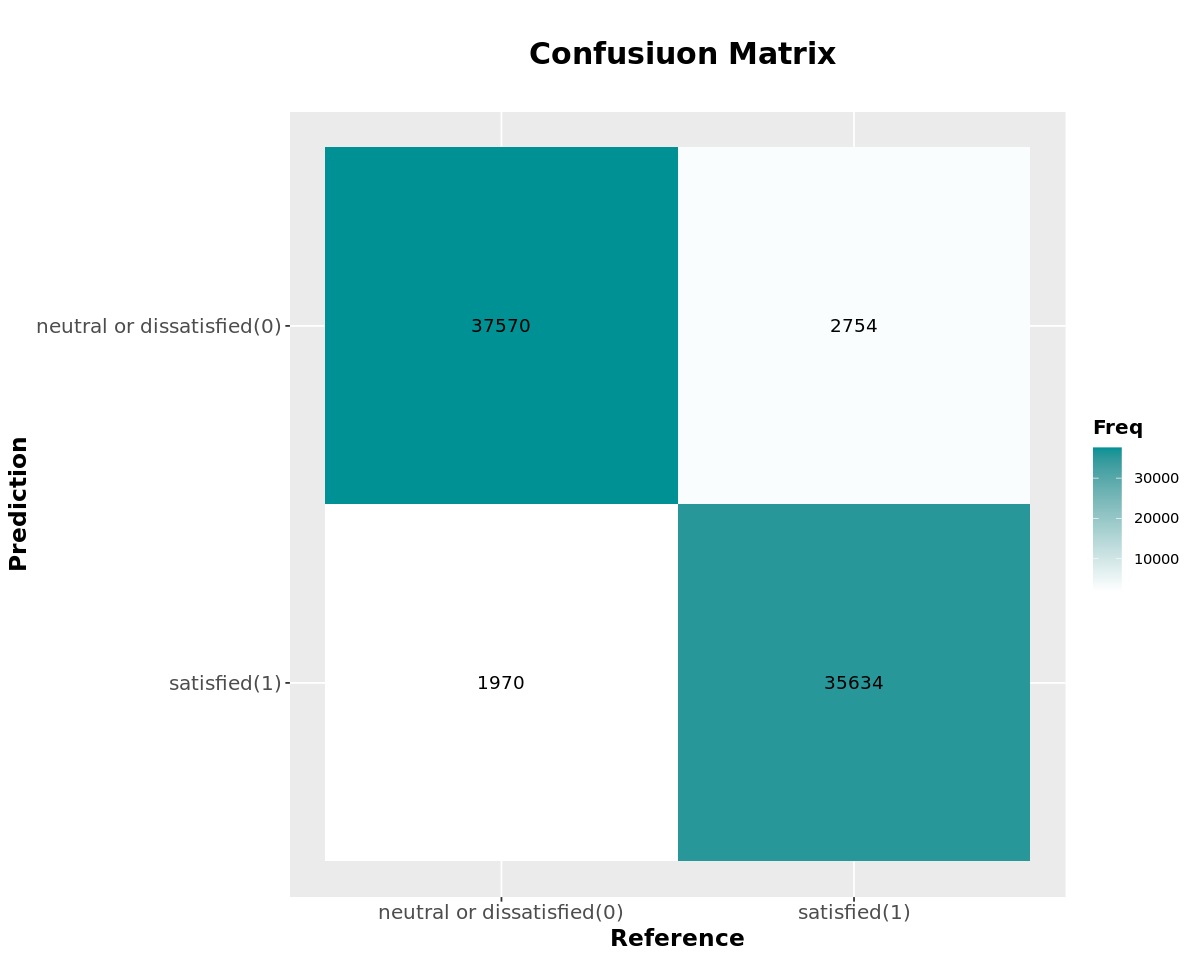

In [70]:
options(repr.plot.width = 10, repr.plot.height = 8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
             "Threshold :", threshold))

The confusion matrix of Decision Tree clearly shown a different of number in of correct and incorrect prediction simialr to logistice regression but with huge different in number of False Negative. 

The Final accuracy for Decison Tree model is 94 % which is very high compare to logistice regression. These proves that passenger dataset contains a complex relationship between each field, the information in dataset tends to non-linear seperable which is the reason why tree based model outperform liner classifier like logistic regression

#### Importance Variable (Fields) in Decison Tree

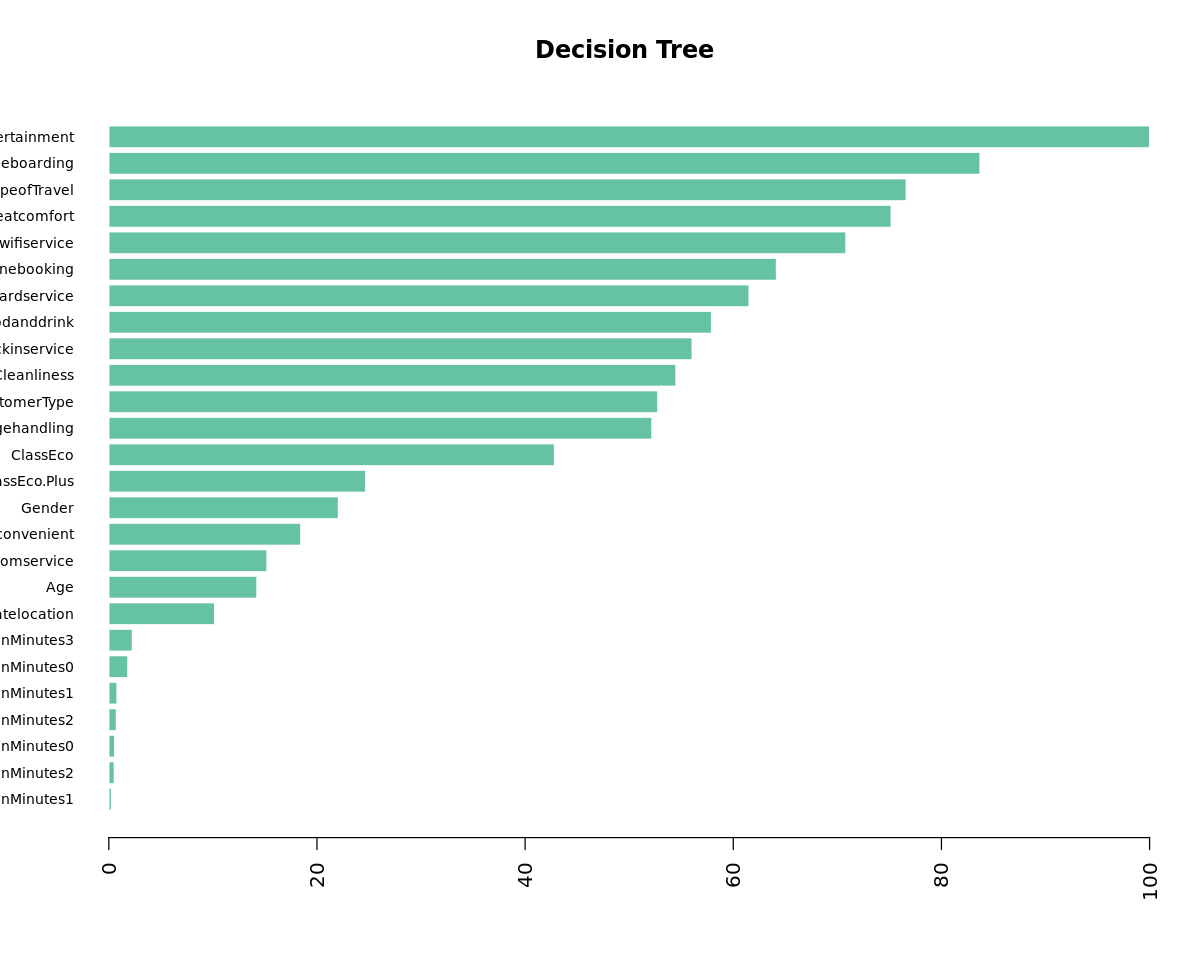

In [71]:
TreeCoeff_plot(DT$model)

### Dimensionality Reduction 

In [72]:
# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"
seed= 123
set.seed(seed)
select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
             
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
             
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
#                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                 'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)


[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassEco"                       "ClassEco.Plus"                 
 [7] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [9] "Foodanddrink"                   "Gatelocation"                  
[11] "Inflightwifiservice"            "Inflightentertainment"         
[13] "EaseofOnlinebooking"            "Onboardservice"                
[15] "Legroomservice"                 "Baggagehandling"               
[17] "Checkinservice"                 "Cleanliness"                   
[19] "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
182735 0              1      1            1            1        0            
188942 0              0      1            1            0        0            
134058 0              0      0            0            1        0            
124022 1              1      0            1            0        0            
160997 0              0      0            0            1        0            
226318 1              1      0            1            0        0            
       Seatcomfort DepartureArrivaltimeconvenient Foodanddrink Gatelocation
182735 0.8         0.6                            0.8          0.4         
188942 0.2         0.8                            1.0          0.4         
134058 0.8         0.8                            0.2          0.4         
124022 1.0         1.0                            0.8          1.0         
160997 1.0         1.0                            1.0          0.8         
226318 0.8         0.2                            1.0          0.2         
       Inflightwifiservice Inflightentertainment EaseofOnlinebooking
182735 0.6                 0.8                   0.6                
188942 0.8                 1.0                   0.8                
134058 0.2                 0.6                   0.2                
124022 1.0                 1.0                   1.0                
160997 0.6                 1.0                   0.6                
226318 0.2                 0.8                   0.2                
       Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
182735 0.4            0.8            0.4             0.6            0.8        
188942 0.6            0.6            0.8             0.6            1.0        
134058 0.6            0.8            0.8             0.8            0.8        
124022 1.0            0.8            1.0             0.4            0.2        
160997 0.8            0.8            0.6             0.8            1.0        
226318 0.8            0.8            0.8             0.8            0.8        
       Onlineboarding
182735 0.6           
188942 0.8           
134058 0.8           
124022 1.0           
160997 0.6           
226318 0.8

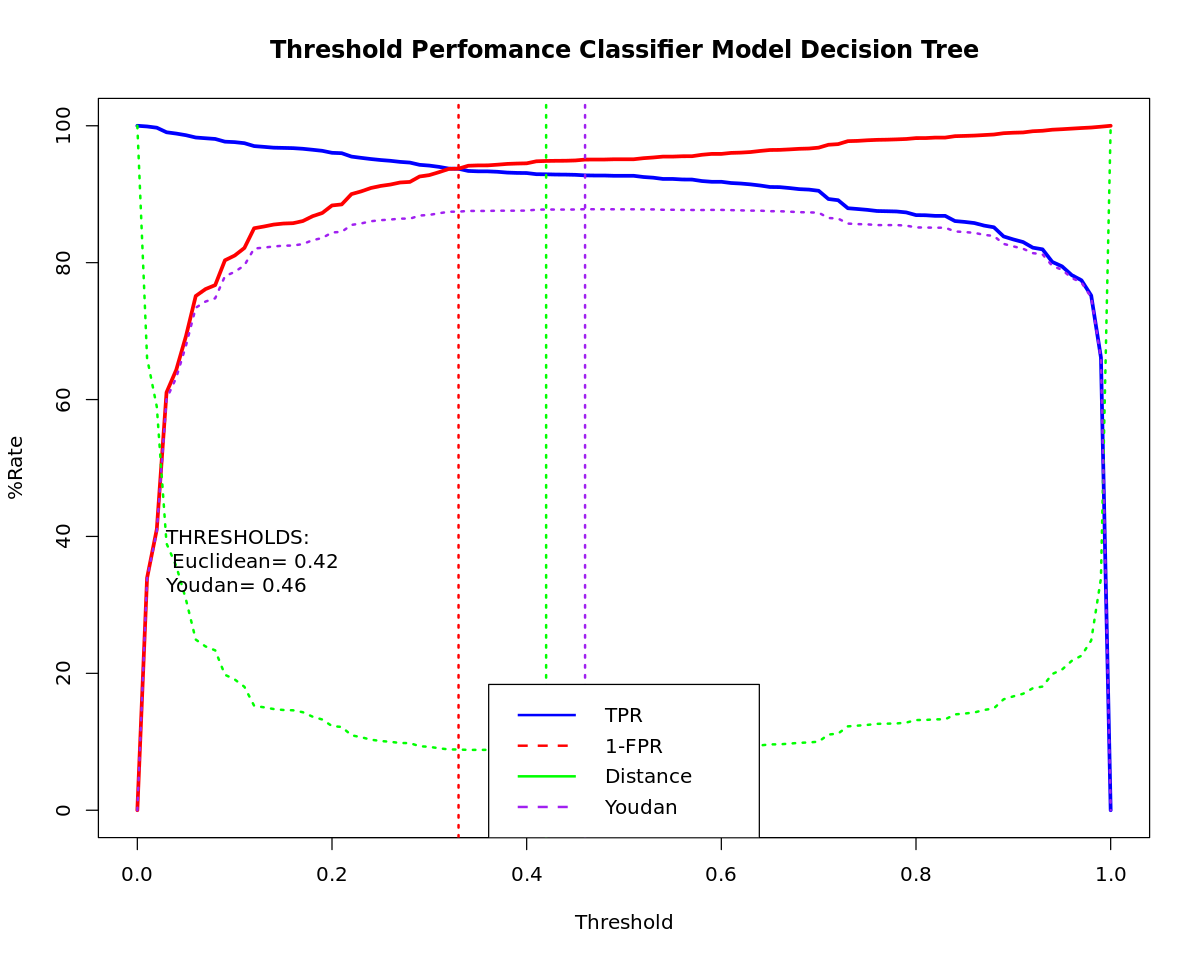

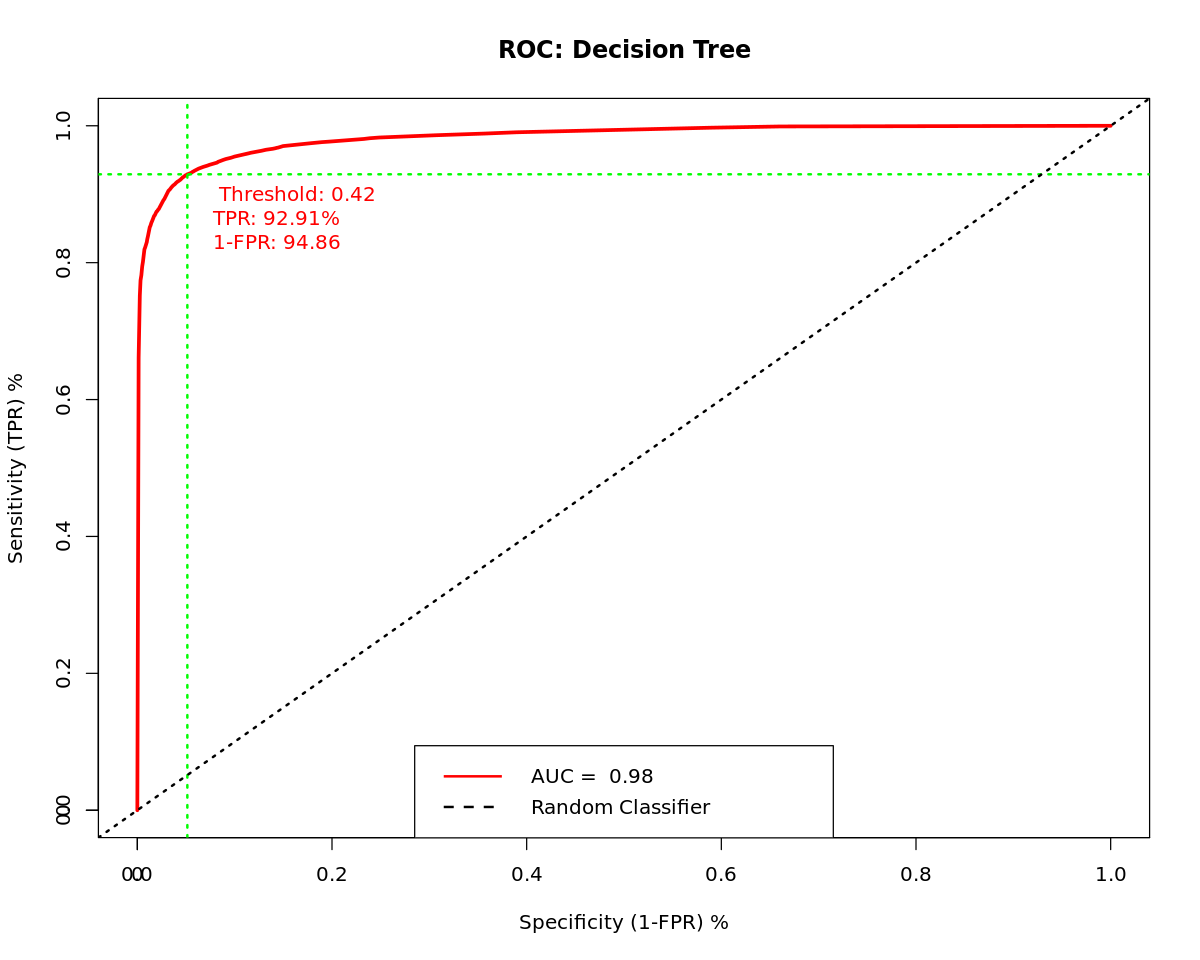

In [73]:
DT<-DecisionTree(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-DT$result

[1] "ACCURACY :  93.9007802073709 , PRECISION:  94.6099366030929 , RECALL:  92.9118474523289 , AUC :  0.983088001664342 F1 score: 93.753203569598 Loss : 0.159883970190253 Threshold : 0.42"


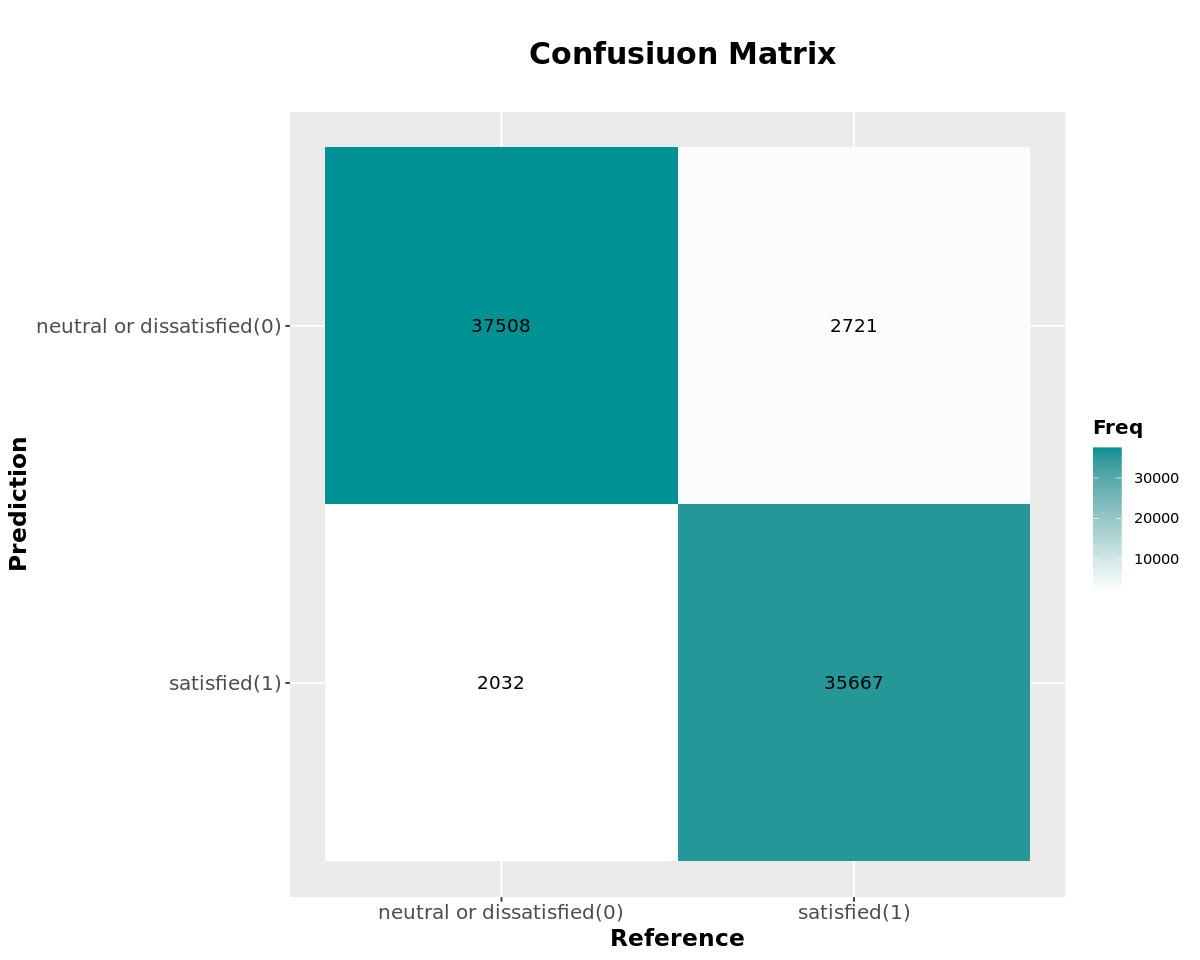

In [74]:
options(repr.plot.width = 10, repr.plot.height = 8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
             "Threshold :", threshold))

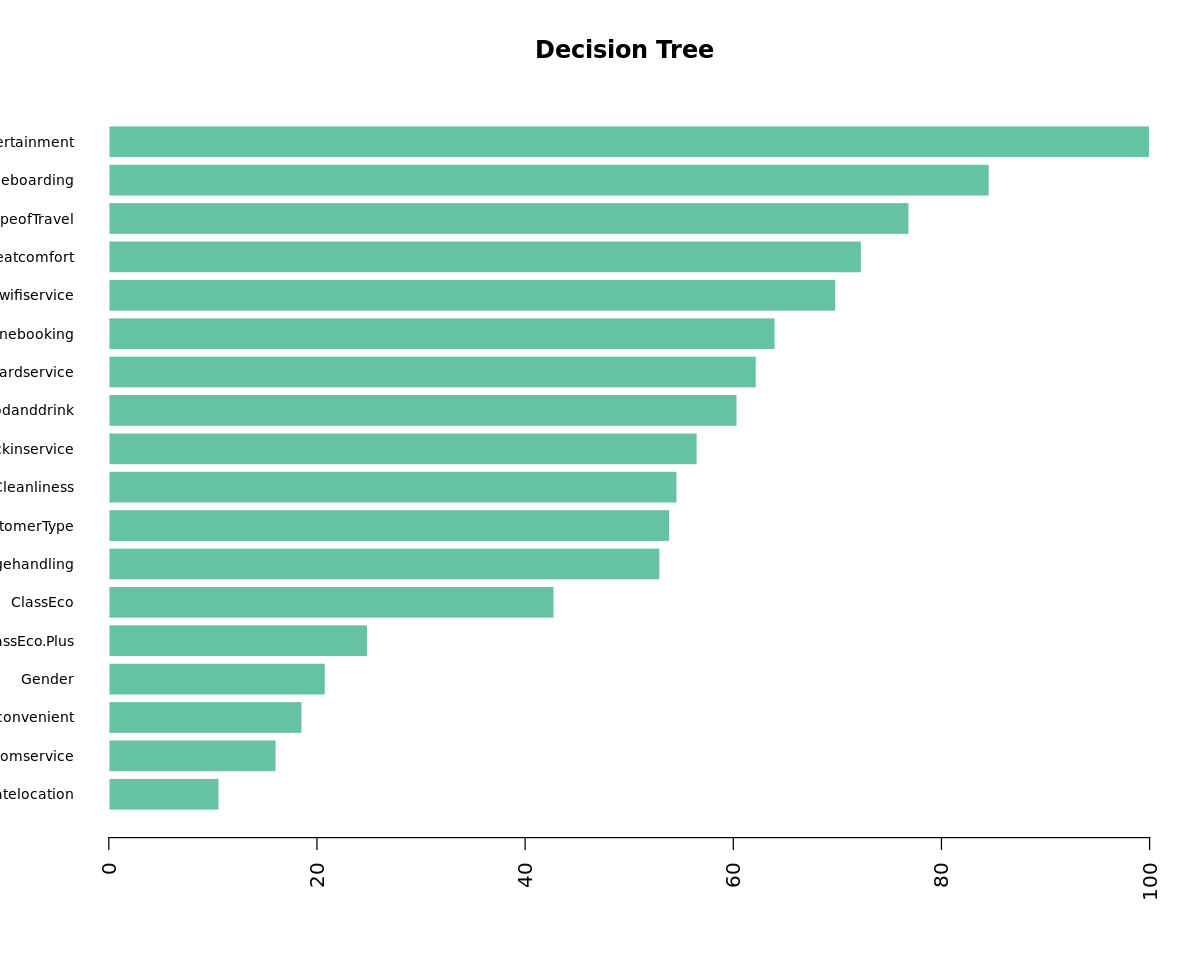

In [75]:
TreeCoeff_plot(DT$model)

In [76]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(DecisionTree=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01

### Decision Tree with K-Fold Cross Validation

In [77]:
KFOLDS <- 10  # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = DecisionTree)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"
[1] "FOLD : , 7"
[1] "FOLD : , 8"
[1] "FOLD : , 9"
[1] "FOLD : , 10"


In [78]:
data.frame(t(measures$allresults))

data.frame(measures$means)

X1           X2           X3           X4           X5          
TP        1.200800e+04 1.191600e+04 1.194100e+04 1.194500e+04 1.192600e+04
FN        7.440000e+02 8.360000e+02 8.110000e+02 8.070000e+02 8.260000e+02
FP        6.570000e+02 6.080000e+02 6.140000e+02 6.410000e+02 6.420000e+02
TN        1.256800e+04 1.261700e+04 1.261100e+04 1.258400e+04 1.258300e+04
F1        9.448794e+01 9.428707e+01 9.436915e+01 9.428526e+01 9.420221e+01
acc       9.460677e+01 9.444124e+01 9.451438e+01 9.442584e+01 9.434885e+01
pgood     9.481248e+01 9.514532e+01 9.510952e+01 9.490704e+01 9.489179e+01
pbad      9.441106e+01 9.378577e+01 9.395768e+01 9.397356e+01 9.383996e+01
FPR       4.967864e+00 4.597353e+00 4.642722e+00 4.846881e+00 4.854442e+00
TPR       9.416562e+01 9.344417e+01 9.364021e+01 9.367158e+01 9.352258e+01
TNR       9.503214e+01 9.540265e+01 9.535728e+01 9.515312e+01 9.514556e+01
MCC       8.921064e-01 8.888894e-01 8.903234e-01 8.885265e-01 8.869994e-01
threshold 3.400000e-01 4.000000e-01 3.700000e-01 4.000000e-01 3.800000e-01
AUC       9.866436e-01 9.859242e-01 9.862077e-01 9.853778e-01 9.852447e-01
          X6           X7           X8           X9           X10         
TP        1.196300e+04 1.196500e+04 1.191300e+04 1.191200e+04 1.191500e+04
FN        7.880000e+02 7.860000e+02 8.380000e+02 8.390000e+02 8.360000e+02
FP        6.390000e+02 6.490000e+02 5.880000e+02 6.290000e+02 6.430000e+02
TN        1.258500e+04 1.257500e+04 1.263600e+04 1.259500e+04 1.258100e+04
F1        9.437147e+01 9.434260e+01 9.435292e+01 9.419579e+01 9.415623e+01
acc       9.450626e+01 9.447546e+01 9.451011e+01 9.434841e+01 9.430606e+01
pgood     9.492938e+01 9.485492e+01 9.529638e+01 9.498445e+01 9.487976e+01
pbad      9.410753e+01 9.411721e+01 9.378061e+01 9.375465e+01 9.376910e+01
FPR       4.832123e+00 4.907743e+00 4.446461e+00 4.756503e+00 4.862371e+00
TPR       9.382009e+01 9.383578e+01 9.342797e+01 9.342012e+01 9.344365e+01
TNR       9.516788e+01 9.509226e+01 9.555354e+01 9.524350e+01 9.513763e+01
MCC       8.901243e-01 8.895008e-01 8.902924e-01 8.870135e-01 8.861506e-01
threshold 3.600000e-01 3.500000e-01 4.100000e-01 3.900000e-01 3.500000e-01
AUC       9.856918e-01 9.860954e-01 9.862259e-01 9.856574e-01 9.850677e-01

TP    FN  FP  TN    F1    acc   pgood pbad  FPR  TPR   TNR   MCC  threshold
1 11940 811 631 12593 94.31 94.45 94.98 93.95 4.77 93.64 95.23 0.89 0.38     
  AUC 
1 0.99

In [79]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(DecisionTree_with_Kfold=unlist(measures$means)))
allResults


LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold
TP        11940.00               
FN          811.00               
FP          631.00               
TN        12593.00               
F1           94.31               
acc          94.45               
pgood        94.98               
pbad         93.95               
FPR           4.77               
TPR          93.64               
TNR          95.23               
MCC           0.89               
threshold     0.38               
AUC           0.99

In [80]:
#Clear cache prevent kernel kill
ls()
rm(list=setdiff(ls(),c("processed_data","DecisionTree","allResults","training_data","testing_data","OUTPUT_FIELD","combined")))
source('utils.R')
ls()

[1] "accuracy"                "allocateFoldID"         
 [3] "allResults"              "auc"                    
 [5] "auroc"                   "BCE_loss"               
 [7] "combined"                "ConfusionMatrix_plot"   
 [9] "dataset"                 "DecisionTree"           
[11] "df"                      "DT"                     
[13] "eval_model"              "f1_score"               
[15] "F1_score"                "ForestCoeff_plot"       
[17] "KFOLDS"                  "Lgm"                    
[19] "LogisticCoeff_plot"      "LogisticCurve_plot"     
[21] "LogisticRegressionModel" "loss"                   
[23] "measures"                "myModelFormula"         
[25] "NConvertClass"           "NdetermineThreshold"    
[27] "OUTPUT_FIELD"            "precision"              
[29] "processed_data"          "recall"                 
[31] "result"                  "runExperiment"          
[33] "seed"                    "select_field"           
[35] "selected_data"           "stratifiedDataset"      
[37] "stratifiedSplit"         "testing_data"           
[39] "threshold"               "training_data"          
[41] "training_records"        "TreeCoeff_plot"         
[43] "y_train"

[1] "allocateFoldID"       "allResults"           "auroc"               
 [4] "BCE_loss"             "combined"             "ConfusionMatrix_plot"
 [7] "DecisionTree"         "eval_model"           "F1_score"            
[10] "ForestCoeff_plot"     "LogisticCoeff_plot"   "LogisticCurve_plot"  
[13] "NConvertClass"        "NdetermineThreshold"  "OUTPUT_FIELD"        
[16] "processed_data"       "runExperiment"        "stratifiedDataset"   
[19] "stratifiedSplit"      "testing_data"         "training_data"       
[22] "TreeCoeff_plot"

## Decision Tree on unclean dataset

In [81]:
OUTPUT_FIELD = "satisfactionv2"
source('utils.R')
selected_data<-NConvertClass(combined,OUTPUT_FIELD)

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType      Age TypeofTravel    Class   
155588 1              Male   Loyal Customer     8  Personal Travel Eco     
82413  1              Male   Loyal Customer    47  Business travel Eco     
159898 1              Female Loyal Customer    37  Personal Travel Eco     
42849  1              Female disloyal Customer 40  Business travel Business
42621  1              Female disloyal Customer 35  Business travel Eco     
52678  1              Female disloyal Customer 49  Business travel Business
       FlightDistance Seatcomfort DepartureArrivaltimeconvenient Foodanddrink ⋯
155588  334           5           4                              5            ⋯
82413  1952           3           3                              3            ⋯
159898  247           3           5                              3            ⋯
42849  1511           1           1                              1            ⋯
42621  2358           1           1                              1            ⋯
52678  1550           3           3                              3            ⋯
       EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
155588 3                   5              3              5              
82413  3                   4              1              4              
159898 3                   5              5              4              
42849  1                   2              3              4              
42621  5                   4              2              3              
52678  4                   3              5              4              
       Checkinservice Cleanliness Onlineboarding DepartureDelayinMinutes
155588 5              5           3              2                      
82413  2              4           3              0                      
159898 3              3           3              0                      
42849  1              3           1              0                      
42621  2              3           5              0                      
52678  4              5           4              0                      
       ArrivalDelayinMinutes Inflightservice
155588 0                      5             
82413  0                     NA             
159898 0                      4             
42849  0                     NA             
42621  0                     NA             
52678  0                     NA

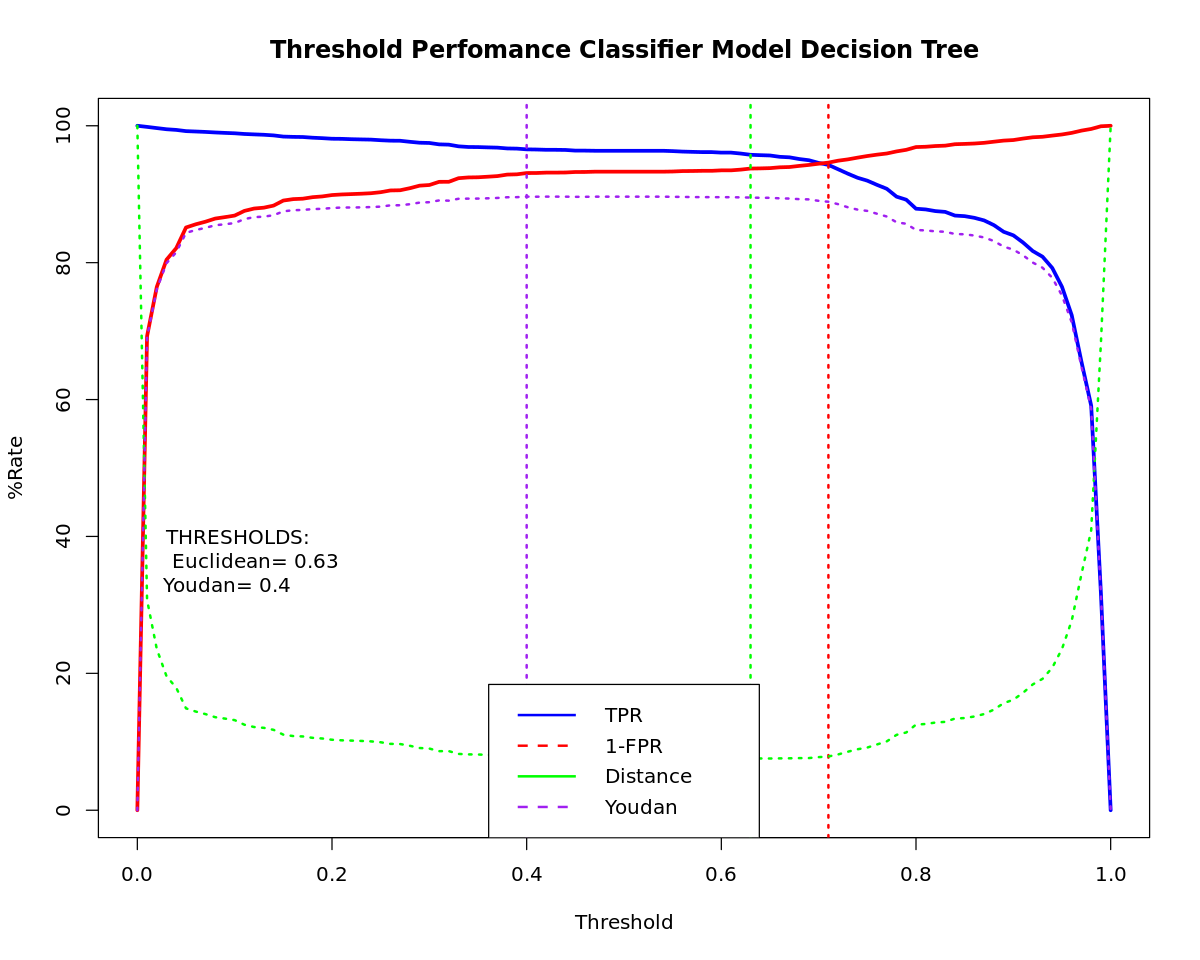

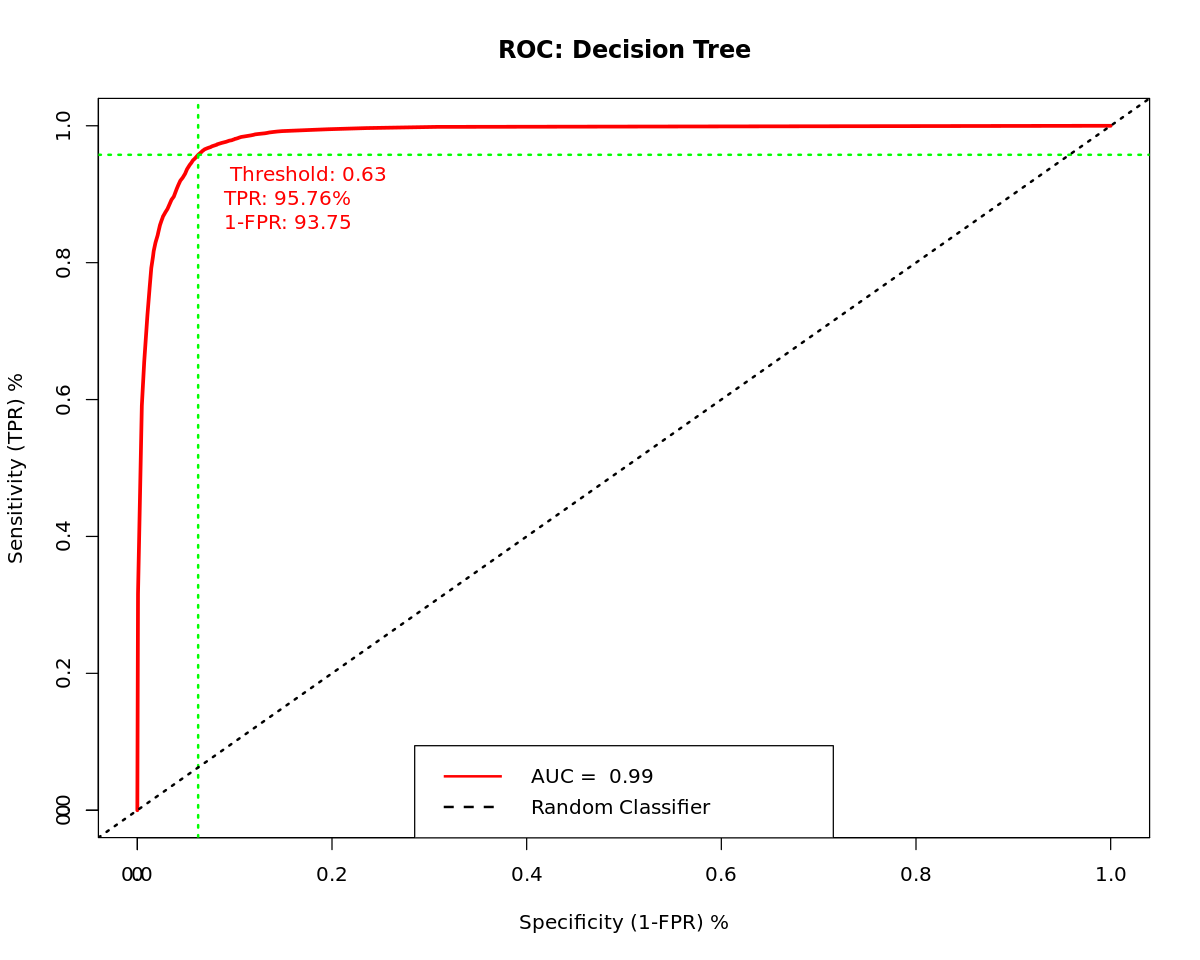

In [82]:
uncleanDT<-DecisionTree(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)

In [83]:
result<-uncleanDT$result


[1] "ACCURACY :  94.7682476131814 , PRECISION:  94.0089641434263 , RECALL:  95.7615726062143 , AUC :  0.986940094481763 F1 score: 94.8771753471131 Loss : 0.141069008438183 Threshold : 0.63"


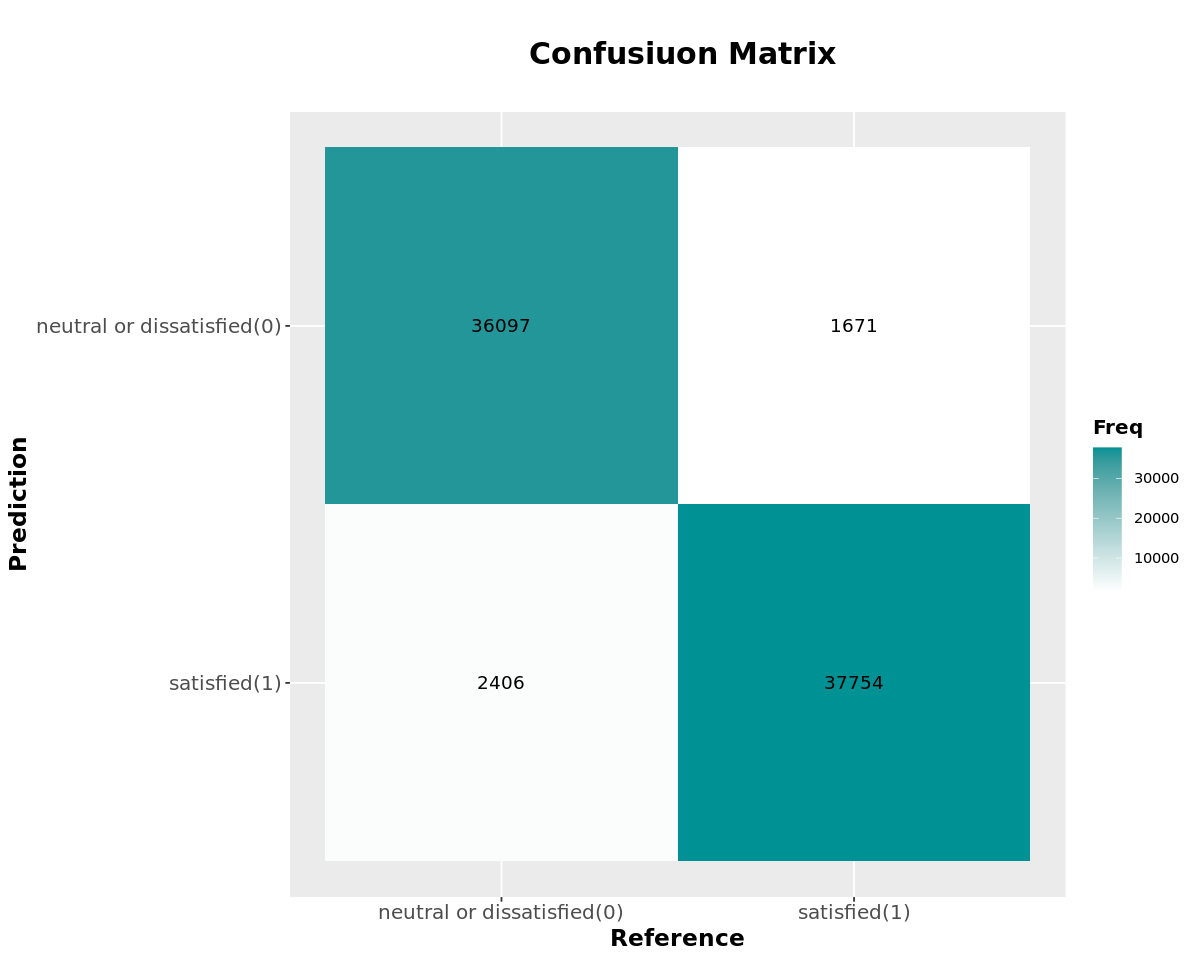

In [84]:
options(repr.plot.width = 10, repr.plot.height = 8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(as.numeric(result$gt),as.numeric(result$proba))
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
             "Threshold :", threshold))

In [85]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(DecisionTree_unclean=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11940.00                3.775400e+04        
FN          811.00                1.671000e+03        
FP          631.00                2.406000e+03        
TN        12593.00                3.609700e+04        
F1           94.31                9.487718e+01        
acc          94.45                9.476825e+01        
pgood        94.98                9.400896e+01        
pbad         93.95                9.557562e+01        
FPR           4.77                6.248864e+00        
TPR          93.64                9.576157e+01        
TNR          95.23                9.375114e+01        
MCC           0.89                8.954864e-01        
threshold     0.38                6.300000e-01        
AUC           0.99                9.869401e-01

## K-fold decision tree with Unclean data


In [86]:
KFOLDS <- 10  # Number of folded experiments
dataset<-stratifiedDataset(selected_data)
measures<-runExperiment(dataset = dataset,FUN = DecisionTree)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"
[1] "FOLD : , 7"
[1] "FOLD : , 8"
[1] "FOLD : , 9"
[1] "FOLD : , 10"


In [87]:
data.frame(t(measures$allresults))

data.frame(measures$means)

X1           X2           X3           X4           X5          
TP        1.264800e+04 1.269300e+04 1.271500e+04 1.276000e+04 1.269800e+04
FN        5.770000e+02 5.320000e+02 5.100000e+02 4.650000e+02 5.270000e+02
FP        7.290000e+02 7.740000e+02 8.000000e+02 7.690000e+02 8.060000e+02
TN        1.202300e+04 1.197800e+04 1.195200e+04 1.198300e+04 1.194600e+04
F1        9.509059e+01 9.510715e+01 9.510097e+01 9.538761e+01 9.501291e+01
acc       9.497248e+01 9.497248e+01 9.495708e+01 9.524964e+01 9.486854e+01
pgood     9.455035e+01 9.425262e+01 9.408065e+01 9.431591e+01 9.403140e+01
pbad      9.542063e+01 9.574740e+01 9.590756e+01 9.626446e+01 9.577487e+01
FPR       5.716750e+00 6.069636e+00 6.273526e+00 6.030427e+00 6.320577e+00
TPR       9.563705e+01 9.597732e+01 9.614367e+01 9.648393e+01 9.601512e+01
TNR       9.428325e+01 9.393036e+01 9.372647e+01 9.396957e+01 9.367942e+01
MCC       8.994564e-01 8.995384e-01 8.992916e-01 9.051692e-01 8.975039e-01
threshold 6.400000e-01 6.200000e-01 6.300000e-01 6.300000e-01 6.300000e-01
AUC       9.877496e-01 9.877244e-01 9.871862e-01 9.873950e-01 9.874951e-01
          X6           X7           X8           X9           X10         
TP        1.268400e+04 1.267000e+04 1.260900e+04 1.265900e+04 1.269900e+04
FN        5.400000e+02 5.540000e+02 6.150000e+02 5.650000e+02 5.250000e+02
FP        8.070000e+02 7.950000e+02 7.540000e+02 8.050000e+02 8.400000e+02
TN        1.194400e+04 1.195600e+04 1.199700e+04 1.194600e+04 1.191100e+04
F1        9.495789e+01 9.494548e+01 9.485087e+01 9.486661e+01 9.489967e+01
acc       9.481424e+01 9.480654e+01 9.472955e+01 9.472570e+01 9.474495e+01
pgood     9.401823e+01 9.409580e+01 9.435755e+01 9.402109e+01 9.379570e+01
pbad      9.567446e+01 9.557154e+01 9.512369e+01 9.548397e+01 9.577839e+01
FPR       6.328915e+00 6.234805e+00 5.913262e+00 6.313230e+00 6.587719e+00
TPR       9.591652e+01 9.581065e+01 9.534936e+01 9.572747e+01 9.602995e+01
TNR       9.367108e+01 9.376519e+01 9.408674e+01 9.368677e+01 9.341228e+01
MCC       8.964013e-01 8.962158e-01 8.945867e-01 8.945964e-01 8.950813e-01
threshold 6.200000e-01 6.300000e-01 6.600000e-01 6.200000e-01 5.900000e-01
AUC       9.880413e-01 9.875754e-01 9.874538e-01 9.871841e-01 9.865964e-01

TP    FN  FP  TN    F1    acc   pgood pbad  FPR  TPR   TNR   MCC threshold
1 12683 541 787 11963 95.02 94.88 94.15 95.67 6.18 95.91 93.82 0.9 0.63     
  AUC 
1 0.99

In [88]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(DecisionTree_Kfold_Unclean=unlist(measures$means)))
allResults


LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11940.00                3.775400e+04        
FN          811.00                1.671000e+03        
FP          631.00                2.406000e+03        
TN        12593.00                3.609700e+04        
F1           94.31                9.487718e+01        
acc          94.45                9.476825e+01        
pgood        94.98                9.400896e+01        
pbad         93.95                9.557562e+01        
FPR           4.77                6.248864e+00        
TPR          93.64                9.576157e+01        
TNR          95.23                9.375114e+01        
MCC           0.89                8.954864e-01        
threshold     0.38                6.300000e-01        
AUC           0.99                9.869401e-01        
          DecisionTree_Kfold_Unclean
TP        12683.00                  
FN          541.00                  
FP          787.00                  
TN        11963.00                  
F1           95.02                  
acc          94.88                  
pgood        94.15                  
pbad         95.67                  
FPR           6.18                  
TPR          95.91                  
TNR          93.82                  
MCC           0.90                  
threshold     0.63                  
AUC           0.99

### Random Forest Classification

Random Forest is an ensemble learning model in machine learning, It can be use in both regression or classification. It consist of mulitple number of decision tree inside which each tree spit out a prediction of a class and prediction of a class with the most occur or vote from trees become a final result of a model.

Using this model may improve the result from traditional Decision tree but it has longer training time since there are mulitple tree.

#### Random Forest on Clean dataset

In [89]:
# Select field for Random forest
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
               
                'ClassEco',
                'ClassEco.Plus',
                'DepartureDelayinMinutes0',
                'DepartureDelayinMinutes1',
                'DepartureDelayinMinutes2',

                'ArrivalDelayinMinutes0',
                'ArrivalDelayinMinutes1',
                'ArrivalDelayinMinutes2',
                'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassEco"                       "ClassEco.Plus"                 
 [7] "DepartureDelayinMinutes0"       "DepartureDelayinMinutes1"      
 [9] "DepartureDelayinMinutes2"       "ArrivalDelayinMinutes0"        
[11] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[13] "ArrivalDelayinMinutes3"         "Age"                           
[15] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[17] "Foodanddrink"                   "Gatelocation"                  
[19] "Inflightwifiservice"            "Inflightentertainment"         
[21] "EaseofOnlinebooking"            "Onboardservice"                
[23] "Legroomservice"                 "Baggagehandling"               
[25] "Checkinservice"                 "Cleanliness"                   
[27] "Onlineboarding"                
[1] "Number of Trai

satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
84408  0              1      0            1            1        0            
129658 1              1      0            1            0        0            
11880  1              1      0            0            1        0            
103498 1              0      0            1            0        0            
191880 1              0      1            1            1        0            
95091  1              0      0            1            0        0            
       DepartureDelayinMinutes0 DepartureDelayinMinutes1
84408  1                        0                       
129658 1                        0                       
11880  1                        0                       
103498 0                        1                       
191880 1                        0                       
95091  0                        1                       
       DepartureDelayinMinutes2 ArrivalDelayinMinutes0 ⋯ Gatelocation
84408  0                        1                      ⋯ 0.4         
129658 0                        1                      ⋯ 0.8         
11880  0                        1                      ⋯ 0.8         
103498 0                        0                      ⋯ 0.2         
191880 0                        1                      ⋯ 0.8         
95091  0                        0                      ⋯ 0.4         
       Inflightwifiservice Inflightentertainment EaseofOnlinebooking
84408  0.2                 0.6                   0.6                
129658 1.0                 0.6                   1.0                
11880  0.8                 0.8                   0.8                
103498 0.4                 1.0                   0.8                
191880 1.0                 1.0                   1.0                
95091  1.0                 1.0                   0.8                
       Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
84408  0.6            0.6            0.6             0.8            0.6        
129658 1.0            1.0            1.0             0.4            1.0        
11880  0.4            1.0            0.8             0.2            0.8        
103498 0.8            0.8            0.8             0.6            0.8        
191880 0.2            1.0            0.4             0.2            1.0        
95091  0.8            0.8            0.8             1.0            0.8        
       Onlineboarding
84408  0.6           
129658 0.4           
11880  0.8           
103498 0.6           
191880 1.0           
95091  0.6

In [90]:
RandomForestClassifier<-function(training_data, testing_data, plot=TRUE, output_field="satisfactionv2"){
    
    
# Training data
x_train<-training_data[,names(training_data [-which(names(training_data)%in% output_field)])]
y_train<-training_data[,output_field]
# Testing data
x_test<-testing_data[,names(training_data [-which(names(testing_data)%in% output_field)])]
y_test<-testing_data[,output_field]



RandForestModel<-randomForest::randomForest(x_train,
                               factor(y_train),
                               ntree=50 ,
                               importance=TRUE,
                               mtry=sqrt(ncol(x_train)),
                               na.action=randomForest::na.roughfix)
    
#y_pred<-predict()
    
    
class_proba<-predict(RandForestModel, newdata=x_test, type="prob")

# Get the column index with the class label
classIndex<-which(as.numeric(colnames(class_proba))==1)

# Get the probabilities for classifying the good loans
y_proba<-class_proba[,classIndex]


title<-'Random Forest'
results<-NdetermineThreshold(test_expected=y_test,
                                test_predicted=y_proba,
                                plot=plot,
                                title=title)

accuracy<-results$acc
precision<-results$pgood
recall<-results$TPR
auc<-results$AUC

    
return(list("model"=RandForestModel,"result"=results))
}



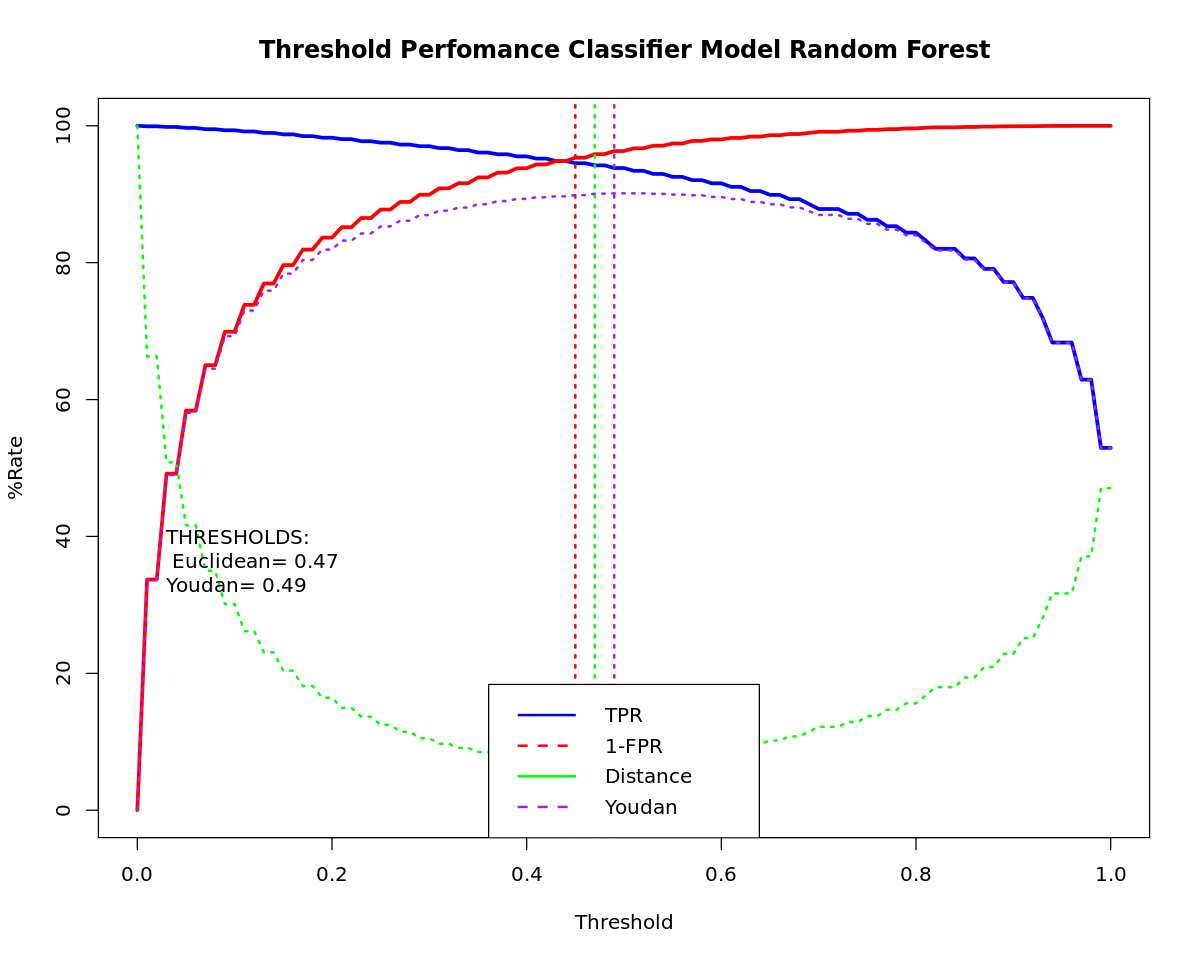

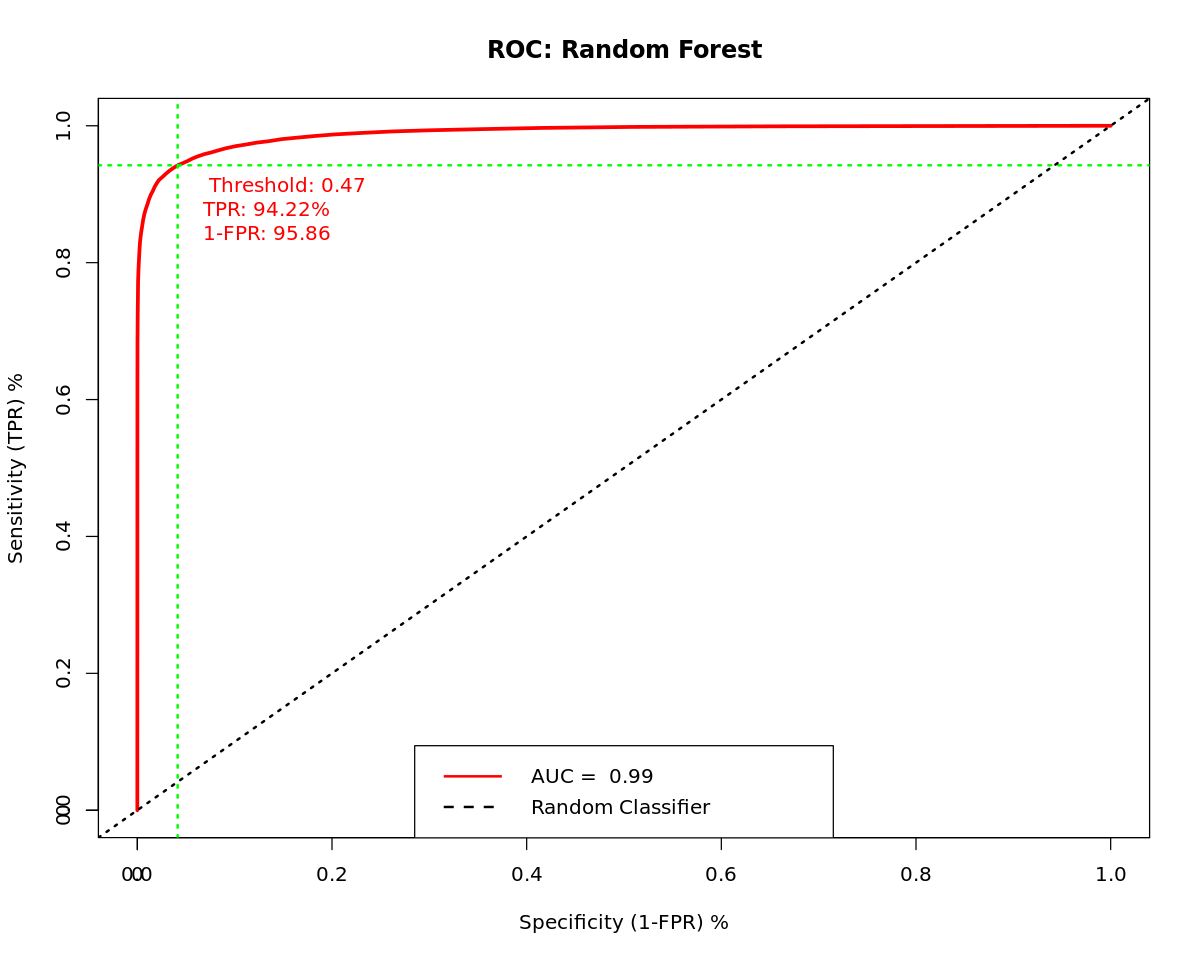

In [91]:
RFmodel<-RandomForestClassifier(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-RFmodel$result

#### Confusion Matrix

[1] "ACCURACY :  95.0544091982343 , PRECISION:  95.6612664125371 , RECALL:  94.2245515227368 , AUC :  0.989395080289534 F1 score: 94.9374737284573 Loss : 0.14175898380384 Threshold : 0.47"


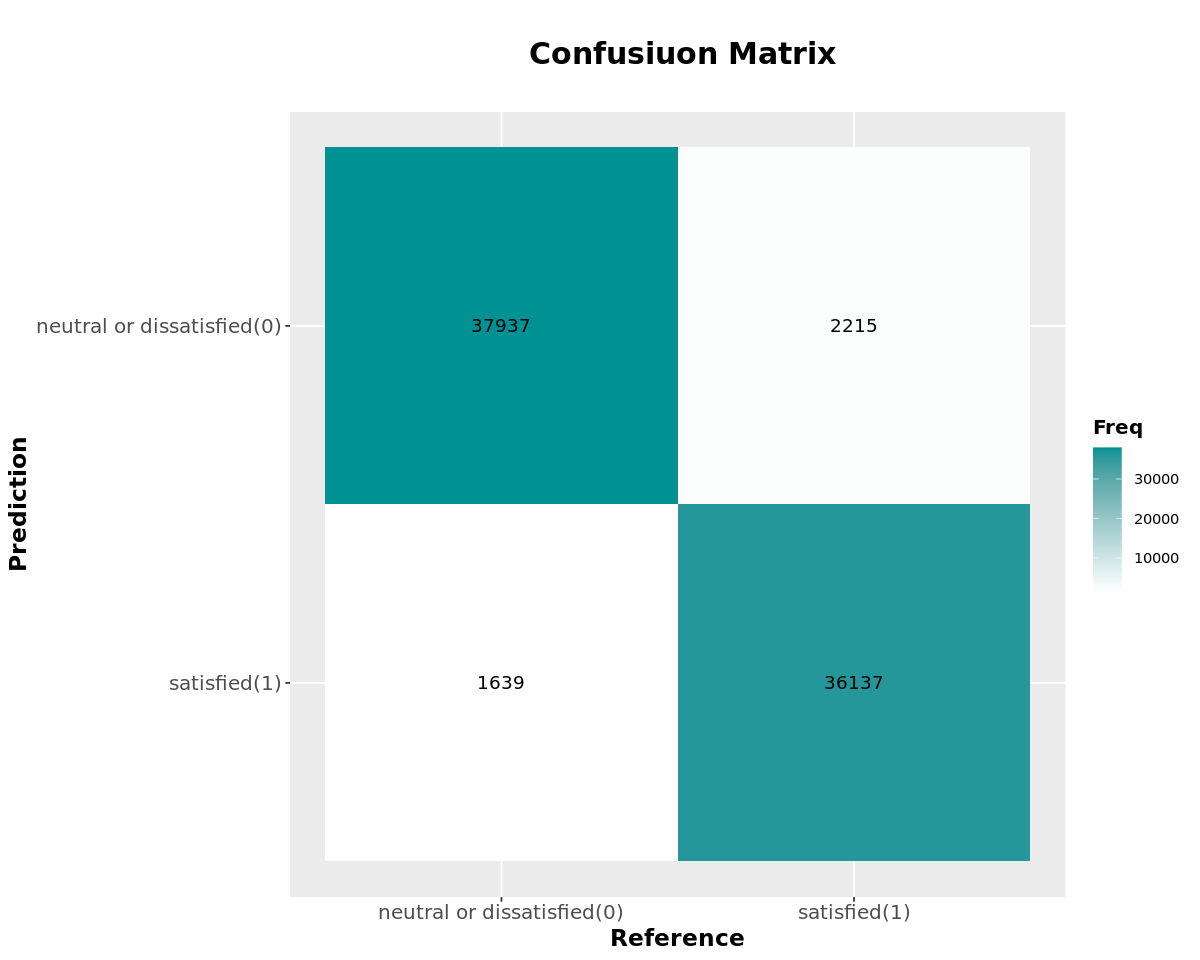

In [92]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

#### Impotance Variable(fields) on Random Forest Classifer

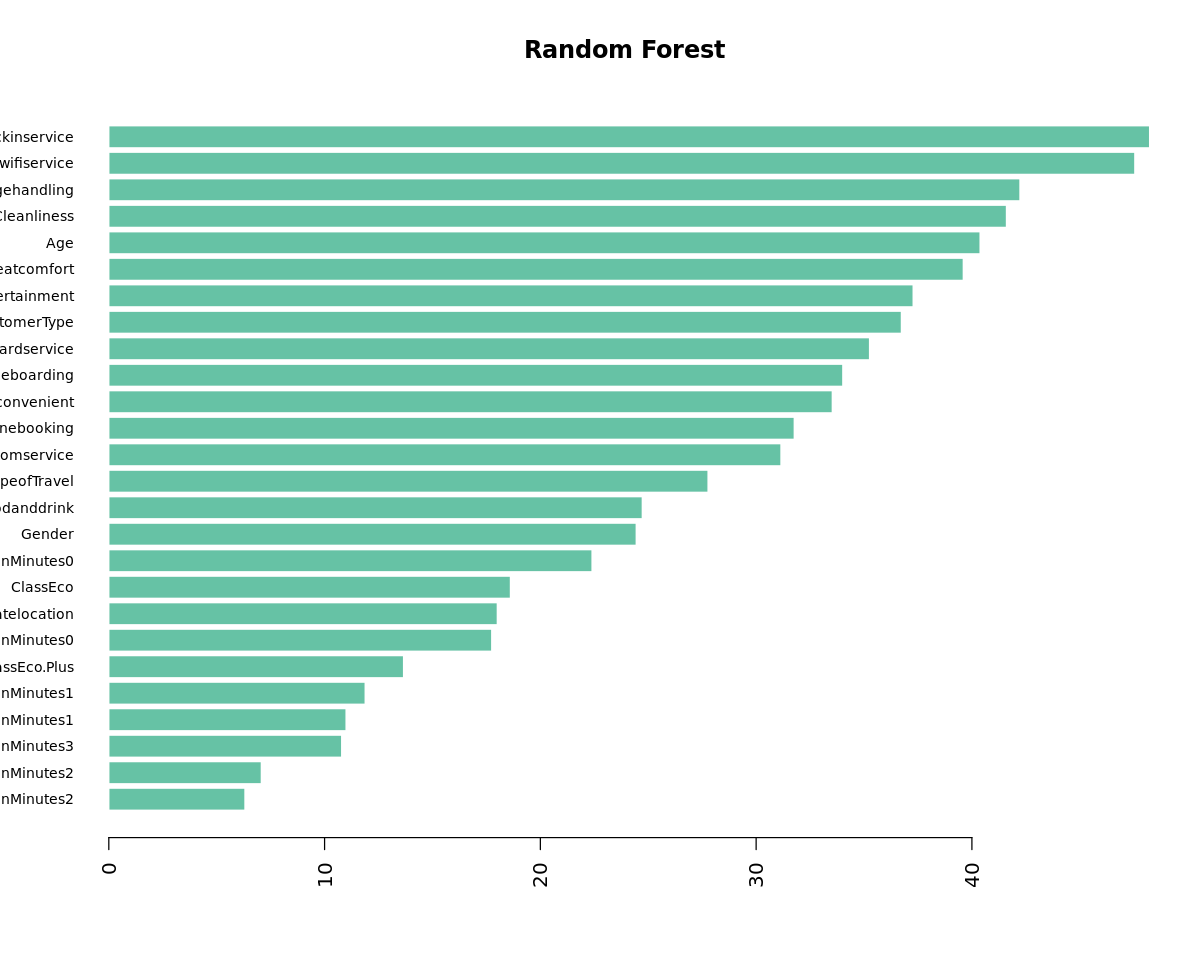

In [93]:
ForestCoeff_plot(RFmodel$model)

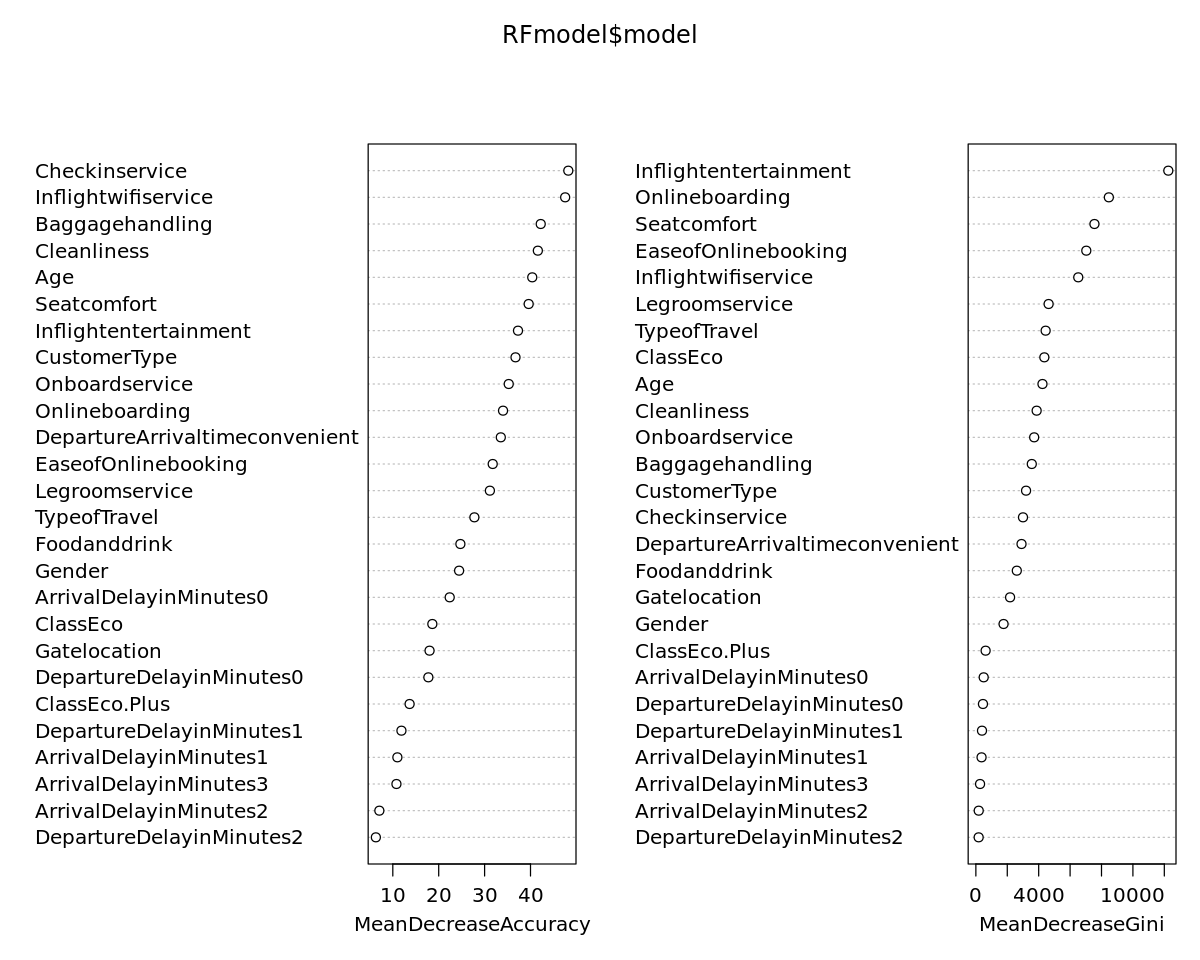

In [94]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Variable importance plot
randomForest::varImpPlot(RFmodel$model)


### Dimensionality reduction 



In [95]:
# Select field for Random forest
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
               
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',

#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassEco"                       "ClassEco.Plus"                 
 [7] "Age"                            "Seatcomfort"                   
 [9] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[11] "Gatelocation"                   "Inflightwifiservice"           
[13] "Inflightentertainment"          "EaseofOnlinebooking"           
[15] "Onboardservice"                 "Legroomservice"                
[17] "Baggagehandling"                "Checkinservice"                
[19] "Cleanliness"                    "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
200841 1              1      0            1            1        0            
7220   0              0      0            0            1        0            
43970  0              0      1            1            1        0            
201109 0              1      0            1            1        0            
62603  1              0      1            1            0        0            
131172 0              0      0            0            0        0            
       Age       Seatcomfort DepartureArrivaltimeconvenient Foodanddrink
200841 0.4794521 0.2         1.0                            0.2         
7220   0.5753425 0.2         1.0                            0.2         
43970  0.2739726 0.2         0.6                            0.2         
201109 0.7260274 0.6         0.8                            0.2         
62603  0.2876712 1.0         1.0                            1.0         
131172 0.1643836 0.2         0.2                            0.2         
       Gatelocation Inflightwifiservice Inflightentertainment
200841 1.0          0.4                 0.4                  
7220   0.6          0.6                 0.2                  
43970  0.6          0.8                 0.2                  
201109 0.8          0.4                 0.4                  
62603  0.2          0.6                 0.8                  
131172 0.4          0.2                 0.2                  
       EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
200841 1.0                 0.4            0.4            0.4            
7220   0.6                 1.0            0.4            0.8            
43970  0.8                 0.6            0.6            0.6            
201109 0.8                 0.4            0.4            0.4            
62603  0.6                 0.8            0.4            0.8            
131172 0.2                 0.4            0.6            0.2            
       Checkinservice Cleanliness Onlineboarding
200841 1.0            0.2         0.4           
7220   0.8            1.0         0.6           
43970  0.4            0.8         0.8           
201109 0.2            0.8         0.4           
62603  1.0            0.8         0.6           
131172 0.6            0.2         0.2

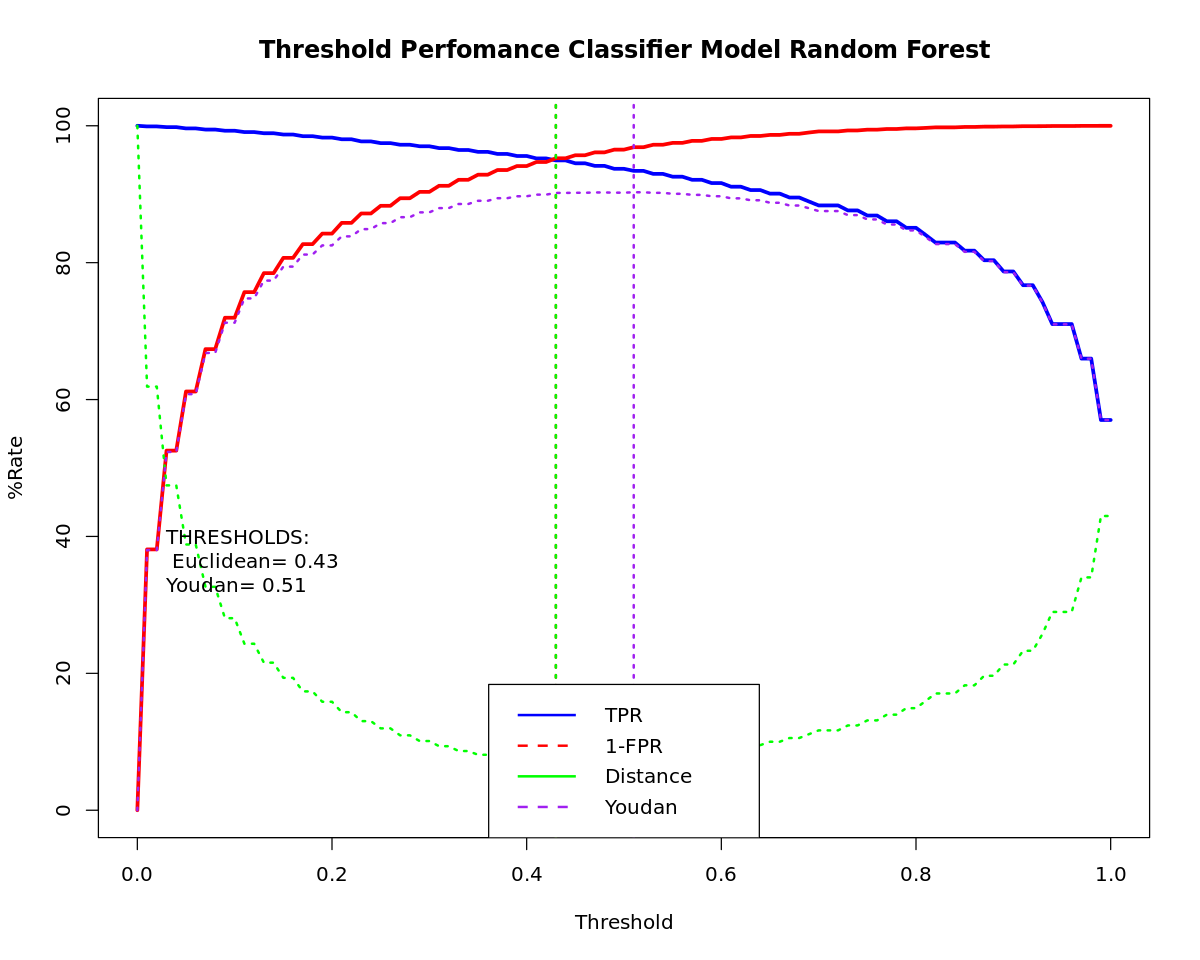

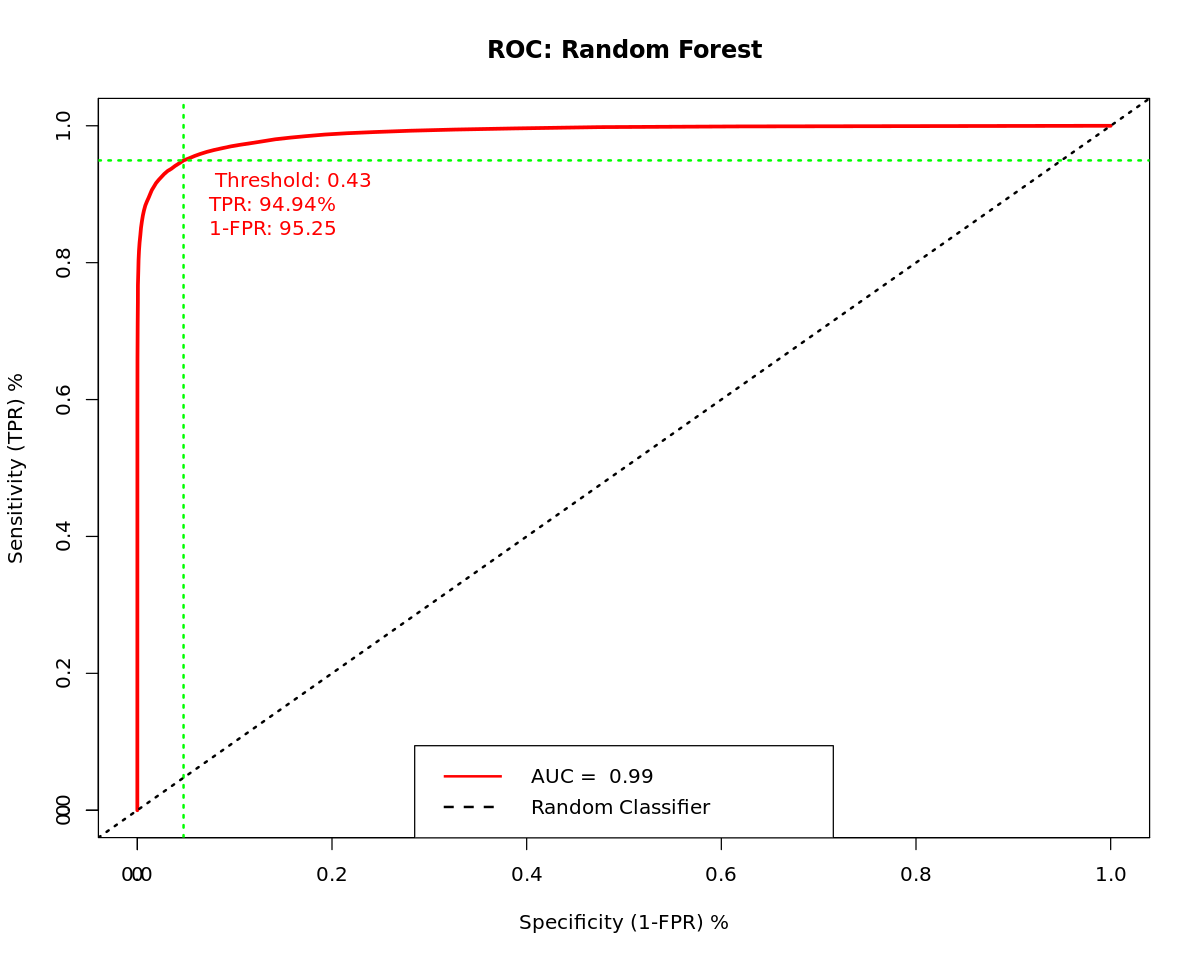

In [96]:
RFmodel<-RandomForestClassifier(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-RFmodel$result

[1] "ACCURACY :  95.0993224514937 , PRECISION:  95.0523086604263 , RECALL:  94.9402891263356 , AUC :  0.989790760938095 F1 score: 94.9962658700523 Loss : 0.137277759981508 Threshold : 0.43"


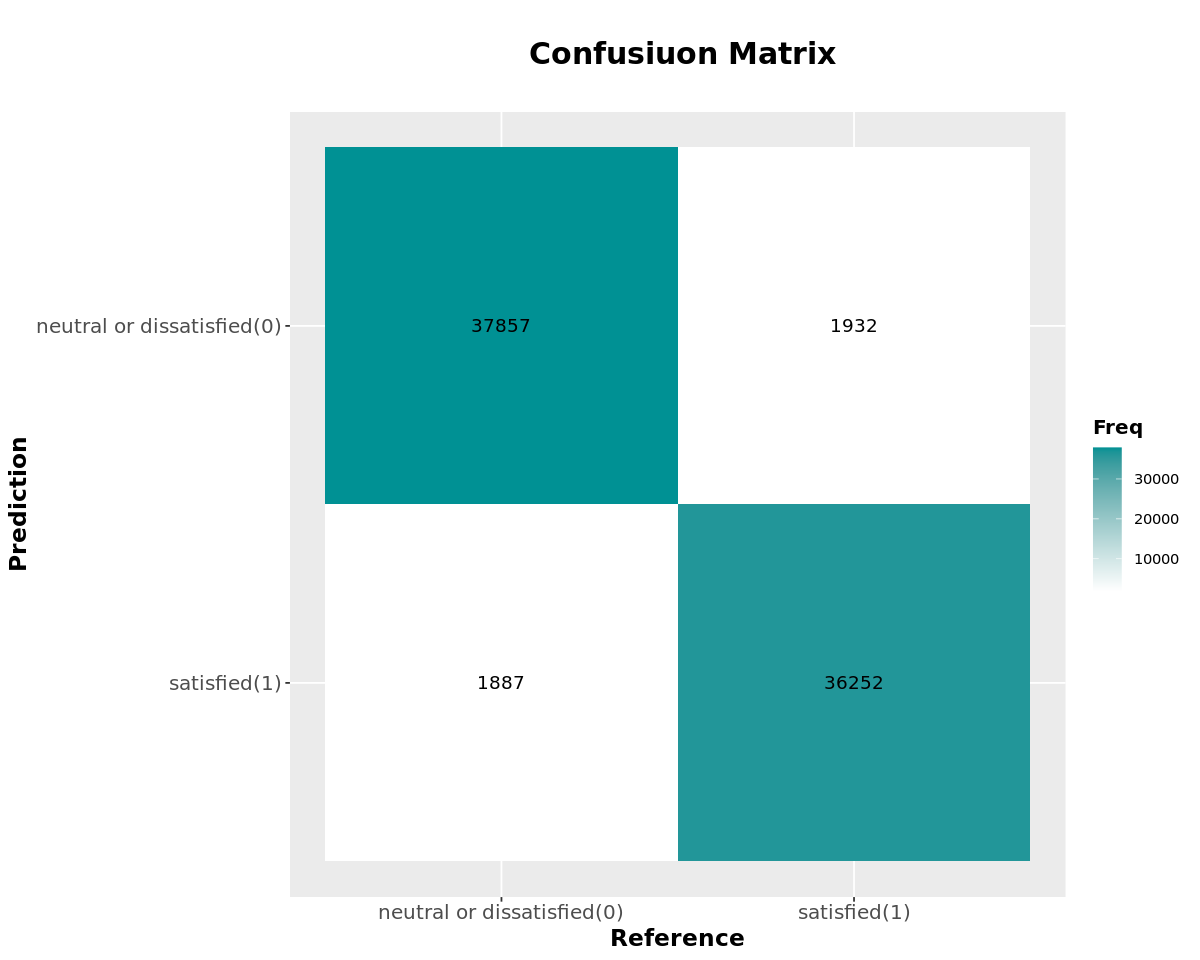

In [97]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

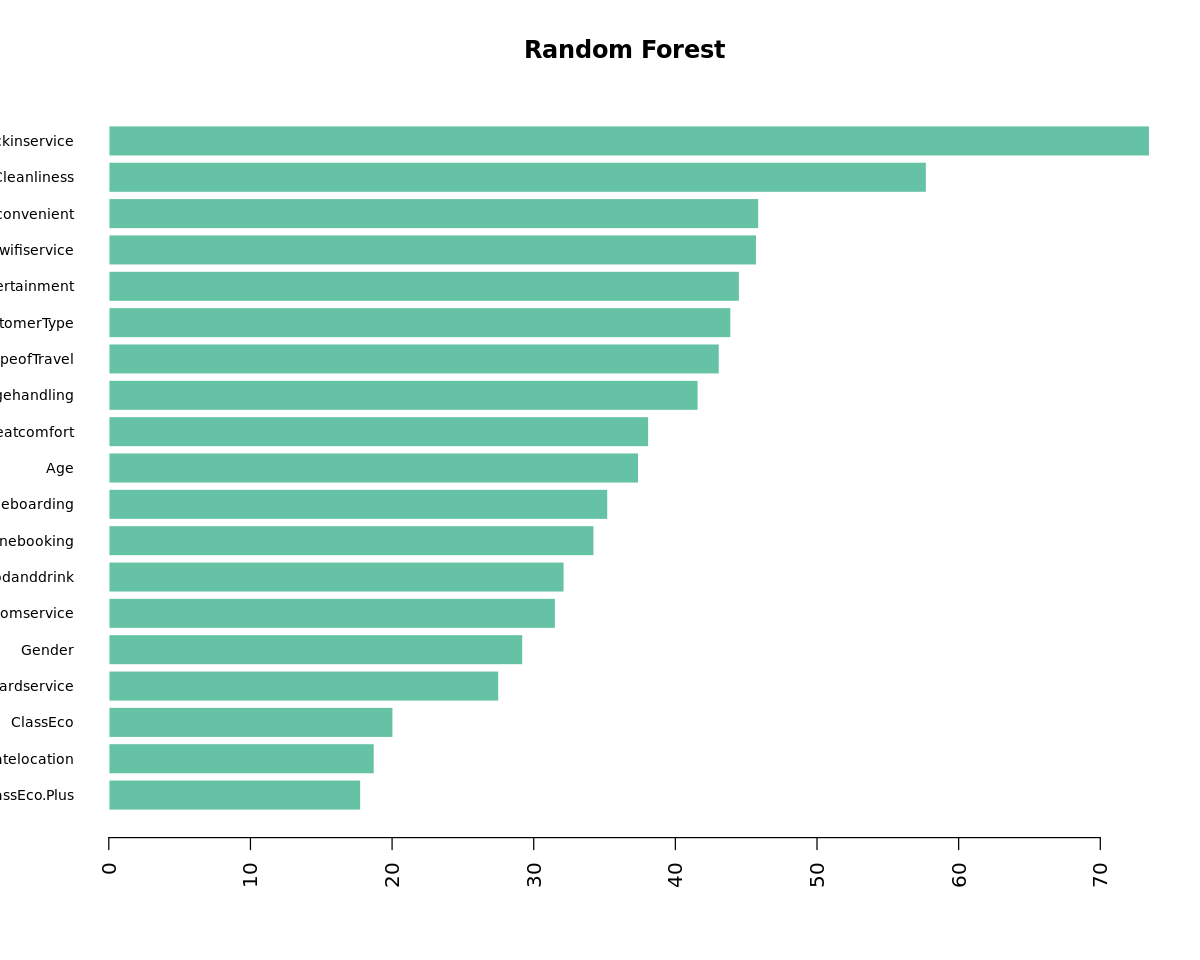

In [98]:
ForestCoeff_plot(RFmodel$model)

In [99]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(RandomForest=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11940.00                3.775400e+04        
FN          811.00                1.671000e+03        
FP          631.00                2.406000e+03        
TN        12593.00                3.609700e+04        
F1           94.31                9.487718e+01        
acc          94.45                9.476825e+01        
pgood        94.98                9.400896e+01        
pbad         93.95                9.557562e+01        
FPR           4.77                6.248864e+00        
TPR          93.64                9.576157e+01        
TNR          95.23                9.375114e+01        
MCC           0.89                8.954864e-01        
threshold     0.38                6.300000e-01        
AUC           0.99                9.869401e-01        
          DecisionTree_Kfold_Unclean RandomForest
TP        12683.00                   3.625200e+04
FN          541.00                   1.932000e+03
FP          787.00                   1.887000e+03
TN        11963.00                   3.785700e+04
F1           95.02                   9.499627e+01
acc          94.88                   9.509932e+01
pgood        94.15                   9.505231e+01
pbad         95.67                   9.514439e+01
FPR           6.18                   4.747886e+00
TPR          95.91                   9.494029e+01
TNR          93.82                   9.525211e+01
MCC           0.90                   9.019455e-01
threshold     0.63                   4.300000e-01
AUC           0.99                   9.897908e-01

In [100]:
#Clear cache prevent kernel kill
ls()
rm(list=setdiff(ls(),c("processed_data","RandomForestClassifier","DecisionTree","allResults","training_data","testing_data","OUTPUT_FIELD","combined")))
source('utils.R')
ls()

[1] "accuracy"               "allocateFoldID"         "allResults"            
 [4] "auc"                    "auroc"                  "BCE_loss"              
 [7] "combined"               "ConfusionMatrix_plot"   "dataset"               
[10] "DecisionTree"           "df"                     "eval_model"            
[13] "f1_score"               "F1_score"               "ForestCoeff_plot"      
[16] "KFOLDS"                 "LogisticCoeff_plot"     "LogisticCurve_plot"    
[19] "loss"                   "measures"               "NConvertClass"         
[22] "NdetermineThreshold"    "OUTPUT_FIELD"           "precision"             
[25] "processed_data"         "RandomForestClassifier" "recall"                
[28] "result"                 "RFmodel"                "runExperiment"         
[31] "select_field"           "selected_data"          "stratifiedDataset"     
[34] "stratifiedSplit"        "testing_data"           "threshold"             
[37] "training_data"          "training_records"       "TreeCoeff_plot"        
[40] "uncleanDT"

[1] "allocateFoldID"         "allResults"             "auroc"                 
 [4] "BCE_loss"               "combined"               "ConfusionMatrix_plot"  
 [7] "DecisionTree"           "eval_model"             "F1_score"              
[10] "ForestCoeff_plot"       "LogisticCoeff_plot"     "LogisticCurve_plot"    
[13] "NConvertClass"          "NdetermineThreshold"    "OUTPUT_FIELD"          
[16] "processed_data"         "RandomForestClassifier" "runExperiment"         
[19] "stratifiedDataset"      "stratifiedSplit"        "testing_data"          
[22] "training_data"          "TreeCoeff_plot"

### K-FOLD Cross Validation on Random Forest on clean dataset

In [101]:
KFOLDS <- 6# Number of folded 
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = RandomForestClassifier)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"


In [102]:
data.frame(measures$allresults)

TP    FN   FP  TN    F1       acc      pgood    pbad     FPR      TPR     
1 20071 1182 841 21200 95.20218 95.32730 95.97839 94.71897 3.815616 94.43843
2 20111 1142 965 21076 95.02233 95.13327 95.42133 94.86002 4.378204 94.62664
3 20149 1104 975 21066 95.09404 95.19795 95.38440 95.02030 4.423574 94.80544
4 20140 1112 959 21082 95.10991 95.21632 95.45476 94.98964 4.350982 94.76755
5 20087 1165 898 21143 95.11566 95.23480 95.72075 94.77766 4.074225 94.51816
6 20165 1087 926 21114 95.24597 95.35018 95.60950 95.10382 4.201452 94.88519
  TNR      MCC       threshold AUC      
1 96.18438 0.9066008 0.47      0.9908579
2 95.62180 0.9026489 0.45      0.9906108
3 95.57643 0.9039328 0.45      0.9908183
4 95.64902 0.9043048 0.45      0.9903975
5 95.92577 0.9047117 0.47      0.9904982
6 95.79855 0.9069853 0.45      0.9908857

In [103]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(RandomForestKfold=unlist(measures$means)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11940.00                3.775400e+04        
FN          811.00                1.671000e+03        
FP          631.00                2.406000e+03        
TN        12593.00                3.609700e+04        
F1           94.31                9.487718e+01        
acc          94.45                9.476825e+01        
pgood        94.98                9.400896e+01        
pbad         93.95                9.557562e+01        
FPR           4.77                6.248864e+00        
TPR          93.64                9.576157e+01        
TNR          95.23                9.375114e+01        
MCC           0.89                8.954864e-01        
threshold     0.38                6.300000e-01        
AUC           0.99                9.869401e-01        
          DecisionTree_Kfold_Unclean RandomForest RandomForestKfold
TP        12683.00                   3.625200e+04 20120.00         
FN          541.00                   1.932000e+03  1132.00         
FP          787.00                   1.887000e+03   927.00         
TN        11963.00                   3.785700e+04 21113.00         
F1           95.02                   9.499627e+01    95.13         
acc          94.88                   9.509932e+01    95.24         
pgood        94.15                   9.505231e+01    95.59         
pbad         95.67                   9.514439e+01    94.91         
FPR           6.18                   4.747886e+00     4.21         
TPR          95.91                   9.494029e+01    94.67         
TNR          93.82                   9.525211e+01    95.79         
MCC           0.90                   9.019455e-01     0.90         
threshold     0.63                   4.300000e-01     0.46         
AUC           0.99                   9.897908e-01     0.99

### Random Forest on Unclean dataset

In [104]:
OUTPUT_FIELD = "satisfactionv2"
source('utils.R')
selected_data<-NConvertClass(combined,OUTPUT_FIELD)

# Fill up missing values (Immputation)
missing_field<-c('Inflightservice','Onlinesupport','ArrivalDelayinMinutes')
selected_data[,missing_field]<-(randomForest::na.roughfix(selected_data[,missing_field]))

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Number of Training 181832"
[1] "Number of Testing 77928"


satisfactionv2 Gender CustomerType      Age TypeofTravel    Class   
169453 0              Female Loyal Customer    66  Personal Travel Eco     
46087  1              Female disloyal Customer 24  Business travel Eco     
112478 0              Male   Loyal Customer    45  Business travel Business
129516 0              Male   Loyal Customer    37  Business travel Business
207430 1              Female Loyal Customer    27  Business travel Eco Plus
5518   1              Male   Loyal Customer    47  Personal Travel Eco     
       FlightDistance Seatcomfort DepartureArrivaltimeconvenient Foodanddrink ⋯
169453  429           1           4                              3            ⋯
46087  2393           2           2                              2            ⋯
112478  397           1           1                              1            ⋯
129516 2546           1           1                              1            ⋯
207430  852           2           5                              2            ⋯
5518   2478           1           4                              2            ⋯
       EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
169453 5                   3              5              5              
46087  5                   2              5              5              
112478 4                   4              5              4              
129516 5                   5              5              5              
207430 5                   2              1              4              
5518   3                   3              3              5              
       Checkinservice Cleanliness Onlineboarding DepartureDelayinMinutes
169453 3              3           2               0                     
46087  4              2           5              15                     
112478 4              4           4              60                     
129516 2              5           5              36                     
207430 3              2           2              61                     
5518   3              5           3               0                     
       ArrivalDelayinMinutes Inflightservice
169453  5                    3              
46087  10                    4              
112478 41                    4              
129516 30                    4              
207430 58                    3              
5518    3                    4

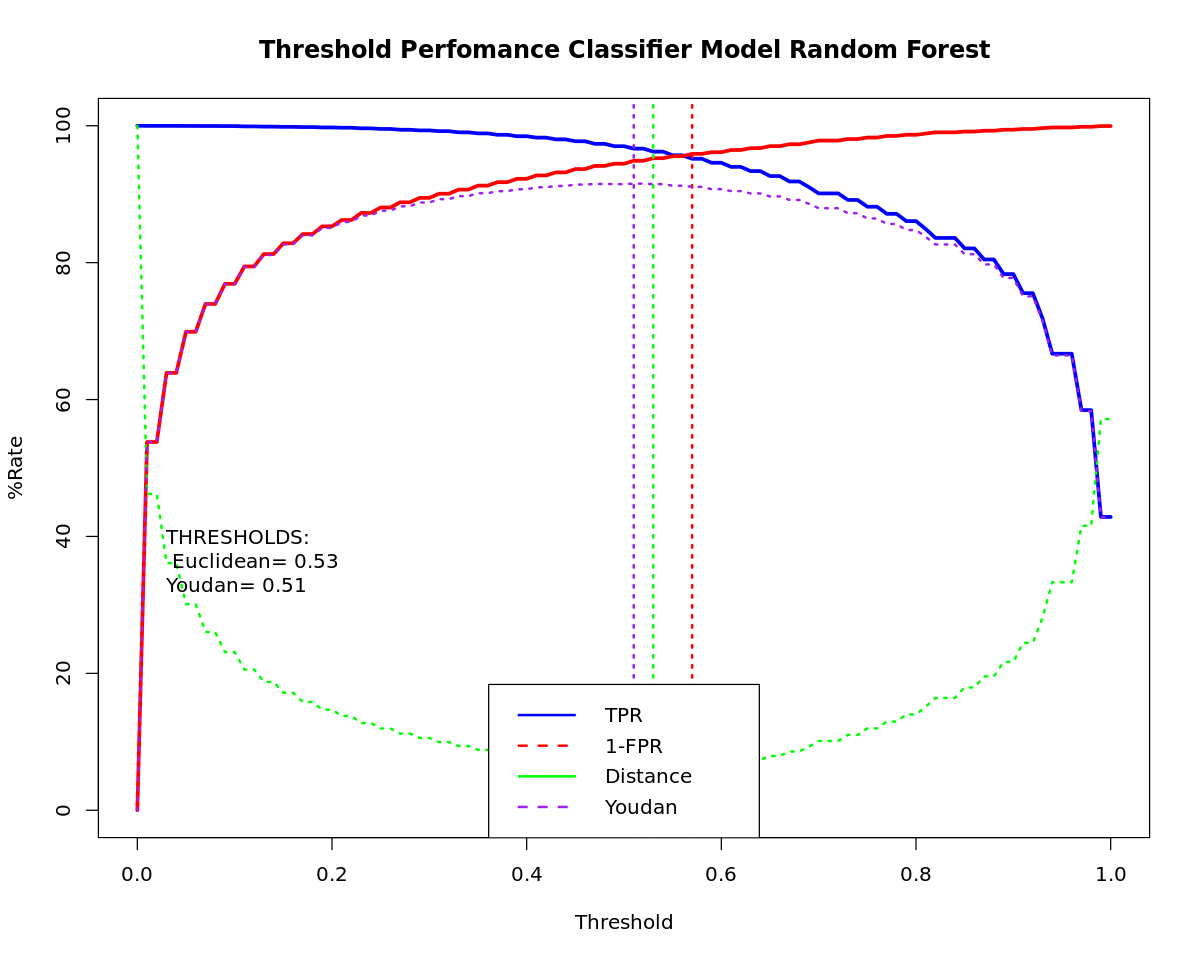

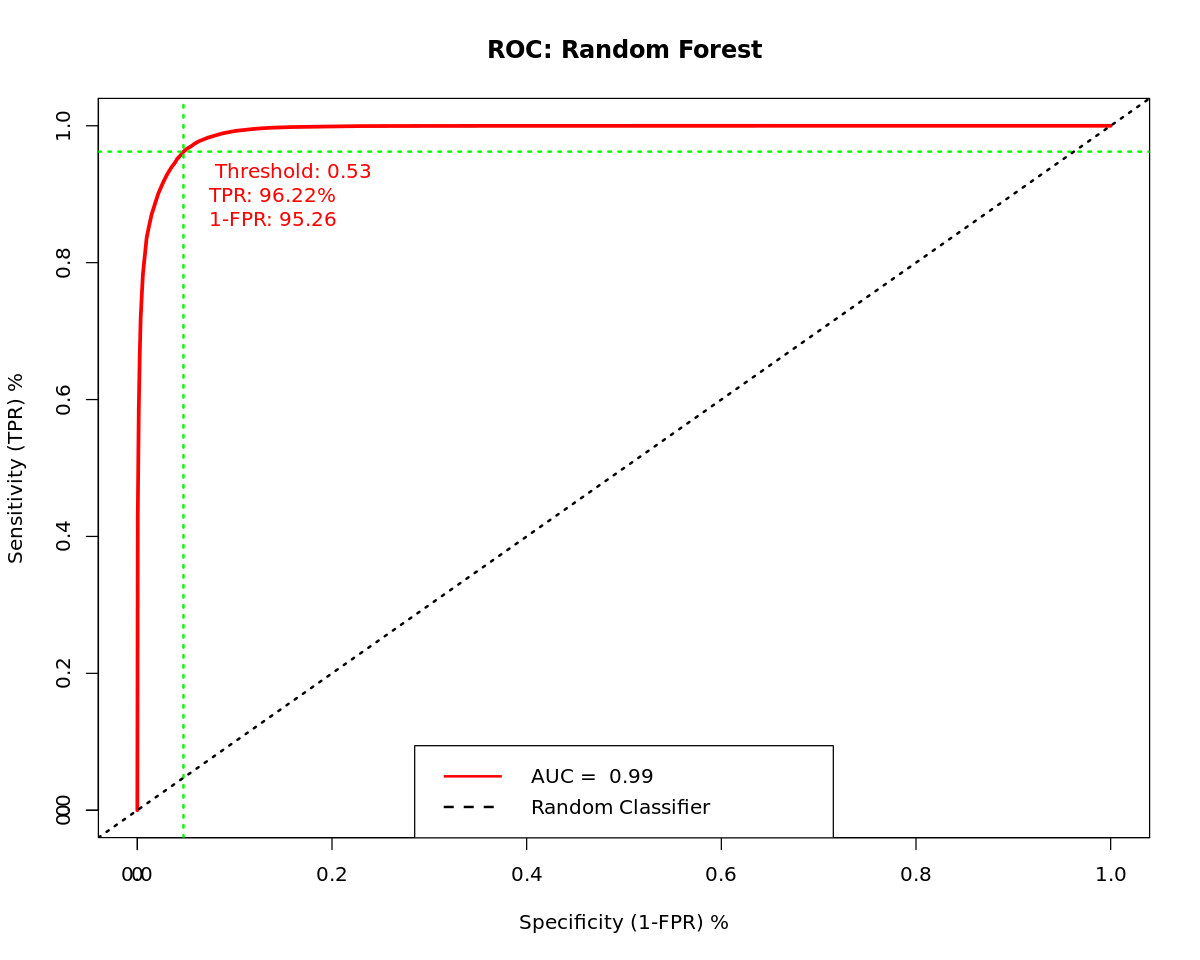

In [105]:
RFmodel_unclean<-RandomForestClassifier(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-RFmodel_unclean$result

[1] "ACCURACY :  95.751206241659 , PRECISION:  95.4997383568812 , RECALL:  96.2214411247803 , AUC :  0.992602335979148 F1 score: 95.8592313752955 Loss : 0.53 Threshold : 0.53"


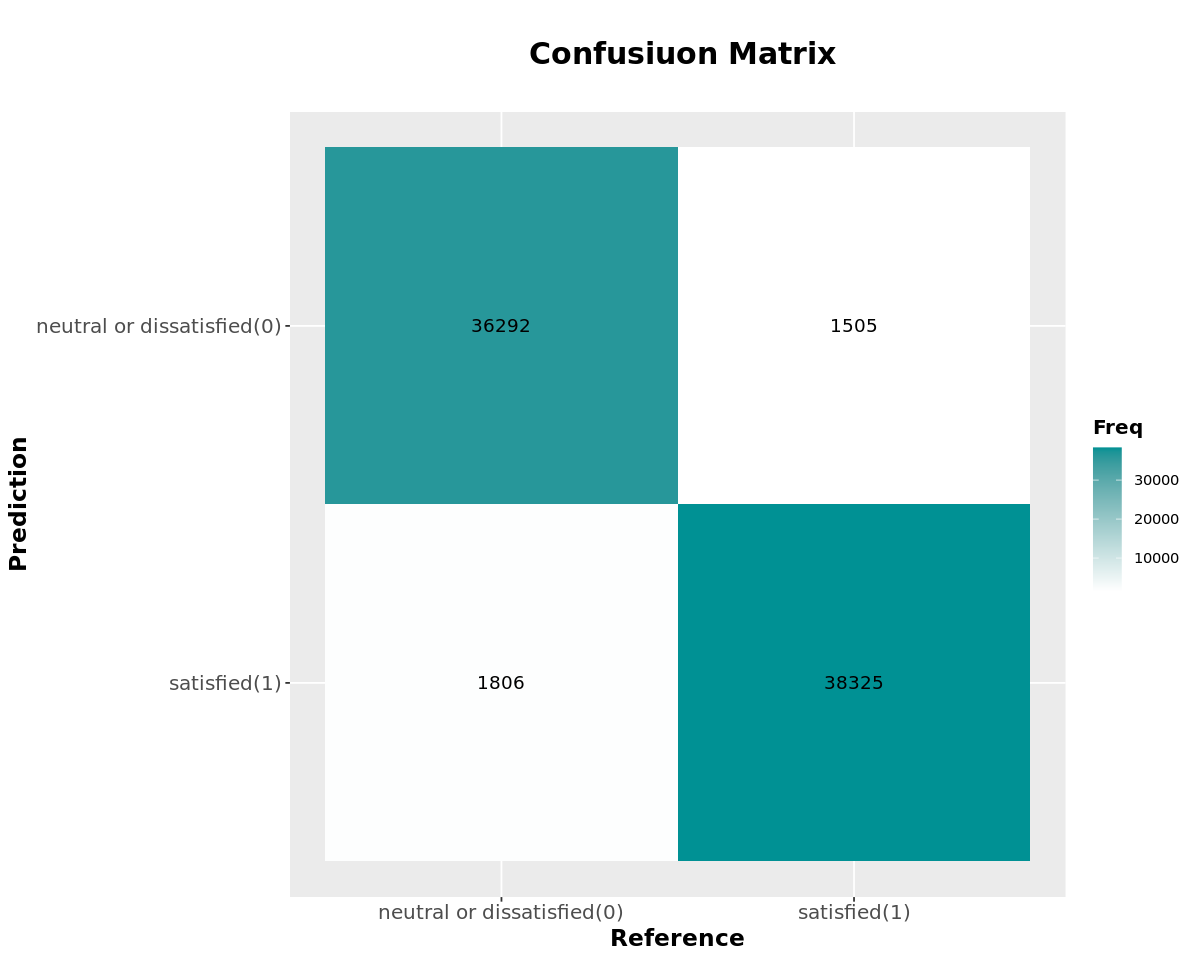

In [106]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)
accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- #BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

In [107]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(RandomForest_unclean=unlist(df)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11940.00                3.775400e+04        
FN          811.00                1.671000e+03        
FP          631.00                2.406000e+03        
TN        12593.00                3.609700e+04        
F1           94.31                9.487718e+01        
acc          94.45                9.476825e+01        
pgood        94.98                9.400896e+01        
pbad         93.95                9.557562e+01        
FPR           4.77                6.248864e+00        
TPR          93.64                9.576157e+01        
TNR          95.23                9.375114e+01        
MCC           0.89                8.954864e-01        
threshold     0.38                6.300000e-01        
AUC           0.99                9.869401e-01        
          DecisionTree_Kfold_Unclean RandomForest RandomForestKfold
TP        12683.00                   3.625200e+04 20120.00         
FN          541.00                   1.932000e+03  1132.00         
FP          787.00                   1.887000e+03   927.00         
TN        11963.00                   3.785700e+04 21113.00         
F1           95.02                   9.499627e+01    95.13         
acc          94.88                   9.509932e+01    95.24         
pgood        94.15                   9.505231e+01    95.59         
pbad         95.67                   9.514439e+01    94.91         
FPR           6.18                   4.747886e+00     4.21         
TPR          95.91                   9.494029e+01    94.67         
TNR          93.82                   9.525211e+01    95.79         
MCC           0.90                   9.019455e-01     0.90         
threshold     0.63                   4.300000e-01     0.46         
AUC           0.99                   9.897908e-01     0.99         
          RandomForest_unclean
TP        3.832500e+04        
FN        1.505000e+03        
FP        1.806000e+03        
TN        3.629200e+04        
F1        9.585923e+01        
acc       9.575121e+01        
pgood     9.549974e+01        
pbad      9.601820e+01        
FPR       4.740406e+00        
TPR       9.622144e+01        
TNR       9.525959e+01        
MCC       9.149949e-01        
threshold 5.300000e-01        
AUC       9.926023e-01

### K-FOLD Cross validation with unclen dataset on Randomforest

In [108]:
KFOLDS<- 6 # Number of folded 
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = RandomForestClassifier)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"


In [109]:

data.frame(measures$allresults)

data.frame(measures$means)




TP    FN   FP   TN    F1       acc      pgood    pbad     FPR      TPR     
1 20147 1106  957 21084 95.12949 95.23491 95.46531 95.01577 4.341908 94.79603
2 20126 1127 1002 21039 94.97652 95.08246 95.25748 94.91564 4.546073 94.69722
3 20126 1127  974 21067 95.03931 95.14713 95.38389 94.92205 4.419037 94.69722
4 20118 1134  951 21090 95.07337 95.18398 95.48626 94.89741 4.314686 94.66403
5 20166 1086  961 21080 95.16978 95.27175 95.45132 95.10060 4.360056 94.88989
6 20130 1122  941 21099 95.12558 95.23469 95.53415 94.95072 4.269510 94.72050
  TNR      MCC       threshold AUC      
1 95.65809 0.9046760 0.45      0.9905550
2 95.45393 0.9016213 0.45      0.9906171
3 95.58096 0.9029206 0.45      0.9908081
4 95.68531 0.9036650 0.45      0.9901988
5 95.63994 0.9054088 0.45      0.9907016
6 95.73049 0.9046793 0.45      0.9908237

TP    FN   FP  TN    F1    acc   pgood pbad  FPR  TPR   TNR   MCC threshold
1 20135 1117 964 21076 95.09 95.19 95.43 94.97 4.38 94.74 95.62 0.9 0.45     
  AUC 
1 0.99

In [110]:

allResults<-cbind(allResults,data.frame(RandomForest_Kfold_unclean=unlist(measures$means)))
allResults

LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11940.00                3.775400e+04        
FN          811.00                1.671000e+03        
FP          631.00                2.406000e+03        
TN        12593.00                3.609700e+04        
F1           94.31                9.487718e+01        
acc          94.45                9.476825e+01        
pgood        94.98                9.400896e+01        
pbad         93.95                9.557562e+01        
FPR           4.77                6.248864e+00        
TPR          93.64                9.576157e+01        
TNR          95.23                9.375114e+01        
MCC           0.89                8.954864e-01        
threshold     0.38                6.300000e-01        
AUC           0.99                9.869401e-01        
          DecisionTree_Kfold_Unclean RandomForest RandomForestKfold
TP        12683.00                   3.625200e+04 20120.00         
FN          541.00                   1.932000e+03  1132.00         
FP          787.00                   1.887000e+03   927.00         
TN        11963.00                   3.785700e+04 21113.00         
F1           95.02                   9.499627e+01    95.13         
acc          94.88                   9.509932e+01    95.24         
pgood        94.15                   9.505231e+01    95.59         
pbad         95.67                   9.514439e+01    94.91         
FPR           6.18                   4.747886e+00     4.21         
TPR          95.91                   9.494029e+01    94.67         
TNR          93.82                   9.525211e+01    95.79         
MCC           0.90                   9.019455e-01     0.90         
threshold     0.63                   4.300000e-01     0.46         
AUC           0.99                   9.897908e-01     0.99         
          RandomForest_unclean RandomForest_Kfold_unclean
TP        3.832500e+04         20135.00                  
FN        1.505000e+03          1117.00                  
FP        1.806000e+03           964.00                  
TN        3.629200e+04         21076.00                  
F1        9.585923e+01            95.09                  
acc       9.575121e+01            95.19                  
pgood     9.549974e+01            95.43                  
pbad      9.601820e+01            94.97                  
FPR       4.740406e+00             4.38                  
TPR       9.622144e+01            94.74                  
TNR       9.525959e+01            95.62                  
MCC       9.149949e-01             0.90                  
threshold 5.300000e-01             0.45                  
AUC       9.926023e-01             0.99

In [111]:

t(allResults)

TP    FN   FP   TN    F1       acc      pgood   
LogisticRegression         30902 7486 5755 33785 82.35592 83.00867 84.30041
Logistic_with_Kfold        10345 2405 1928 11296 82.68000 83.31000 84.30000
DecisionTree               35667 2721 2032 37508 93.75320 93.90078 94.60994
DecisionTree_with_Kfold    11940  811  631 12593 94.31000 94.45000 94.98000
DecisionTree_unclean       37754 1671 2406 36097 94.87718 94.76825 94.00896
DecisionTree_Kfold_Unclean 12683  541  787 11963 95.02000 94.88000 94.15000
RandomForest               36252 1932 1887 37857 94.99627 95.09932 95.05231
RandomForestKfold          20120 1132  927 21113 95.13000 95.24000 95.59000
RandomForest_unclean       38325 1505 1806 36292 95.85923 95.75121 95.49974
RandomForest_Kfold_unclean 20135 1117  964 21076 95.09000 95.19000 95.43000
                           pbad     FPR       TPR      TNR      MCC      
LogisticRegression         81.86136 14.554881 80.49911 85.44512 0.6605291
Logistic_with_Kfold        82.45000 14.580000 81.13000 85.42000 0.6700000
DecisionTree               93.23622  5.139100 92.91185 94.86090 0.8780945
DecisionTree_with_Kfold    93.95000  4.770000 93.64000 95.23000 0.8900000
DecisionTree_unclean       95.57562  6.248864 95.76157 93.75114 0.8954864
DecisionTree_Kfold_Unclean 95.67000  6.180000 95.91000 93.82000 0.9000000
RandomForest               95.14439  4.747886 94.94029 95.25211 0.9019455
RandomForestKfold          94.91000  4.210000 94.67000 95.79000 0.9000000
RandomForest_unclean       96.01820  4.740406 96.22144 95.25959 0.9149949
RandomForest_Kfold_unclean 94.97000  4.380000 94.74000 95.62000 0.9000000
                           threshold AUC      
LogisticRegression         0.51      0.9002825
Logistic_with_Kfold        0.51      0.9000000
DecisionTree               0.42      0.9830880
DecisionTree_with_Kfold    0.38      0.9900000
DecisionTree_unclean       0.63      0.9869401
DecisionTree_Kfold_Unclean 0.63      0.9900000
RandomForest               0.43      0.9897908
RandomForestKfold          0.46      0.9900000
RandomForest_unclean       0.53      0.9926023
RandomForest_Kfold_unclean 0.45      0.9900000

### Neural Network 

In [112]:
library(tensorflow)
library(keras)


Attaching package: ‘tensorflow’


The following object is masked from ‘package:caret’:

    train




In [113]:
# Select field for NN
seed= 123
set.seed(seed)
OUTPUT_FIELD = "satisfactionv2"
source('utils.R')
select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
               
                'ClassEco',
                'ClassEco.Plus',
                'DepartureDelayinMinutes0',
                'DepartureDelayinMinutes1',
                'DepartureDelayinMinutes2',
         
                'ArrivalDelayinMinutes0',
                'ArrivalDelayinMinutes1',
                'ArrivalDelayinMinutes2',
                'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassEco"                       "ClassEco.Plus"                 
 [7] "DepartureDelayinMinutes0"       "DepartureDelayinMinutes1"      
 [9] "DepartureDelayinMinutes2"       "ArrivalDelayinMinutes0"        
[11] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[13] "ArrivalDelayinMinutes3"         "Age"                           
[15] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[17] "Foodanddrink"                   "Gatelocation"                  
[19] "Inflightwifiservice"            "Inflightentertainment"         
[21] "EaseofOnlinebooking"            "Onboardservice"                
[23] "Legroomservice"                 "Baggagehandling"               
[25] "Checkinservice"                 "Cleanliness"                   
[27] "Onlineboarding"                
[1] "Number of Trai

satisfactionv2 Gender CustomerType TypeofTravel ClassEco ClassEco.Plus
182735 0              1      1            1            1        0            
188942 0              0      1            1            0        0            
134058 0              0      0            0            1        0            
124022 1              1      0            1            0        0            
160997 0              0      0            0            1        0            
226318 1              1      0            1            0        0            
       DepartureDelayinMinutes0 DepartureDelayinMinutes1
182735 0                        1                       
188942 1                        0                       
134058 0                        0                       
124022 1                        0                       
160997 0                        1                       
226318 1                        0                       
       DepartureDelayinMinutes2 ArrivalDelayinMinutes0 ⋯ Gatelocation
182735 0                        0                      ⋯ 0.4         
188942 0                        1                      ⋯ 0.4         
134058 0                        1                      ⋯ 0.4         
124022 0                        1                      ⋯ 1.0         
160997 0                        0                      ⋯ 0.8         
226318 0                        0                      ⋯ 0.2         
       Inflightwifiservice Inflightentertainment EaseofOnlinebooking
182735 0.6                 0.8                   0.6                
188942 0.8                 1.0                   0.8                
134058 0.2                 0.6                   0.2                
124022 1.0                 1.0                   1.0                
160997 0.6                 1.0                   0.6                
226318 0.2                 0.8                   0.2                
       Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
182735 0.4            0.8            0.4             0.6            0.8        
188942 0.6            0.6            0.8             0.6            1.0        
134058 0.6            0.8            0.8             0.8            0.8        
124022 1.0            0.8            1.0             0.4            0.2        
160997 0.8            0.8            0.6             0.8            1.0        
226318 0.8            0.8            0.8             0.8            0.8        
       Onlineboarding
182735 0.6           
188942 0.8           
134058 0.8           
124022 1.0           
160997 0.6           
226318 0.8

In [114]:

# ************************************************
# N_MLP_TrainClassifier()
#
# MLP NEURAL NETWORK
#
# INPUT:  Frame      - train              - scaled [0.0,1.0], fields & rows
#         String     - fieldNameOutput    - Name of the field to classify
#         Int Vector - hidden             - Number of hidden layer neurons for each layer
#         boolean    - plot               - TRUE = output charts/results
#
# OUTPUT: object     - trained neural network
# ************************************************
N_MLP_TrainClassifier<- function(train,
                                  fieldNameOutput,
                                  hidden,
                                  plot
                                  ){

  positionClassOutput<-which(names(train)==fieldNameOutput)

  # train data: dataframe with the input fields
  train_inputs<-train[-positionClassOutput]

  # train data: vector with the expedcted output
  train_expected<-train[,positionClassOutput]

  x<-as.matrix(train_inputs)
  y<-as.matrix(train_expected)#keras::to_categorical(train_expected,num_classes = 2)

  mlp_classifier = keras_model_sequential()

  # add layers, first layer needs input dimension
  mlp_classifier %>%
    keras::layer_dense(input_shape = ncol(x), units=ncol(x), activation = "relu") %>%
    keras::layer_dropout(0.2) %>%
    keras::layer_dense(units = 32, activation = "relu") %>%
    keras::layer_dropout(0.2) %>%
    keras::layer_dense(units = 16, activation = "relu") %>%
    keras::layer_dropout(0.2) %>%
    
    keras::layer_dense(units = 1, activation = "sigmoid")

  # add a loss function and optimizer
  mlp_classifier %>%
    keras::compile(
      loss = "binary_crossentropy",
      optimizer = "adam",
      metrics = "accuracy"
    )

  # train model with our training data set
  fit = mlp_classifier %>%
    keras::fit(
      x = x,
      y = y,
      shuffle = T,
      batch_size = 64,
      validation_split = 0.2,
      epochs = 50,
      callbacks = c(
        callback_early_stopping(monitor = "val_loss", patience = 8, mode = "auto"),
      callback_progbar_logger()),
      verbose=0, view_metrics=0,
    )

  # Plot the neural network error (loss) udring training
  if (plot==TRUE)
    print(plot(fit))

  return(mlp_classifier)
}

# ************************************************
# N_EVALUATE_MLP() :
#
# Evaluate MLP Neural Network classifier
# Generates probabilities from the classifier
#
# INPUT: Data Frame    -  testing_data     - scaled [0.0,1.0], fields & rows
#        String        -  fieldNameOutput  - Name of the field that we are training on (i.e.Status)
#        Object        - mlp_classifier    - trained NN including the learn weights, etc.
#         boolean      - plot              - TRUE = output charts/results
#         string       - myTitle           - title on results
#
# OUTPUT :
#         list - metrics from confusion matrix
# ************************************************

N_evaluate_MLP<-function(test,fieldNameOutput,mlp_classifier,plot,myTitle){

  positionClassOutput<-which(names(test)==fieldNameOutput)

  # test data: dataframe with with just input fields
  test_inputs<-test[-positionClassOutput]

  # Generate class membership probabilities
  # Column 1 is for class 0 (bad loan) and column 2 is for class 1 (good loan)

  testPredictedAllClassProbs<-predict(mlp_classifier,as.matrix(test_inputs))
  
   # print(testPredictedAllClassProbs)
  # Probabilities for just class 1
  testPredictedClassProbs<-testPredictedAllClassProbs #[,2]

  # train data: vector with the expedcted output
  test_expected<-test[,positionClassOutput]

  measures<-NdetermineThreshold(test_expected=test_expected,
                                test_predicted=testPredictedClassProbs,
                                plot=plot,
                                title=myTitle)
 
  return(measures)
}
# ************************************************
# mlpNeural() : causing a kernel death 
#
# SHALLOW BASIC MLP TRAINING
# Uses Keras or h2o library to create a basic 3 layer MLP
#
# INPUT   :
#         :   Data Frame     - rawDataset  - original dataset
#             boolean        - plot        - TRUE = output charts/results
#
# OUTPUT  :
#         :   Data Frame     - measures  - performance metrics
#
# 311019NRTY Updated to use either h2o or Keras library
# ************************************************
mlpNeural<-function(train,test, plot=TRUE){

  myTitle<-paste("Preprocessed Dataset. MLP. Hidden=",BASICNN_HIDDEN,sep="")
  print(myTitle)

  # Set to TRUE to use the h2o library
  # otherwise FALSE to try to use the Keras library

  if (FALSE) {
    N_DEEP_Initialise()

    mlp_classifier<-N_DEEP_TrainClassifier(train=train,
                                           fieldNameOutput=OUTPUT_FIELD,
                                           hidden=BASICNN_HIDDEN,
                                           stopping_rounds=DEEP_STOPPING,
                                           stopping_tolerance=DEEP_TOLERANCE,
                                           activation=DEEP_ACTIVATION,
                                           reproducible=DEEP_REPRODUCABLE)

    plot(mlp_classifier,metric="classification_error")

    # Evaluate the deep NN as we have done previously
    measures<-N_EVALUATE_DeepNeural(test=test,
                                    fieldNameOutput=OUTPUT_FIELD,
                                    deep=mlp_classifier,
                                    plot=plot,
                                    myTitle = myTitle)
  } else {

    mlp_classifier<-N_MLP_TrainClassifier(train=train,
                                          fieldNameOutput=OUTPUT_FIELD,
                                          hidden=BASICNN_HIDDEN,
                                          plot=plot)

    measures<-N_evaluate_MLP(test=test,
                             fieldNameOutput=OUTPUT_FIELD,
                             mlp_classifier=mlp_classifier,
                             plot=plot,
                             myTitle=myTitle)
  } #endof if()
    
  return(list("model"=mlp_classifier,"result"=measures))
} #endof mlpNeural()

[1] "Preprocessed Dataset. MLP. Hidden=16"


Loaded Tensorflow version 2.9.3



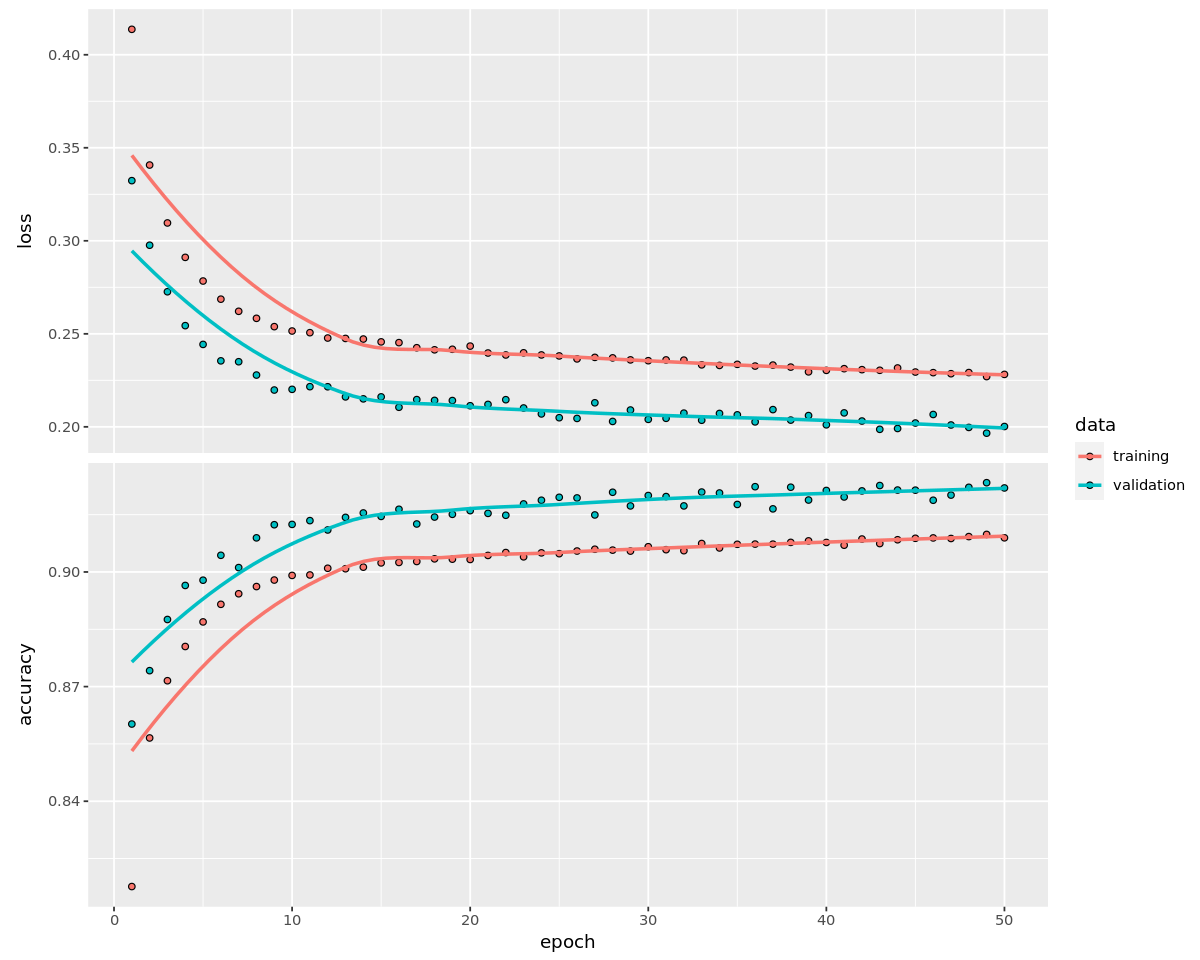

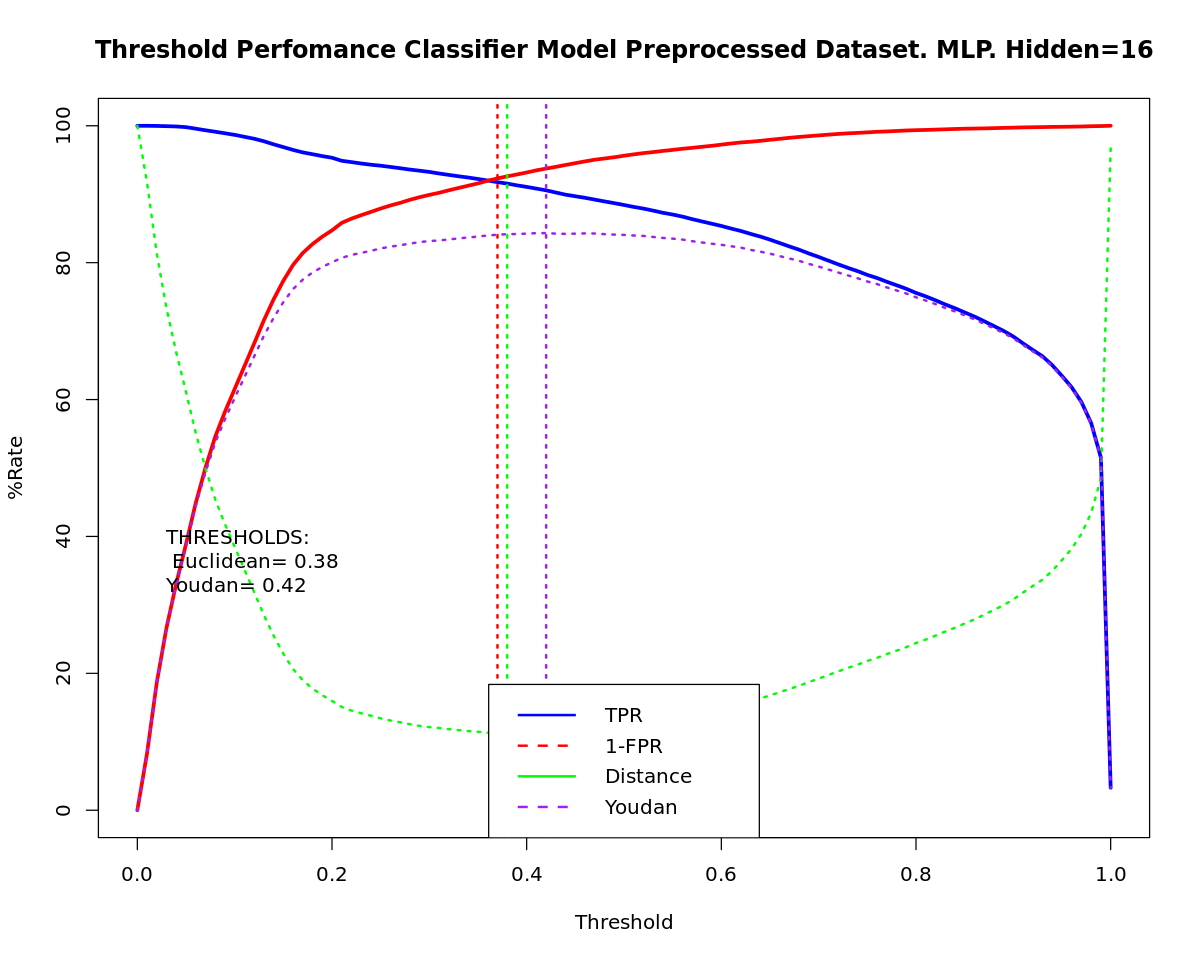

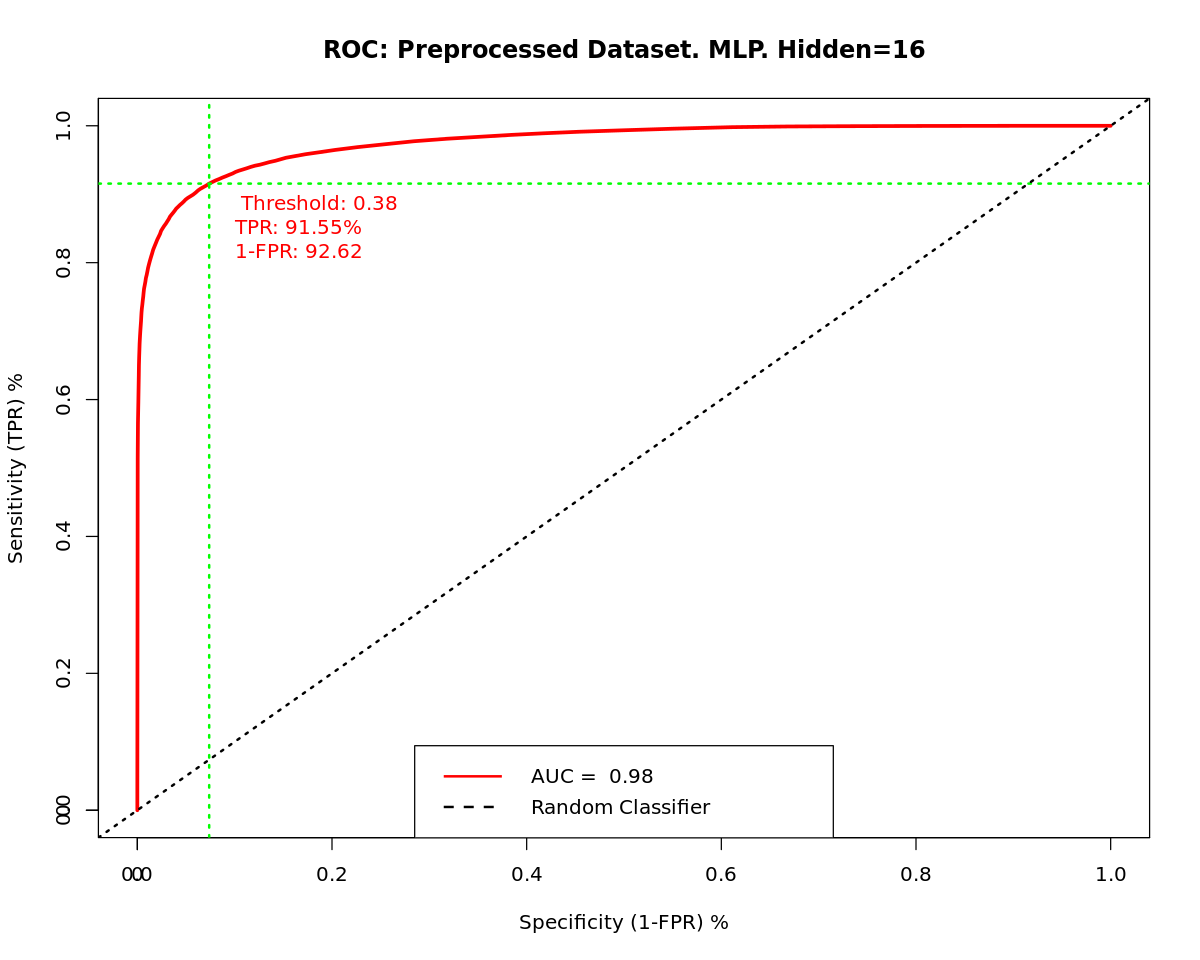

In [115]:
options(repr.plot.width = 10, repr.plot.height =8)
BASICNN_HIDDEN=16
model<-mlpNeural(training_data,testing_data,plot=TRUE)

In [116]:
result<-model$result

[1] "ACCURACY :  92.0927009547274 , PRECISION:  92.3313366960908 , RECALL:  91.5520475148484 , AUC :  0.976064170201772 F1 score: 91.9400408099199 Loss : 0.200619740831435 Threshold : 0.38"


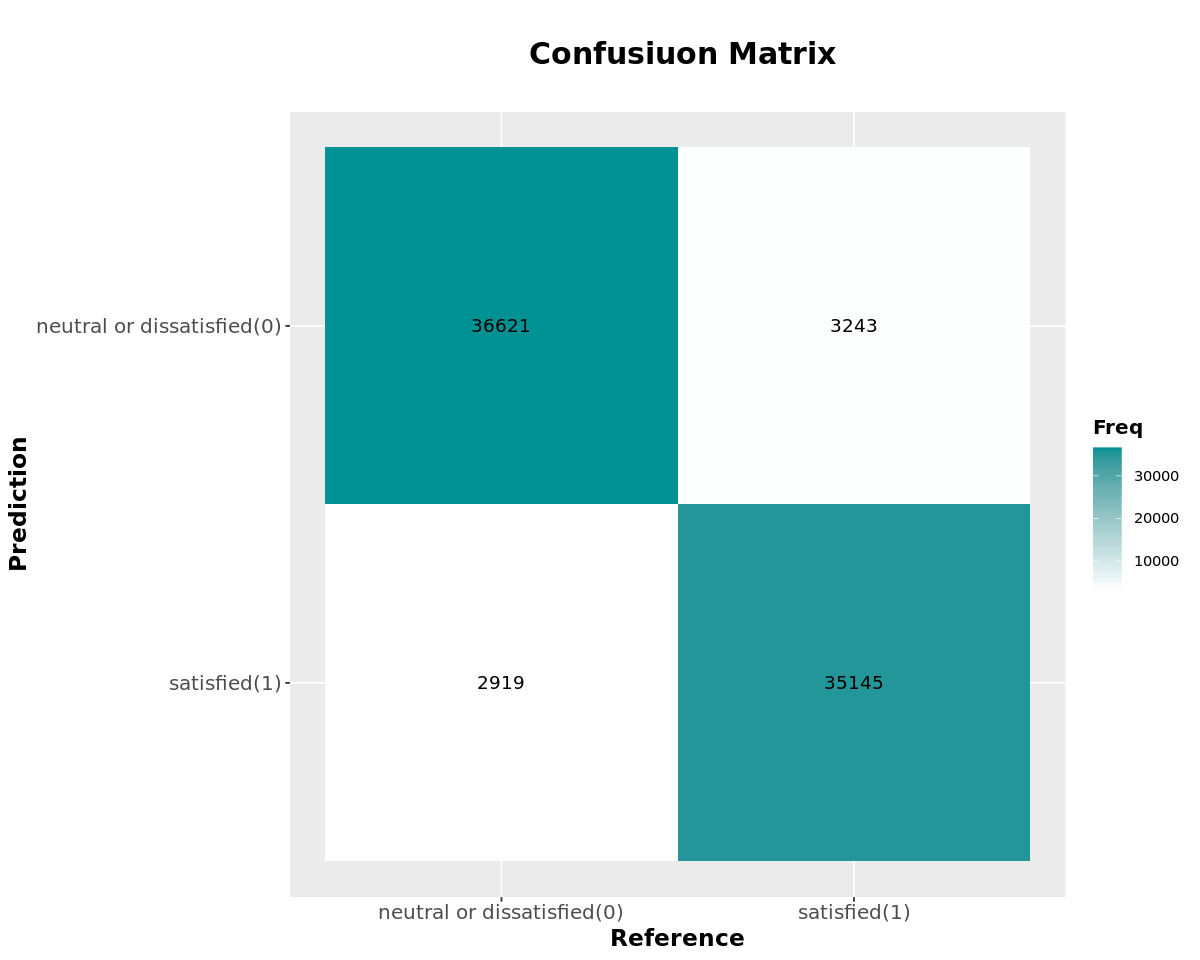

In [117]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

In [118]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(NeuralNetwork=unlist(df)))
allResults


LogisticRegression Logistic_with_Kfold DecisionTree
TP        3.090200e+04       10345.00            3.566700e+04
FN        7.486000e+03        2405.00            2.721000e+03
FP        5.755000e+03        1928.00            2.032000e+03
TN        3.378500e+04       11296.00            3.750800e+04
F1        8.235592e+01          82.68            9.375320e+01
acc       8.300867e+01          83.31            9.390078e+01
pgood     8.430041e+01          84.30            9.460994e+01
pbad      8.186136e+01          82.45            9.323622e+01
FPR       1.455488e+01          14.58            5.139100e+00
TPR       8.049911e+01          81.13            9.291185e+01
TNR       8.544512e+01          85.42            9.486090e+01
MCC       6.605291e-01           0.67            8.780945e-01
threshold 5.100000e-01           0.51            4.200000e-01
AUC       9.002825e-01           0.90            9.830880e-01
          DecisionTree_with_Kfold DecisionTree_unclean
TP        11940.00                3.775400e+04        
FN          811.00                1.671000e+03        
FP          631.00                2.406000e+03        
TN        12593.00                3.609700e+04        
F1           94.31                9.487718e+01        
acc          94.45                9.476825e+01        
pgood        94.98                9.400896e+01        
pbad         93.95                9.557562e+01        
FPR           4.77                6.248864e+00        
TPR          93.64                9.576157e+01        
TNR          95.23                9.375114e+01        
MCC           0.89                8.954864e-01        
threshold     0.38                6.300000e-01        
AUC           0.99                9.869401e-01        
          DecisionTree_Kfold_Unclean RandomForest RandomForestKfold
TP        12683.00                   3.625200e+04 20120.00         
FN          541.00                   1.932000e+03  1132.00         
FP          787.00                   1.887000e+03   927.00         
TN        11963.00                   3.785700e+04 21113.00         
F1           95.02                   9.499627e+01    95.13         
acc          94.88                   9.509932e+01    95.24         
pgood        94.15                   9.505231e+01    95.59         
pbad         95.67                   9.514439e+01    94.91         
FPR           6.18                   4.747886e+00     4.21         
TPR          95.91                   9.494029e+01    94.67         
TNR          93.82                   9.525211e+01    95.79         
MCC           0.90                   9.019455e-01     0.90         
threshold     0.63                   4.300000e-01     0.46         
AUC           0.99                   9.897908e-01     0.99         
          RandomForest_unclean RandomForest_Kfold_unclean NeuralNetwork
TP        3.832500e+04         20135.00                   3.514500e+04 
FN        1.505000e+03          1117.00                   3.243000e+03 
FP        1.806000e+03           964.00                   2.919000e+03 
TN        3.629200e+04         21076.00                   3.662100e+04 
F1        9.585923e+01            95.09                   9.194004e+01 
acc       9.575121e+01            95.19                   9.209270e+01 
pgood     9.549974e+01            95.43                   9.233134e+01 
pbad      9.601820e+01            94.97                   9.186484e+01 
FPR       4.740406e+00             4.38                   7.382398e+00 
TPR       9.622144e+01            94.74                   9.155205e+01 
TNR       9.525959e+01            95.62                   9.261760e+01 
MCC       9.149949e-01             0.90                   8.418291e-01 
threshold 5.300000e-01             0.45                   3.800000e-01 
AUC       9.926023e-01             0.99                   9.760642e-01

## Visualize a performance of each model

The performance metrics use in evaluating between multiple model are

- Accuracy
- Area Under the Curve 
- F1 Score

In [119]:
# select only the required metrics
rplot<-allResults[c("acc","F1","AUC"),]
# normalize accuracy and f1 by 100 (so that they is in same scale as AUC for easier visualization)
rplot[c("acc","F1"),]<-rplot[c("acc","F1"),]/100
rplot

LogisticRegression Logistic_with_Kfold DecisionTree DecisionTree_with_Kfold
acc 0.8300867          0.8331              0.9390078    0.9445                 
F1  0.8235592          0.8268              0.9375320    0.9431                 
AUC 0.9002825          0.9000              0.9830880    0.9900                 
    DecisionTree_unclean DecisionTree_Kfold_Unclean RandomForest
acc 0.9476825            0.9488                     0.9509932   
F1  0.9487718            0.9502                     0.9499627   
AUC 0.9869401            0.9900                     0.9897908   
    RandomForestKfold RandomForest_unclean RandomForest_Kfold_unclean
acc 0.9524            0.9575121            0.9519                    
F1  0.9513            0.9585923            0.9509                    
AUC 0.9900            0.9926023            0.9900                    
    NeuralNetwork
acc 0.9209270    
F1  0.9194004    
AUC 0.9760642

In [120]:
idx_kfold<-grepl("Kfold",names(rplot))
kfold_plot<-rplot[,idx_kfold]
normal_plot<-rplot[,!idx_kfold]

In [121]:
# stack a dataframe and combine with the fields of metrics name for each rows
kfold_plot<-cbind(stack(kfold_plot),data.frame(metrics=row.names(kfold_plot)))
normal_plot<-cbind(stack(normal_plot), data.frame(metrics=row.names(normal_plot)))
head(kfold_plot)
head(normal_plot)

values ind                     metrics
1 0.8331 Logistic_with_Kfold     acc    
2 0.8268 Logistic_with_Kfold     F1     
3 0.9000 Logistic_with_Kfold     AUC    
4 0.9445 DecisionTree_with_Kfold acc    
5 0.9431 DecisionTree_with_Kfold F1     
6 0.9900 DecisionTree_with_Kfold AUC

values    ind                metrics
1 0.8300867 LogisticRegression acc    
2 0.8235592 LogisticRegression F1     
3 0.9002825 LogisticRegression AUC    
4 0.9390078 DecisionTree       acc    
5 0.9375320 DecisionTree       F1     
6 0.9830880 DecisionTree       AUC

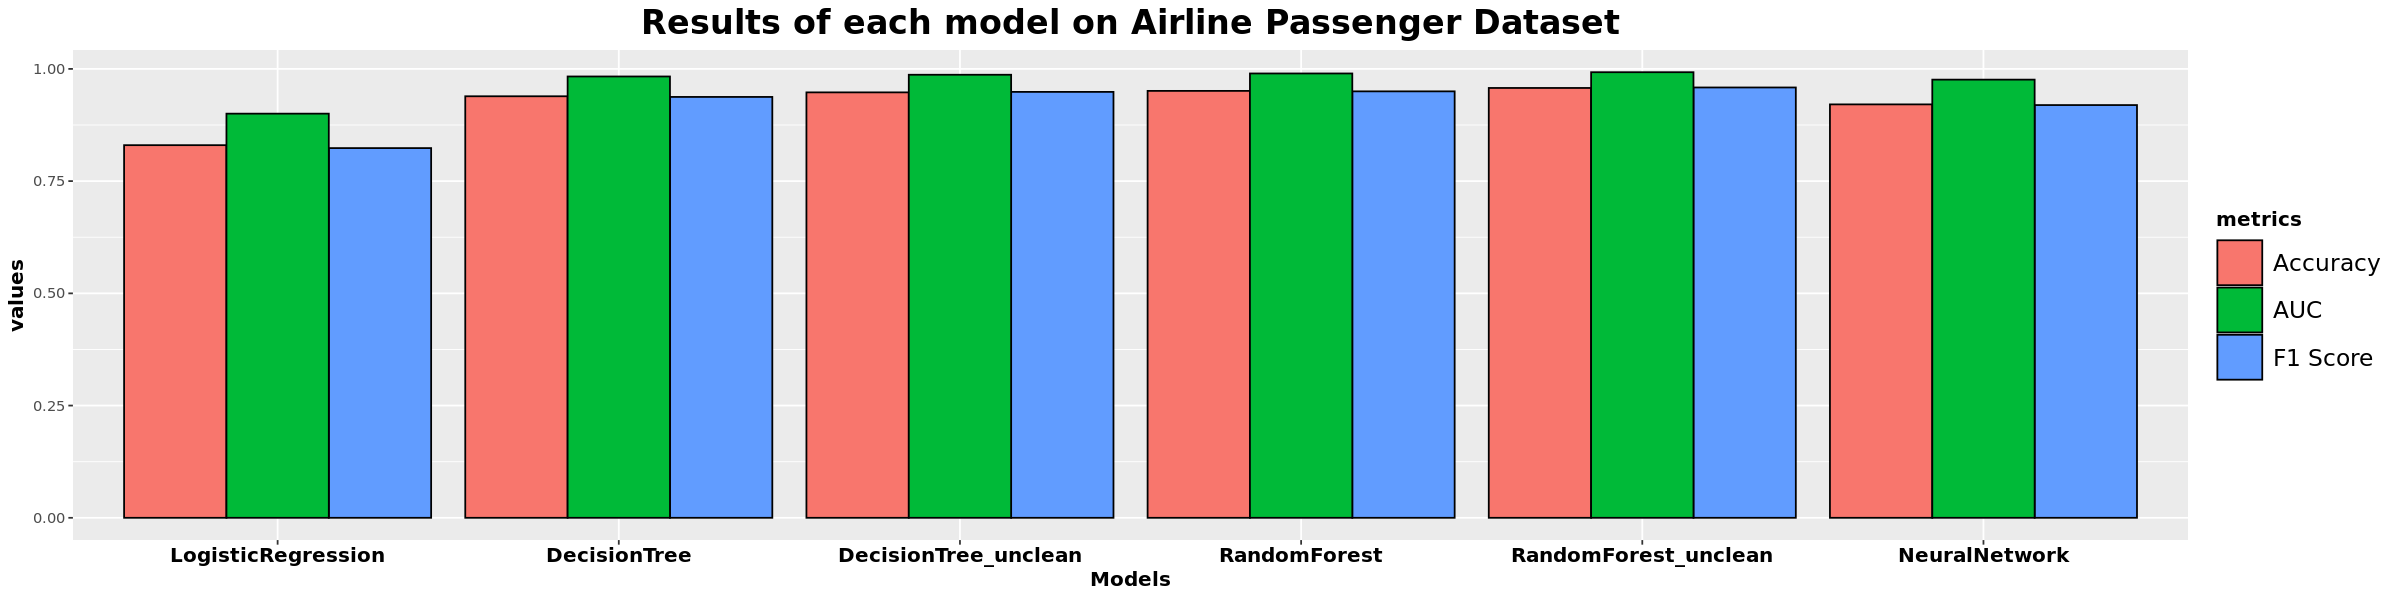

In [122]:
options(repr.plot.width = 20, repr.plot.height =5)
# Grouped
ggplot(normal_plot, aes(fill=metrics, y=values, x=ind)) + 
geom_bar(position="dodge", stat="identity",colour="black")+
scale_fill_discrete(labels=c("Accuracy","AUC","F1 Score"))+
labs(x= "Models", title="Results of each model on Airline Passenger Dataset")  +
theme(plot.title = element_text(face="bold",hjust=0.5, size =20),
      axis.title.x = element_text(face="bold", color="black", size=12),
      axis.title.y = element_text(face="bold", color="black", size=12),
      axis.text.x = element_text( face="bold", color='black', size=12),
      legend.title = element_text(face="bold", color="black", size=12),
      legend.text = element_text(size = 14),
      legend.key.size= unit(1.0,"cm"),
      legend.key.width = unit(1,"cm"),
      legend.box.spacing = unit(0.4,"cm")
      )

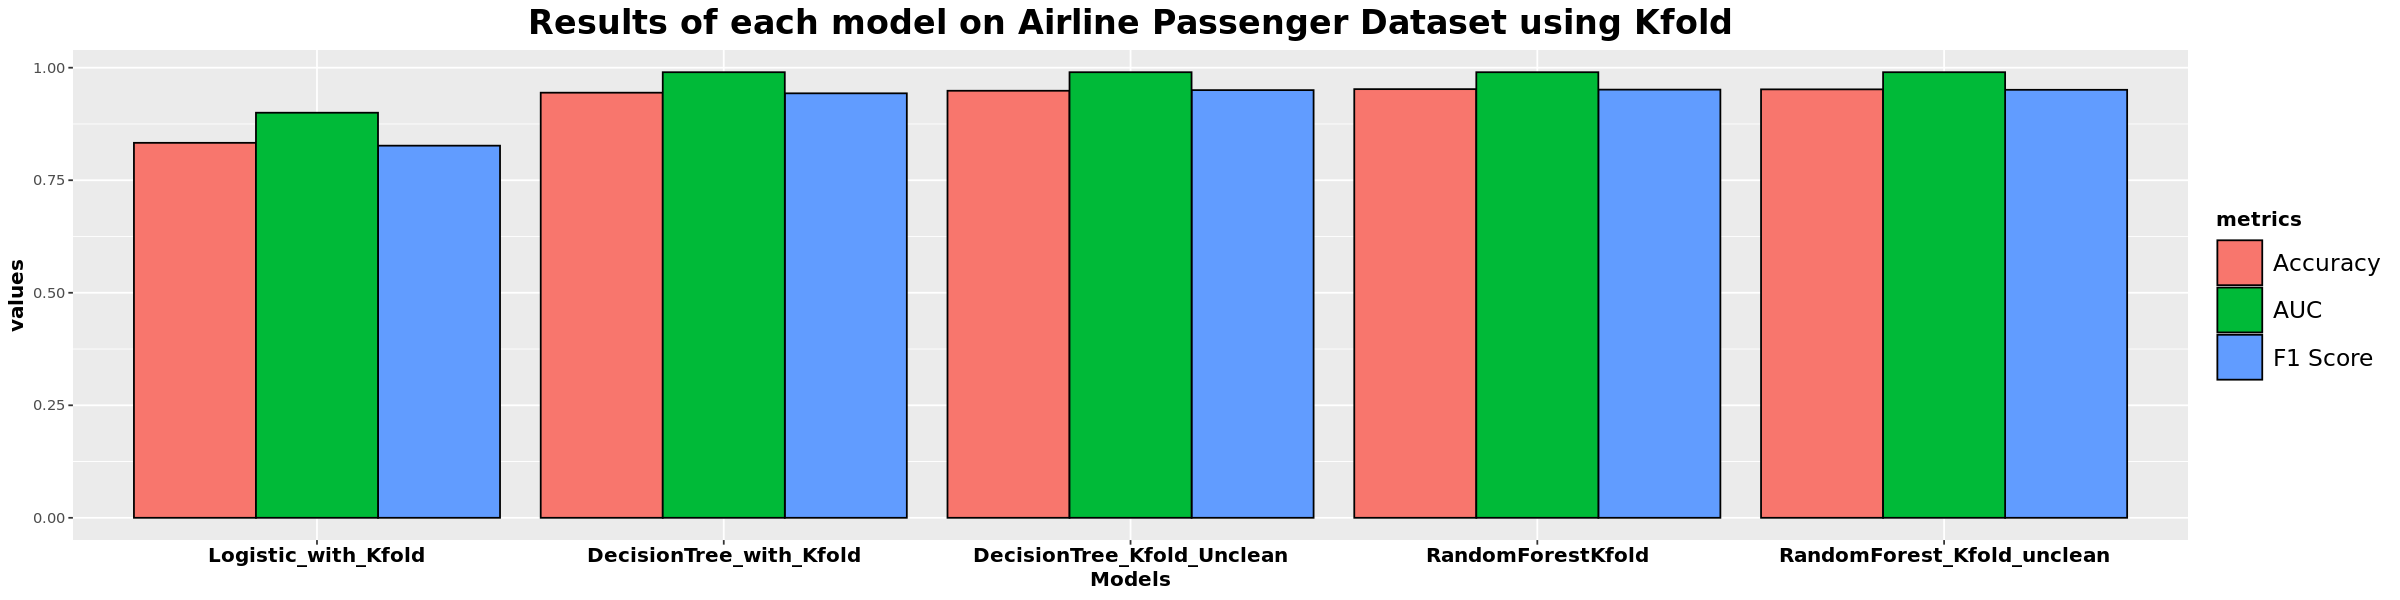

In [123]:
options(repr.plot.width = 20, repr.plot.height =5)
# Grouped
ggplot(kfold_plot, aes(fill=metrics, y=values, x=ind)) + 
geom_bar(position="dodge", stat="identity",colour="black")+
scale_fill_discrete(labels=c("Accuracy","AUC","F1 Score"))+
labs(x= "Models", title="Results of each model on Airline Passenger Dataset using K-fold cross validation")  +
theme(plot.title = element_text(face="bold",hjust=0.5, size =20),
      axis.title.x = element_text(face="bold", color="black", size=12),
      axis.title.y = element_text(face="bold", color="black", size=12),
      legend.title = element_text(face="bold", color="black", size=12),
            axis.text.x = element_text( face="bold", color='black', size=12),
      legend.text = element_text(size = 14),
      legend.key.size= unit(1.0,"cm"),
      legend.key.width = unit(1,"cm"),
      legend.box.spacing = unit(0.4,"cm")
      )

In [ ]:
## 

In [ ]:
#  clears all objects in "global environment"
rpam(list=ls())
# Automatically release memory
gc()

# Clear plots and other graphics in RStudio
if(!is.null(dev.list())) dev.off()
graphics.off()

# Clears the RStudio console area
cat("\014")

set.seed(123)

#load the pre-processed data set into a data frame
dataset <- NreadDataset("processed.csv")
head(dataset)

#removes the X column that is not relevant to the task
dataset <- subset(dataset, select = -c(X))

MYLIBRARIES<-c(
  "KODAMA",
  "DMwR2")
# ************************************************
# NplotConfusion()
#
# Plot confusion matrix
#
# INPUT:    list - results - results from NcalcConfusion()
#
# OUTPUT :  NONE
#
# 070819NRT Plots confusion matrix
# ************************************************
NplotConfusion<-function(results){
  
  aa<-matrix(c(round(results$TP,digits=0),
               round(results$FN,digits=0),
               round(results$FP,digits=0),
               round(results$TN,digits=0)),
             nrow=2)
  row.names(aa)<-c("Fraud","Genuine")
  colnames(aa)<-c("Fraud","Genuine")
  fourfoldplot(aa,color=c("#cc6666","#99cc99"),
               conf.level=0,
               margin=2,
               main="TP  FP / FN   TN")
} #endof NplotConfusion()

# ************************************************
# NcalcMeasures() :
#
# Evaluation measures for a confusion matrix
#
# INPUT: numeric  - TP, FN, FP, TN
#
# OUTPUT: A list with the following entries:
#        TP        - double - True Positive records
#        FP        - double - False Positive records
#        TN        - double - True Negative records
#        FN        - double - False Negative records
#        accuracy  - double - accuracy measure
#        pgood     - double - precision for "good" (values are 1) measure
#        pbad      - double - precision for "bad" (values are 1) measure
#        FPR       - double - FPR measure
#        TPR       - double - FPR measure
#        TNR       - double - TNR measure
#        MCC       - double - Matthew's Correlation Coeficient
#
# 080819NRT added TNR measure
# ************************************************
NcalcMeasures<-function(TP,FN,FP,TN){
  
  retList<-list(  "TP"=TP,
                  "FN"=FN,
                  "TN"=TN,
                  "FP"=FP,
                  "accuracy"=100.0*((TP+TN)/(TP+FP+FN+TN)),
                  "pgood"=   100.0*(TP/(TP+FP)),
                  "pbad"=    100.0*(TN/(FN+TN)),
                  "FPR"=     100.0*(FP/(FP+TN)),
                  "TPR"=     100.0*(TP/(TP+FN)),
                  "TNR"=     100.0*(TN/(FP+TN)),
                  "MCC"=     ((TP*TN)-(FP*FN))/sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
  )
  return(retList)
}

# ************************************************
# NcalcConfusion() :
#
# Calculate a confusion matrix for 2-class classifier
# INPUT: vector - expectedClass  - {0,1}, Expected outcome from each row (labels)
#        vector - predictedClass - {0,1}, Predicted outcome from each row (labels)
#
# OUTPUT: A list with the  entries from NcalcMeasures()
#
# 070819NRT convert values to doubles to avoid integers overflowing
# Updated to the following definition of the confusion matrix
#
# A good loan is indicated when $Status=1 and bad when $Status=0

#                    ACTUAL
#               ------------------
# PREDICTED     GOOD=1   |  BAD=0
#               ------------------
#     GOOD=1      TP     |    FP
#               ==================
#     BAD=0       FN     |    TN
#
#
# ************************************************
NcalcConfusion<-function(expectedClass,predictedClass){
  
  confusion<-table(factor(predictedClass,levels=0:1),factor(expectedClass,levels=0:1))
  
  # This "converts" the above into our preferred format
  
  TP<-as.double(confusion[2,2])
  FN<-as.double(confusion[1,2])
  FP<-as.double(confusion[2,1])
  TN<-as.double(confusion[1,1])
  
  return(NcalcMeasures(TP,FN,FP,TN))
  
} #endof NcalcConfusion()

#loads the kodama library to preform KNN algorithm
#library(KODAMA)

library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

# split the dataset in a 70/30 ratio

idxs <- sample(1:nrow(dataset), as.integer(0.7*nrow(dataset)))
train_data <- dataset[idxs,]

test_data <- dataset[-idxs,]

#x_train<- subset(train_data, select= -c(satisfactionv2))
#y_train<- train_data$satisfactionv2
#ap <- available.packages()

#nn3 <- kNN(satisfactionv2~.,train_data,test_data, stand=FALSE, k=3)
#confusion_matrix <- table(test_data[,"satisfactionv2"], nn3)

# Seperate predictors and predicted field for each set 
x_train<- subset(train_data, select= -c(satisfactionv2))
y_train<- train_data$satisfactionv2

x_test <- subset(test_data, select= -c(satisfactionv2))
y_test <- test_data$satisfactionv2


#Utilising the DWR2  library to classify the data

nn3 <- kNN(satisfactionv2~.,train_data,test_data, stand=FALSE, k=3)

confusion_matrix <- table(test_data[,"satisfactionv2"], nn3)

matrix<- as.data.frame.matrix(confusion_matrix)

matrix_metrics <- NcalcMeasures(matrix$`0`[1], matrix$`1`[2],matrix$`0`[2],matrix$`1`[1])

NplotConfusion(matrix_metrics)


# perform knn with k =3 using the kodama library
kodama_knn <- knn.kodama(x_train, y_train, x_test, k=3)
#results <- table(kodama_knn$Ypred[,3], y_test)

#determine the metrics to see the effectiveness of the models
metrics<-NcalcConfusion(y_test, kodama_knn$Ypred[,1])

NplotConfusion(metrics)


